# 1. Unsupervised Machine Learning: Clustering

## 1.1 Quando aplicar uma técnica de clusterização?
    - Quando o objetivo for agrupar as observações em grupos homogêneos internamente e heterogêneos entre si:

          - Dentro do grupo: Observações semelhantes com base nas variáveis
          - Entre grupos distintos: Observações diferentes com base nas variáveis utilizadas na análise

Exemplo: Imagine que tenhamos observações sobre Renda x Idade. As observações poderão se organizar de uma maneira homogênea para certas faixas de idade. O nome cluster indica: conglomerado, agrupamento.

As análises apresentadas serão voltadas para variáveis métricas (quantitativas)

## 1.2 Técnica Exploratória (não supervisionada)

* Análise de agrupamentos caracteriza-se por ser uma técnica exploratória, de modo que não tem caráter preditivo para observações de fora da amostra;
* Se novas observações forem adicionadas à amostra, novos agrupamentos devem ser realizados, pois a inclusão de novas observações pode alterar a composição dos grupos;
* Se forem alteradas as varíaveis da análise, novos agrupamentos devem ser realizados, pois a inclusão/retirada pode alterar os grupos.

Caso tenhamos 3 agrupamentos distintos (3 clusters), ao adicionar um quarto grupo de dados mais distinto dos 3 agrupamentos, é possível que a técnica passe a considerar os 3 agrupamentos distintos como um só agrupamento, frente ao novo que surgiu.

Analisaremos dois métodos de clusterização:

* Método Hierárquico Algomerativo
    * A quantidade de clusters é definida ao longo da análise (passo a passo)
    * Não é necessário colocar a quantidade de clusters como input para utilizar esse método
* Método Não Hierárquico K-means
    * Define-se a priori quantos clusters serão formados

### 1.2.1 Método Hirárquico Aglomerativo

O Método Hierárquico Aglomerativo caracteriza-se pela quantidade de cluters sendo definida ao longo da análise (passo a passo). Ele depende da escolha da medida de dissimilaridade, ou medida de distâncias, e de um método de encadeamento.

Antes de iniciar os procedimentos, é importante realizar uma análise das unidades de medidas das variáveis. Se estiverem em unidades de medidas distintas, é importante realizar a padronização das variáveis. Para isso, aplica-se o Z Score (torna variáveis com média = 0 e desvio padrão = 1)

$ZX_{ij} = \dfrac{X_{ji} - \bar{X}_j}{s_j}$

**Nota**: A aplicação do Z-score faz-se útil quando as amplitudes entre as variáveis são muito diferentes.

A análise de cluster hierárquica depende de dois elementos centrais:
- Escolha da medida de dissimilaridade (distância das observações);
- Escolha do método de encadeamento das observações. Refere-se a especificação da medida de distância quando houver clusteres formados.

***
Medidas de dissimilaridade:

Indica distância entre as observações. Destacam-se alguns tipos:

* Distância de Minkowski
* Distância Euclidiana
* Distância Euclidiana Quadrática
* Distância de Manhattan (City Block)
* Distância de Chebychev
* Distância de Canberra
* Correlação de Pearson **entre observações**. É uma medida de semelhança, então ajusta-se sua interpretação.

Para cada par de observações a distância é calculada. Essas distâncias indicam a diferença das variáveis. A mais frequentemente utilizada é a **medida euclidiana**. Caso os dados estejam mais compactados, a euclidiana quadrática por exemplo prova-se muito útil, pois ela "aumenta" a distância entre os dados.

As medidas de dissimilaridade indicam o quão diferentes são as observações. 


***
O procedimento para fazer análise consiste em:

1. Normalizar os dados
2. Escolher uma medida de dissimilaridade e um método de encadeamento para fazer o cálculo
3. Criar uma tabela dedissimilaridades, calculando essa medida para todas as combinações de observações
4. Considerando n observações, inicia-se com n clusters (estágio 0)
5. Na sequência, une-se duas observações com menor distância (ficamos com n-1 clusters)
6. Em seguida, a partir do método de encademaento, comparamos a distância do cluster para com todas as outras observações. Caso a distância do cluster para a observação $x$, seja menor que todas as distâncias individuais entre as observações, a observação $x$ é agregada ao cluster. Caso contrário, a menor distância individual entre as observações que não fazem parte do cluster, formam um novo cluster.
7. Repete-se a etapa 6 n-1 vezes, ou seja, até restar somente 1 clusters.
9. O **dendrograma** é um gráfico que permite visualizar a formação dos clusters

Nota: Podemos parar de formar clusters se desejarmos
***


#### 1.2.1.1. Métodos de encadeamento

Seja $d_{XY}$ a distância entre as observações $X$ e $Y$, há 3 métodos de encadeamento

* Método único - Nearest Neighbour ou Single Linkage
  - Aglomera-se dados onde $d_{(MN)W}=min(d_{MW};d_{NW})$
* Completo - Furthest Neighbour ou Complete Linkage
   - Aglomera-se dados onde $d_{(MN)W}=max(d_{MW};d_{NW})$
* Médio - Between Groups ou Average Linkage
   - Aglomera-se dados onde $d_{(MN)W}=mean(d_{MW};d_{NW})$

Se as observações estão mais compactadas, recomenda-se utilizar o método complete linkage. Caso estejam mais esparsas, o método single linkage é mais recomendado.

In [119]:
import pandas as pd

df = pd.read_excel('Material Complementar - Distâncias e Clusters.xlsx')

df.iloc[0:, 6:16];

#### 1.2.1.2. Aplicando o método no Python

In [120]:
# Preparando o ambiente

# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install seaborn
# !pip install plotly
# !pip install scipy
# !pip install scikit-learn
# !pip install pingouin

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='browser'

In [121]:
# visualizando o banco de dados

dados_vest = pd.read_excel('vestibular.xlsx')
print('Data frame\n', df, 2*'\n')
print('Estatísticas do dataframe')
print(df.info(), 2*'\n')
print('Estatísticas descritivas\n',df.describe())

Data frame
                                             estudante  matemática  física  \
0                                            Gabriela         3.7     2.7   
1                                         Luiz Felipe         7.8     8.0   
2                                            Patrícia         8.9     1.0   
3                                              Ovídio         7.0     1.0   
4                                              Leonor         3.4     2.0   
5                                                 NaN         NaN     NaN   
6                                                 NaN         NaN     NaN   
7   (*) ATENÇÃO: COMO AS VARIÁVEIS ESTÃO NA MESMA ...         NaN     NaN   
8                                                 NaN         NaN     NaN   
9                                                 NaN         NaN     NaN   
10                                                NaN         NaN     NaN   

    química  Unnamed: 4            Unnamed: 5              Unna

##### 1. Normalizar ou não?

Observando o valor mínimo e máximo, podemos reparar que não há uma diferença significativa entre as observações, o que justifica uma não normalização das observações. Neste caso iremos normalizar mesmo assim.

In [122]:
vest = dados_vest.drop(columns=['estudante'])

# aplicando o zscore
vest_pad = vest.apply(zscore, ddof=1) # ddof=1 calcula dos dados a partir do desvio padrão amostral
print('\nMédia')
print(round(vest_pad.mean(),2))
print('\nDesvio Padrão')
print(round(vest_pad.std(),2))


Média
matemática    0.0
física        0.0
química       0.0
dtype: float64

Desvio Padrão
matemática    1.0
física        1.0
química       1.0
dtype: float64


In [123]:
from plotly.offline import init_notebook_mode, iplot

# Initialize notebook mode to embed the plots within the notebook
init_notebook_mode(connected=True)

fig = px.scatter_3d(dados_vest, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    text=dados_vest.estudante)
# Display the plot
fig.update_layout(
    width=600,  # Set the width of the plot
    height=600   # Set the height of the plot
)
iplot(fig)

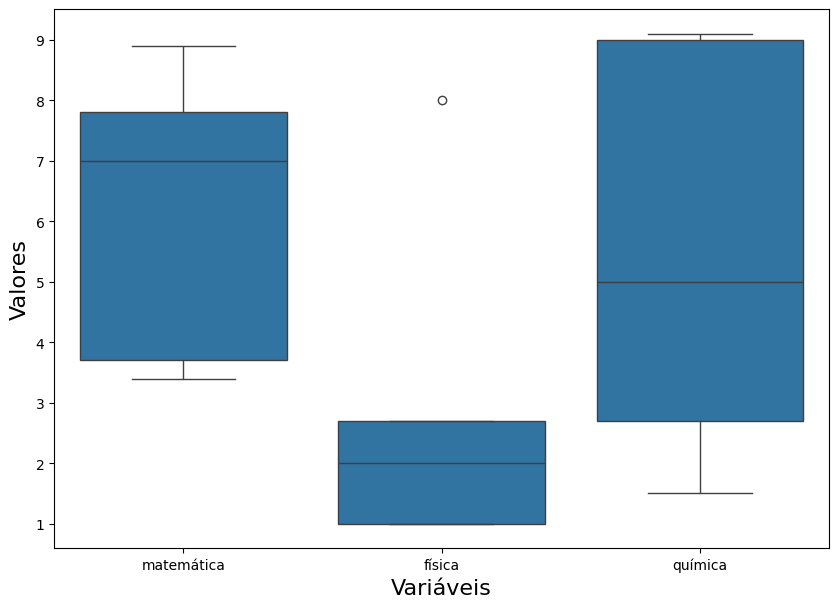

In [124]:
plt.figure(figsize=(10,7))
sns.boxplot(x='variable', y='value', data=pd.melt(vest))
plt.ylabel('Valores', fontsize=16)
plt.xlabel('Variáveis', fontsize=16)
plt.show()

##### 2. Escolher o método para calcular distâncias e qual o método de encadeamento

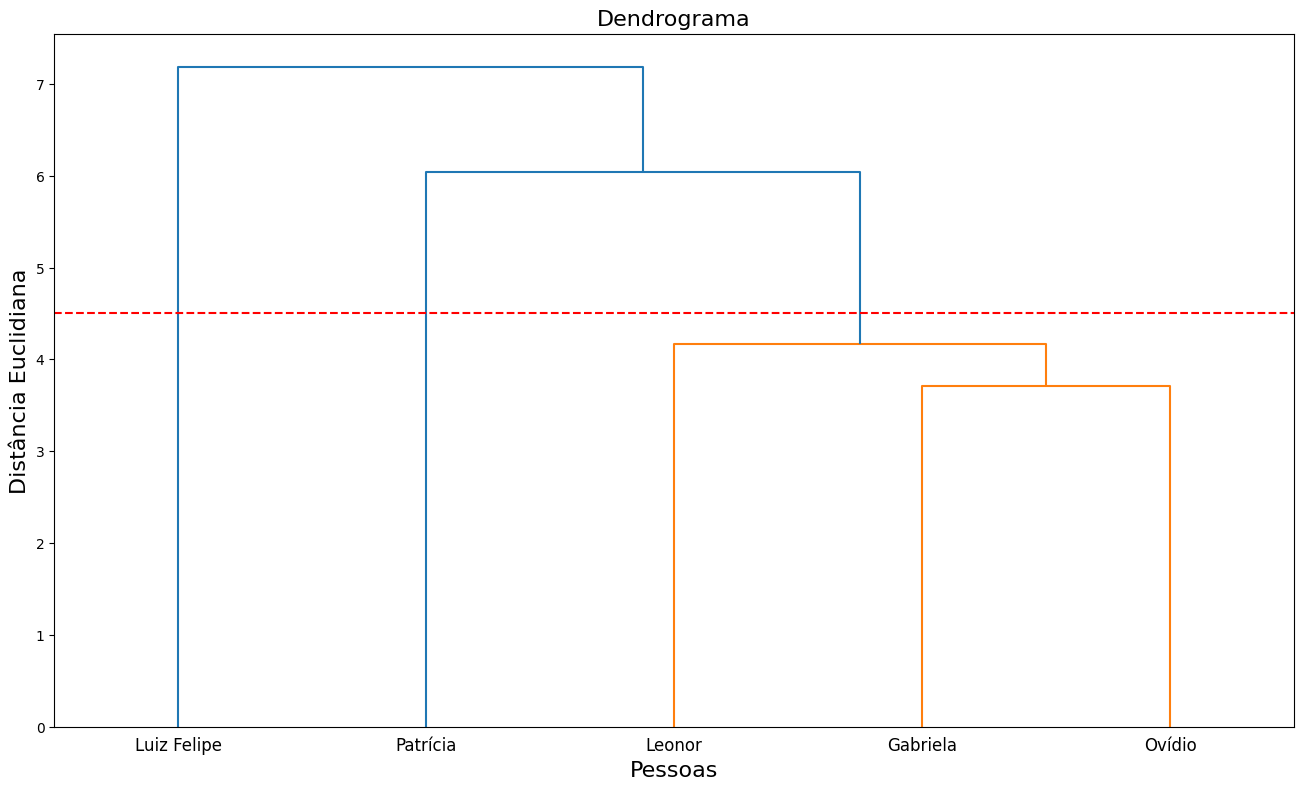

In [125]:

#%% Cluster hierárquico aglomerativo: distância euclidiana + single linkage

# Visualizando as distâncias
dist_euclidiana = pdist(vest, metric='euclidean')

# Opções para as distâncias ("metric"):
    ## euclidean
    ## sqeuclidean (euclidiana quadrática)
    ## cityblock (manhatan)
    ## chebyshev (
    ## canberra
    ## correlation

# Gerando o dendrograma
## Distância euclidiana e método de encadeamento single linkage

plt.figure(figsize=(16,9))
dend_sing = sch.linkage(vest, method = 'single', metric = 'euclidean')

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5, labels = list(dados_vest.estudante))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
# a altura vermelha representa uma altura que se pode encerrar o esquema de aglomeração
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

A interpretação do dendrograma é a seguinte: O número de vezes que a reta horizontal intercepta uma barra vertical do dendrograma, indica o número de clusters a serem formados. É interessante escoher uma solução intermediária de tal modo que nem todas as variáveis sejam aglomeradas em um único clusters, e nem todas as variáveis permaneçam separadas.

Na situação acima, foram formados 3 clusters. A escolha da altura da barra horizontal fica a critério de quem faz a análise.

##### Visualizando o número de clusters

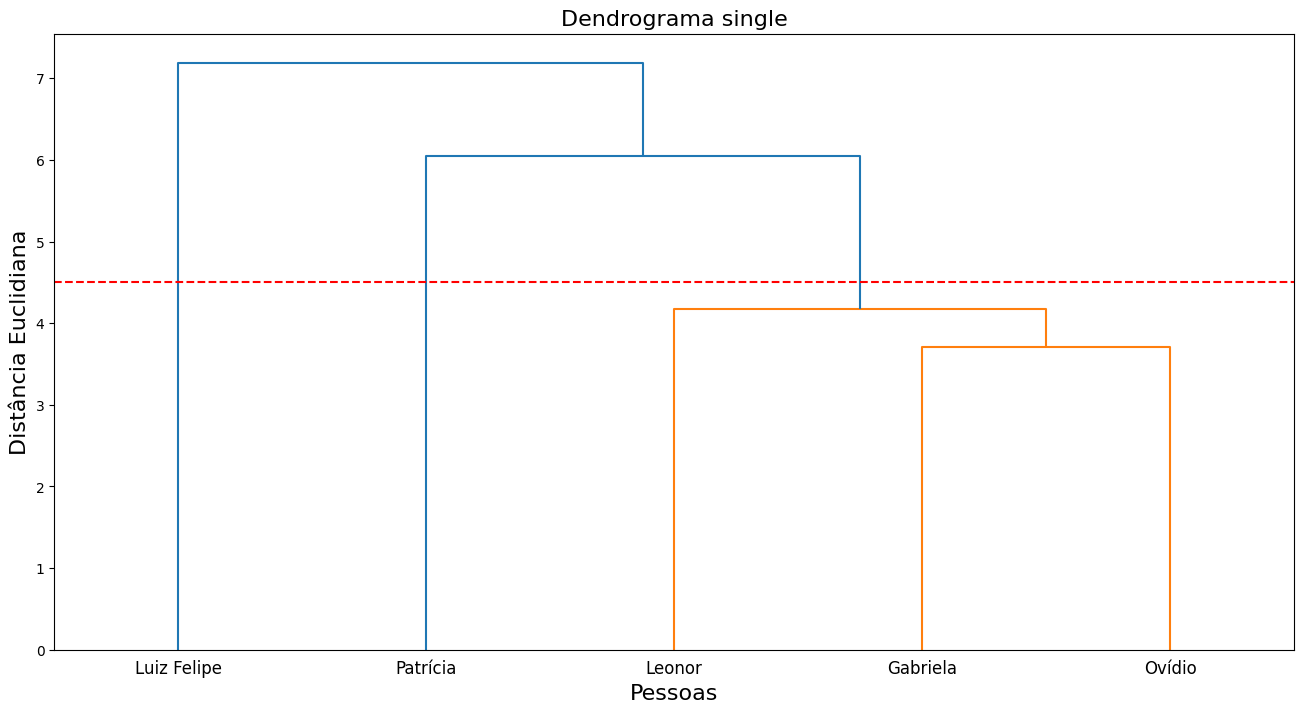

In [126]:
plt.figure(figsize=(16,8))
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 4.5, labels = list(dados_vest.estudante))
plt.title('Dendrograma single', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
# a altura vermelha representa uma altura que se pode encerrar o esquema de aglomeração
plt.axhline(y = 4.5, color = 'red', linestyle = '--')
plt.show()

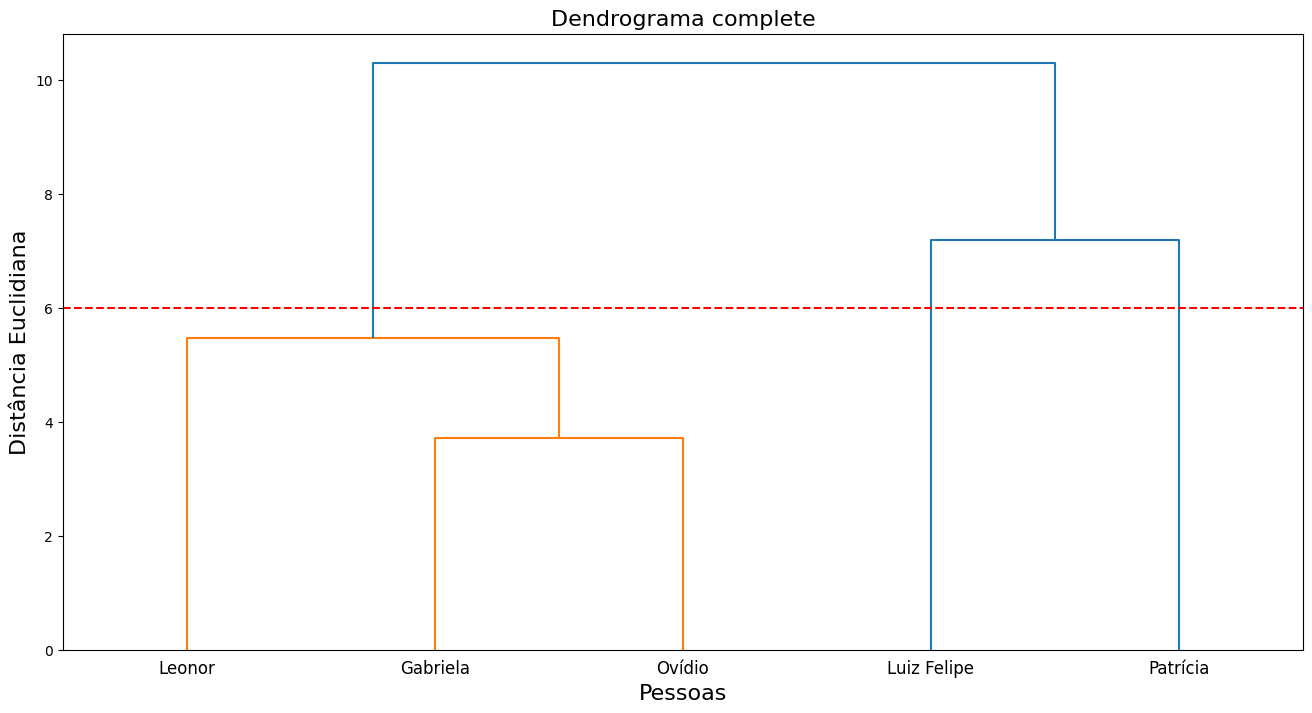

In [127]:

plt.figure(figsize=(16,8))
dend_compl = sch.linkage(vest, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma complete', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()
# podemos observar 3 clusters observando quantos pontos a barra vermelha toca

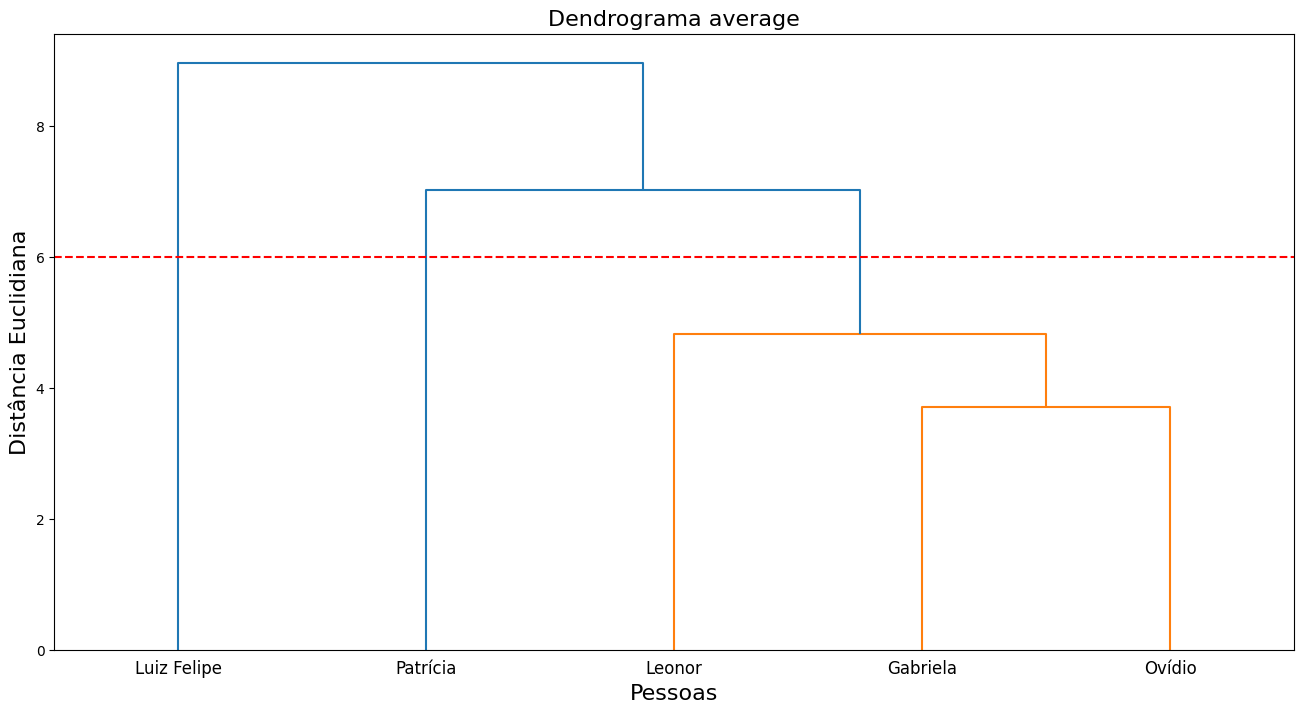

In [128]:

plt.figure(figsize=(16,8))
dend_average = sch.linkage(vest, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_average, color_threshold = 6, labels = list(dados_vest.estudante))
plt.title('Dendrograma average', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 6, color = 'red', linestyle = '--')
plt.show()



##### Aglomerando as obervações de acordo com o número de clusters

In [129]:
  
# Como já observamos 3 clusters no dendrograma, vamos selecionar "3" clusters
# A medida de distância e o método de encadeamento são mantidos

cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(vest)
dados_vest['cluster_single'] = indica_cluster_sing
dados_vest['cluster_single'] = dados_vest['cluster_single'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (single)
coef_single = [y[1] for y in dendrogram_s['dcoord']]

print(coef_single)
print(cluster_sing)
print(indica_cluster_sing)

print(dados_vest)
print('\n\n')
print(dados_vest.info())

[3.713488925525428, 4.170131892398609, 6.044832503882965, 7.1867934435323795]
AgglomerativeClustering(linkage='single', n_clusters=3)
[0 1 2 0 0]
     estudante  matemática  física  química cluster_single
0     Gabriela         3.7     2.7      9.1              0
1  Luiz Felipe         7.8     8.0      1.5              1
2     Patrícia         8.9     1.0      2.7              2
3       Ovídio         7.0     1.0      9.0              0
4       Leonor         3.4     2.0      5.0              0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   estudante       5 non-null      object  
 1   matemática      5 non-null      float64 
 2   física          5 non-null      float64 
 3   química         5 non-null      float64 
 4   cluster_single  5 non-null      category
dtypes: category(1), float64(3), object(1)
memory usage: 429.0+ bytes
None


In [130]:
# Gerando a variável com a indicação do cluster no dataset

num_clusters = 3

cluster_comp = AgglomerativeClustering(n_clusters = num_clusters, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(vest)
dados_vest['cluster_complete'] = indica_cluster_comp
dados_vest['cluster_complete'] = dados_vest['cluster_complete'].astype('category')

# Coeficientes do esquema hierárquico de aglomeração (complete)
coef_complete = [y[1] for y in dendrogram_c['dcoord']]
print(coef_complete)

print(cluster_comp, '\n')
print(indica_cluster_comp, '\n')

print(dados_vest)
print('\n\n')
print(dados_vest.info())


[3.713488925525428, 5.473572873361603, 7.1867934435323795, 10.290286682109492]
AgglomerativeClustering(linkage='complete', n_clusters=3) 

[0 2 1 0 0] 

     estudante  matemática  física  química cluster_single cluster_complete
0     Gabriela         3.7     2.7      9.1              0                0
1  Luiz Felipe         7.8     8.0      1.5              1                2
2     Patrícia         8.9     1.0      2.7              2                1
3       Ovídio         7.0     1.0      9.0              0                0
4       Leonor         3.4     2.0      5.0              0                0



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   estudante         5 non-null      object  
 1   matemática        5 non-null      float64 
 2   física            5 non-null      float64 
 3   química           5 non-null      float64 


### 1.2.2 Método Não Hierárquico K-means

- A quantidade K de clusters é escolhida a priori, e é usada como base para a identificação dos centros de aglomeração, de modo que as observações são arbitrariamente alocadas aos K clusers para o cálculo dos centróides iniciais.
- O método faz a melhor alocação possível para se adequar ao número de clusters escolhidos. **As observações são organizadas com base na proximidade dos centróides**.
- Nas etapas seguintes, as observações vão sendo comparadas pela proximidade aos centroides dos outros clusters. Se houver realocação a outro cluster por estar mais próxima, os centroides são recalculados (em ambos os clusters).
- **Trata-se de um processo iterativo**.
- O procedimento encerra-se quando não for possível realocar qualquer outra observação por estar mais próxima do centróide de outro cluster: indica que a soma dos quadrados de cada observação até o centro do cluster alocada foi minimizada.
- A soma total dos quadrados dentro dos clusters pode ser representado por:

\begin{equation}
SS = \sum_{k=1}^{k}\sum_{x_{i}\in C_k} (x_{i}-\mu_{k})^2
\end{equation}

#### 1.2.2.1 O procedimento

1. Assim como no Método Hierárquico Aglomerativo, precisamos verificar se há necessidade de padronizar as variáveis:

\begin{equation}
ZX_{ij} = \dfrac{X_{ji} - \bar{X}_j}{s_j}
\end{equation}
**Nota**: A aplicação do Z-score faz-se útil quando as amplitudes entre as variáveis são muito diferentes.

2. Definir o número de clusteres: Para isso, se desejarmos podemos utilizar como input o resultado vindo da análise do dendrograma gerado pelo método hierárquico aglomerativo.

**Nota**: Repare que nesse método não há necessidade de escolher medidas de distância ou dissimilaridade, nem o método de encadeamento.

#### 1.2.2.2 Identificação da quantidade de clusters

- **Método de Elbow**: calcula-se a soma total dos quadrados dentro dos clusters (WCSS) para várias opções de K (quantidade de clusters). No gráfico, busca-se a dobra (“cotovelo”), ou seja, o ponto a partir do qual a diminuição na WCSS não é mais tão expressiva, mesmo aumentando a quantidade de clusters
- **Método da Silhueta**: para cada observação, calcula-se: (b) sua distância média para o cluster mais próximo onde não esteja alocada; (a) sua distância média dentro do cluster onde está alocada
\begin{equation}
\text{silhueta} = \frac{(b-a)}{max(a,b)}
\end{equation}

Em seguida, calcula-se o coeficiente de silhueta médio para todas as observações. O procedimento é realizado para várias opções de K. Quanto mais próximo de 1, melhor a clusterização. Quanto mais próximo de -1, pior.

#### 1.2.2.3 Análise dos agrupamentos

Nessa etapa, analisaremos o quanto as variáveis contribuem para a formação dos agrupamentos.

Após a clusterização, é importante comparar se a variabilidade dentro do grupo é menor que a variabilidade entre grupos

#### 1.2.2.4 Aplicando o método no python

##### KMEANS()

O k-means é um método de agrupamento (clustering) que particiona um conjunto de dados em 
$k$ clusters, onde cada ponto de dados pertence ao cluster cujo centroide (média) está mais próximo. A função KMeans do scikit-learn implementa este algoritmo.

`kmeans = KMeans(n_clusters=3, init='random', random_state=100).fit(vest)`


In [131]:
kmeans = KMeans(n_clusters=3, init='random', random_state=100).fit(vest)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans.labels_
dados_vest['cluster_kmeans'] = kmeans_clusters
dados_vest['cluster_kmeans'] = dados_vest['cluster_kmeans'].astype('category')

cent_finais = pd.DataFrame(kmeans.cluster_centers_)
cent_finais.columns = vest.columns
cent_finais.index.name = 'cluster'

In [132]:
cent_finais  # visualizando os clústeres

matemática  física  química
cluster                             
0               8.9     1.0      2.7
1               7.8     8.0      1.5
2               4.7     1.9      7.7

###### Visualizando o número de centróides

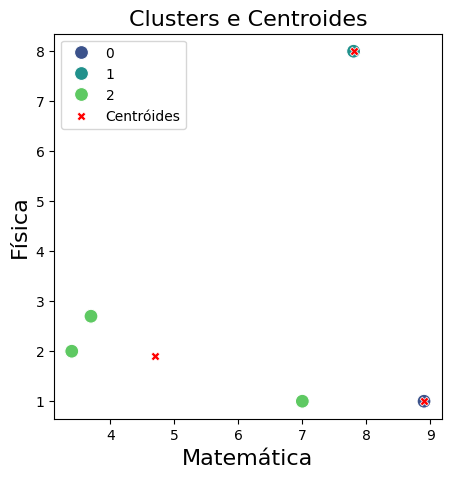

In [133]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=dados_vest, x='matemática', y='física', hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(data=cent_finais, x='matemática', y='física', c = 'red', label = 'Centróides', marker="X", s = 40)
plt.title('Clusters e Centroides', fontsize=16)
plt.xlabel('Matemática', fontsize=16)
plt.ylabel('Física', fontsize=16)
plt.legend()
plt.show()

##### Identificando a quantidade de clusters - Técnica de Elbow

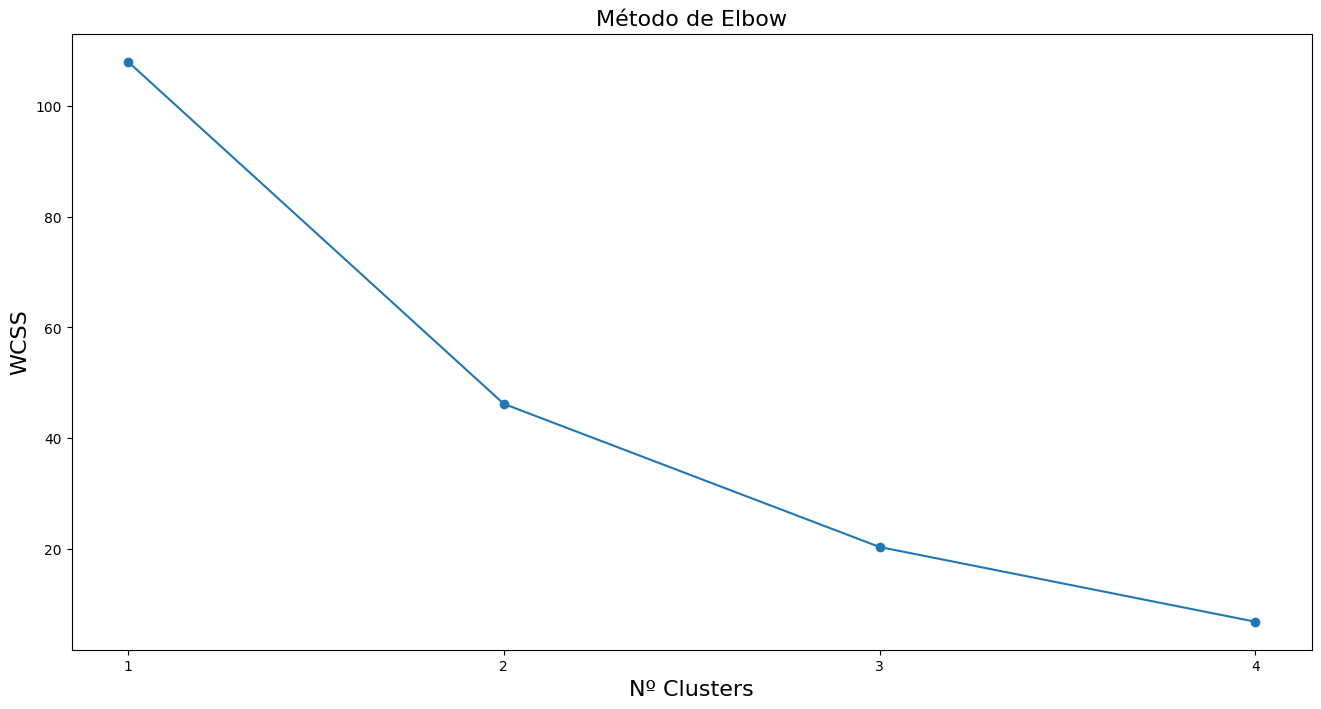

In [134]:
elbow = []
K = range(1,5) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(vest)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,5))
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

###### Análise dos clusters

In [135]:
#%% Análise de variância de um fator (ANOVA)

# Interpretação do output:

## cluster_kmeans MS: indica a variabilidade entre grupos
## Within MS: indica a variabilidade dentro dos grupos
## F: estatística de teste (cluster_kmeans MS / Within MS)
## p-unc: p-valor da estatística F
## se p-valor < 0.05: pelo menos um cluster apresenta média estatisticamente diferente dos demais

# Matemática
pg.anova(dv='matemática', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

0       1
Source  cluster_kmeans  Within
SS              16.592    7.98
DF                   2       2
MS               8.296    3.99
F             2.079198     NaN
p-unc          0.32476     NaN
np2            0.67524     NaN

In [136]:
# Física
pg.anova(dv='física', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

0       1
Source  cluster_kmeans  Within
SS              32.612    1.46
DF                   2       2
MS              16.306    0.73
F            22.336986     NaN
p-unc          0.04285     NaN
np2            0.95715     NaN

In [137]:
# Química
pg.anova(dv='química', 
         between='cluster_kmeans', 
         data=dados_vest,
         detailed=True).T

0       1
Source  cluster_kmeans  Within
SS              38.352   10.94
DF                   2       2
MS              19.176    5.47
F             3.505667     NaN
p-unc         0.221943     NaN
np2           0.778057     NaN

Analisando as variáveis Física, Química e Matemática, podemos observar que a variável de física é a variável que está contribuindo para a formação dos clusters.

In [138]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

fig = px.scatter_3d(dados_vest, 
                    x='matemática', 
                    y='química', 
                    z='física',
                    color='cluster_kmeans',
                    text=dados_vest.estudante)
fig.update_layout(
    width = 800,
    height = 600
)
iplot(fig)


## 1.3 - Análise 2 - dados_países.csv

### 1.3.1 - Preparando os dados

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio

dados_paises = pd.read_csv('dados_paises.csv')

dados_paises

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [140]:
tab_desc = dados_paises.describe()
print(tab_desc)

       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1.795000    1330.000000

Ao importar os dados e usar o método `describe` podemos ver o quanto as variáveis variam. Dessa forma podemos optar pela normalização ou não, observando os intervalos mínimos e máximos, e as variáveis em si. Nesse caso, a normalização será necessária.

### 1.3.2 - Matriz de correlação

In [141]:
# Matriz de correlações das variáveis

# Vamos remover a coluna "country", pois é apenas um id
paises = dados_paises.drop(columns=['country'])

# Gerando a matriz de correlações de Pearson
matriz_corr = pg.rcorr(paises, method = 'pearson', upper = 'pval', 
                       decimals = 4, 
                       pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

matriz_corr

C:\Users\Lucas Rezende\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



child_mort  exports   health imports   income inflation life_expec  \
child_mort          -      ***      ***              ***       ***        ***   
exports       -0.3181        -              ***      ***                  ***   
health        -0.2004  -0.1144        -                *       ***        ***   
imports       -0.1272   0.7374   0.0957       -                ***              
income        -0.5243   0.5168   0.1296  0.1224        -         *        ***   
inflation      0.2883  -0.1073  -0.2554  -0.247  -0.1478         -        ***   
life_expec    -0.8867   0.3163   0.2107  0.0544    0.612   -0.2397          -   
total_fer      0.8485    -0.32  -0.1967  -0.159  -0.5018    0.3169    -0.7609   
gdpp           -0.483   0.4187    0.346  0.1155   0.8956   -0.2216     0.6001   

           total_fer gdpp  
child_mort       ***  ***  
exports          ***  ***  
health            **  ***  
imports           **       
income           ***  ***  
inflation        ***  ***  
life_expec       ***  ***  
total_fer          -  ***  
gdpp         -0.4549    -

Padrão da matriz de correlação:

- \* : $10\%$ de significância
- \** : $5\%$ de significância
- \*** : $1\%$ de significância

In [142]:

# Matriz de correlações básica
corr = paises.corr()

# Gráfico de calor (heatmap)
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='viridis'))

fig.update_layout(
    height = 600,
    width = 600)

fig.show()

In [143]:
paises.corr().values

array([[ 1.        , -0.31809322, -0.20040206, -0.12721092, -0.52431502,
         0.28827617, -0.8866761 ,  0.84847811, -0.48303217],
       [-0.31809322,  1.        , -0.1144084 ,  0.73738083,  0.5167836 ,
        -0.10729439,  0.3163126 , -0.32001055,  0.41872475],
       [-0.20040206, -0.1144084 ,  1.        ,  0.09571668,  0.12957861,
        -0.25537579,  0.21069212, -0.19667399,  0.34596553],
       [-0.12721092,  0.73738083,  0.09571668,  1.        ,  0.12240625,
        -0.24699428,  0.05439053, -0.15904843,  0.11549817],
       [-0.52431502,  0.5167836 ,  0.12957861,  0.12240625,  1.        ,
        -0.147756  ,  0.61196247, -0.50184005,  0.89557143],
       [ 0.28827617, -0.10729439, -0.25537579, -0.24699428, -0.147756  ,
         1.        , -0.23970496,  0.31692107, -0.22163106],
       [-0.8866761 ,  0.3163126 ,  0.21069212,  0.05439053,  0.61196247,
        -0.23970496,  1.        , -0.76087469,  0.60008913],
       [ 0.84847811, -0.32001055, -0.19667399, -0.15904843, -0

A matriz de correlação mostra a relação entre as variáveis. Correlação positiva indica uma relação de proporcionalidade direta, e correlação negativa proporcionalidade inversa.

### 1.3.3 - Aplicando o Método Hierárquico Aglomerativo

#### 1.3.3.1 - Padronização das variáveis

In [144]:
# Aplicando o procedimento de ZScore em todas as variáveis
paises_pad = paises.apply(zscore, ddof=1)
# Visualizando as distâncias
dist_euclidiana = pdist(paises_pad, metric='euclidean') # serve apenas para visualização

#### 1.3.3.2 - Aplicando diferentes métodos de encadeamento

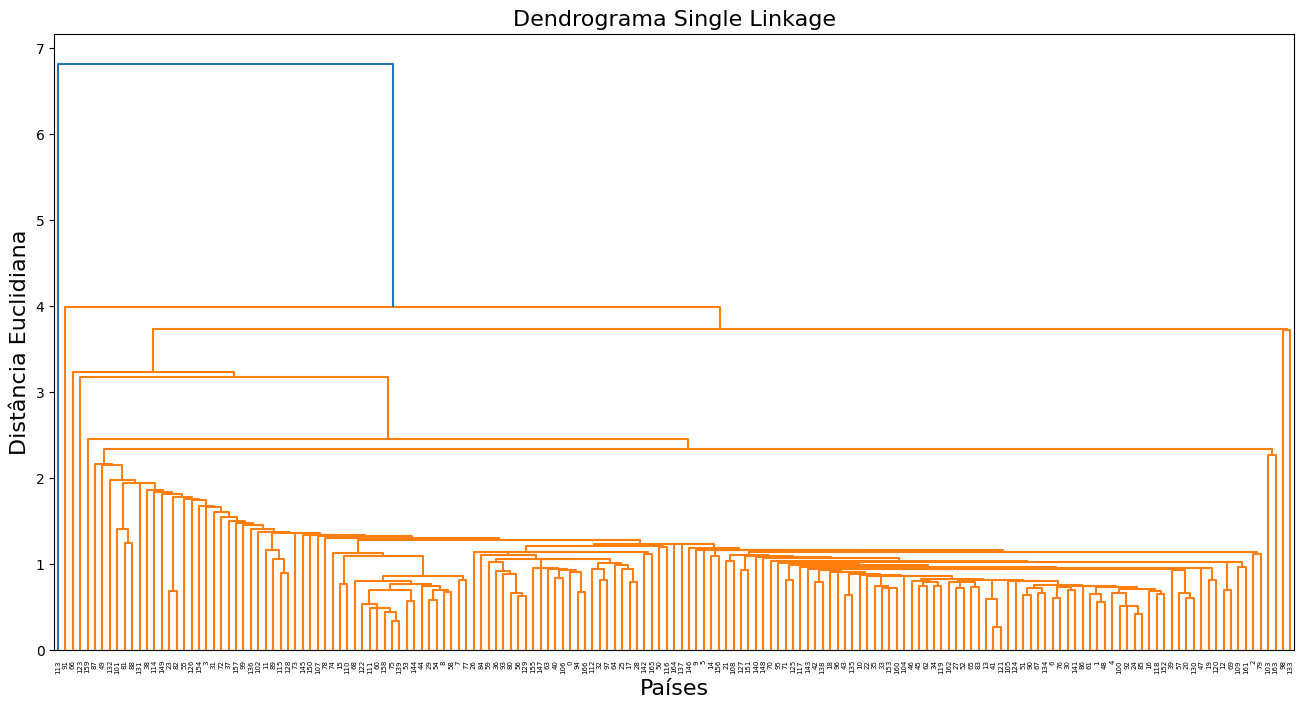

In [145]:
plt.figure(figsize=(16,8))
dend_sing = sch.linkage(paises_pad, method = 'single', metric = 'euclidean')
dendrogram_s = sch.dendrogram(dend_sing)
plt.title('Dendrograma Single Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

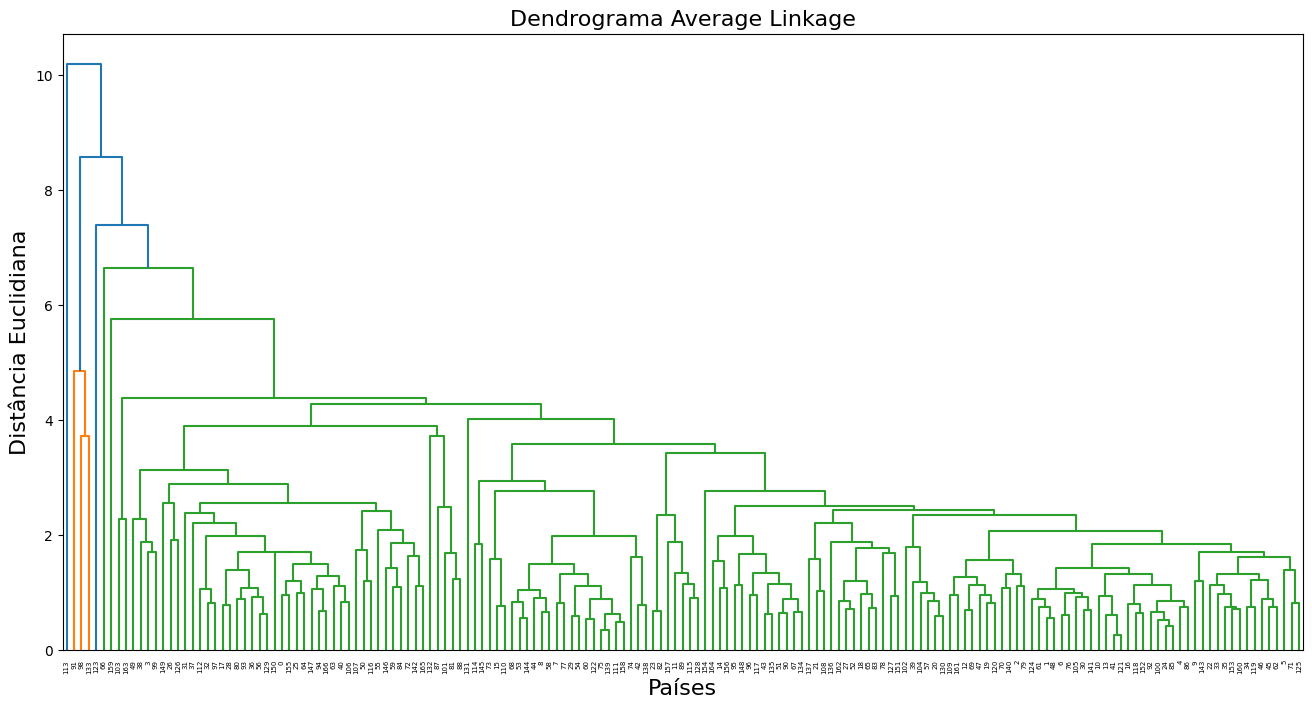

In [146]:
plt.figure(figsize=(16,8))
dend_avg = sch.linkage(paises_pad, method = 'average', metric = 'euclidean')
dendrogram_a = sch.dendrogram(dend_avg)
plt.title('Dendrograma Average Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

Podemos analisar que o método single e o método average aglomeraram muitos dados em poucos clusters, portanto não são os métodos mais adequados.

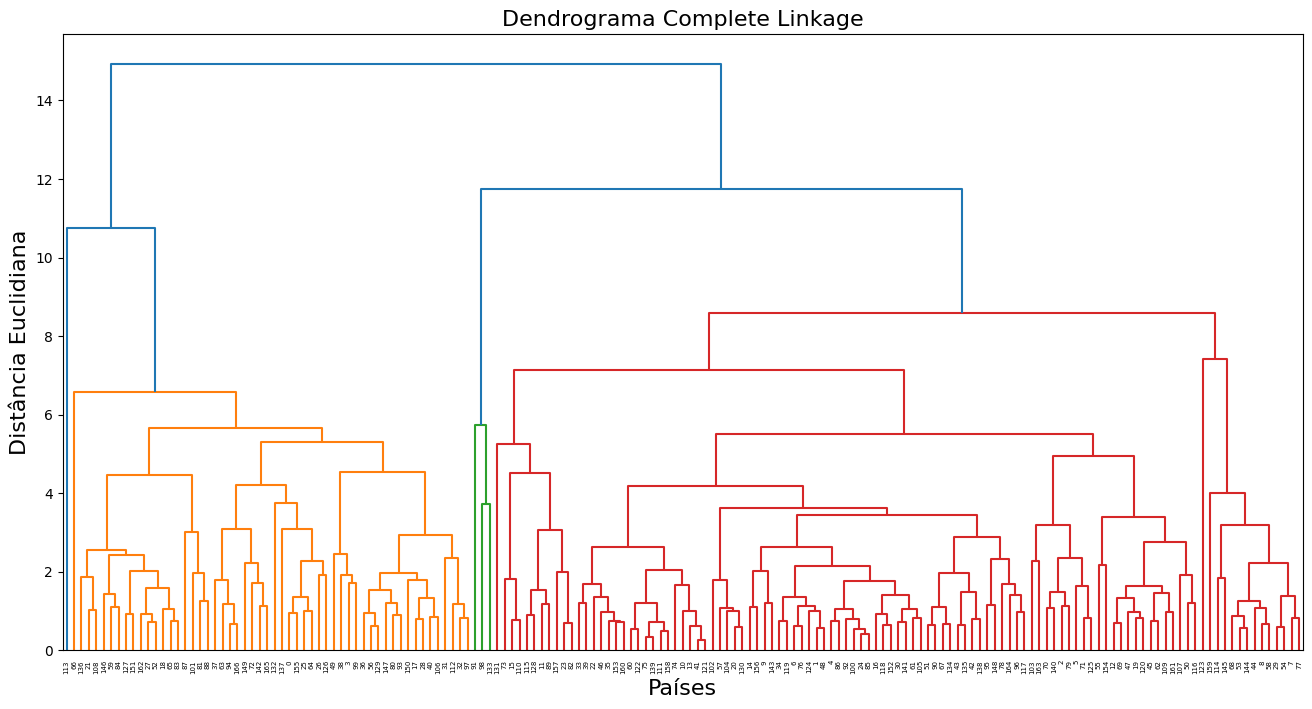

In [147]:
plt.figure(figsize=(16,8))
dend_compl = sch.linkage(paises_pad, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl)
plt.title('Dendrograma Complete Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

O método complete linkage parece ser o mais adequado. Vamos ajustar a análise para contemplar mais alguns clusters. Para isso adicionamos um treshold de cores na distância 8.

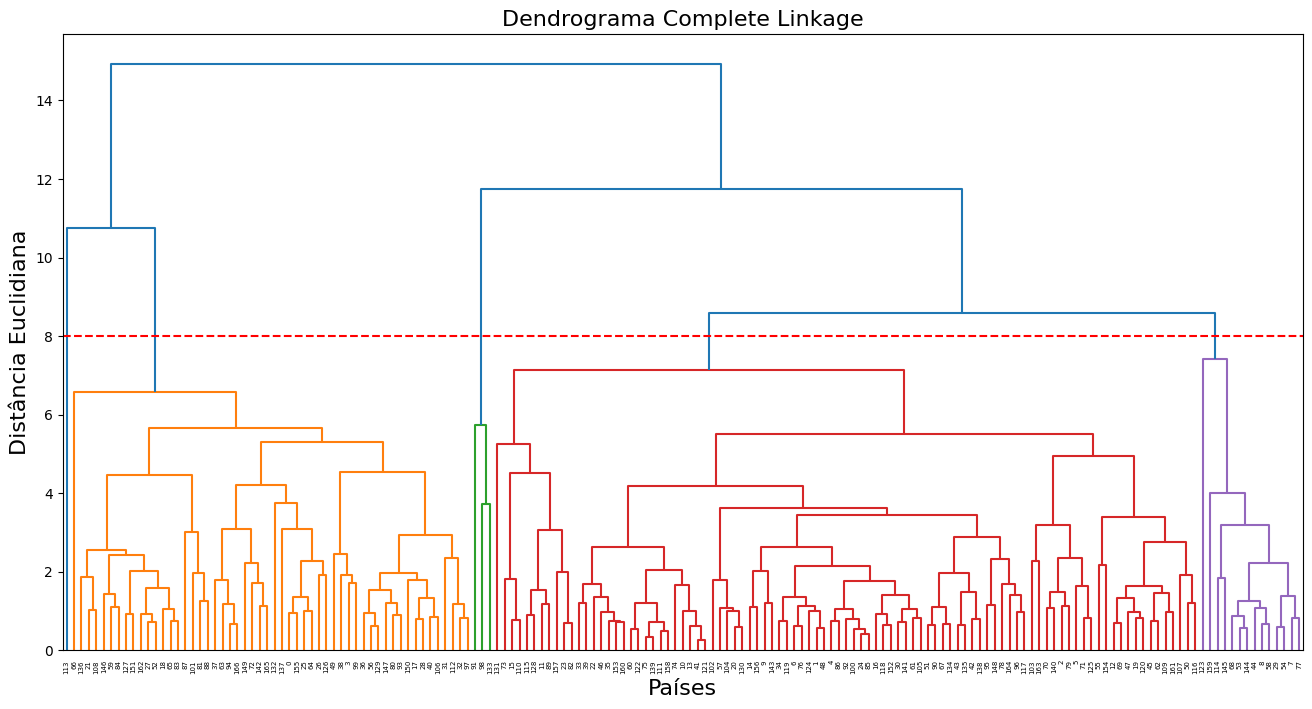

In [148]:
plt.figure(figsize=(16,8))
dend_compl = sch.linkage(paises_pad, method = 'complete', metric = 'euclidean')
dendrogram_c = sch.dendrogram(dend_compl, color_threshold = 8)
plt.title('Dendrograma Complete Linkage', fontsize=16)
plt.xlabel('Países', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 8, color = 'red', linestyle = '--')
plt.show()

#### 1.3.3.3 - Gerando os clusters

In [149]:
# Gerando a variável com a indicação do cluster no dataset

cluster_comp = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(paises_pad)
dados_paises['cluster_complete'] = indica_cluster_comp
paises_pad['cluster_complete'] = indica_cluster_comp
dados_paises['cluster_complete'] = dados_paises['cluster_complete'].astype('category')
paises_pad['cluster_complete'] = paises_pad['cluster_complete'].astype('category')

dados_paises

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp cluster_complete  
0         9.44        56.2       5.82    553                4  
1         4.49        76.3       1.65   4090                1  
2        16.10        76.5       2.89   4460                1  
3        22.40        60.1       6.16   3530                4  
4         1.44        76.8       2.13  12200                1  
..         ...         ...        ...    ...              ...  
162       2.62        63.0       3.50   2970                4  
163      45.90        75.4       2.47  13500                1  
164      12.10        73.1       1.95   1310                1  
165      23.60        67.5       4.67   1310                4  
166      14.00        52.0       5.40   1460                4  

[167 rows x 11 columns]

#### 1.3.3.4 - Verificando quais variáveis axuliaram na formação de clusters

In [150]:
pg.anova(dv='child_mort', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

0         1
Source  cluster_complete    Within
SS             100.71482  65.28518
DF                     4       162
MS             25.178705  0.402995
F              62.478961       NaN
p-unc                0.0       NaN
np2             0.606716       NaN

In [151]:
pg.anova(dv='exports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

0          1
Source  cluster_complete     Within
SS             79.966834  86.033166
DF                     4        162
MS             19.991709   0.531069
F              37.644283        NaN
p-unc                0.0        NaN
np2             0.481728        NaN

In [152]:
# imports
pg.anova(dv='imports', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

0          1
Source  cluster_complete     Within
SS             69.028651  96.971349
DF                     4        162
MS             17.257163   0.598589
F              28.829756        NaN
p-unc                0.0        NaN
np2             0.415835        NaN

In [153]:
# health
pg.anova(dv='health', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

0           1
Source  cluster_complete      Within
SS             25.065957  140.934043
DF                     4         162
MS              6.266489    0.869963
F               7.203166         NaN
p-unc           0.000023         NaN
np2                0.151         NaN

In [154]:
# income
pg.anova(dv='income', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

0         1
Source  cluster_complete    Within
SS              84.56379  81.43621
DF                     4       162
MS             21.140947  0.502693
F              42.055414       NaN
p-unc                0.0       NaN
np2              0.50942       NaN

In [155]:
# inflation
pg.anova(dv='inflation', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

0          1
Source  cluster_complete     Within
SS             88.665145  77.334855
DF                     4        162
MS             22.166286   0.477376
F              46.433635        NaN
p-unc                0.0        NaN
np2             0.534127        NaN

In [156]:
# life_expec
pg.anova(dv='life_expec', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

0          1
Source  cluster_complete     Within
SS            111.450643  54.549357
DF                     4        162
MS             27.862661   0.336724
F              82.746182        NaN
p-unc                0.0        NaN
np2             0.671389        NaN

In [157]:
# total_fer
pg.anova(dv='total_fer', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

0          1
Source  cluster_complete     Within
SS            113.930595  52.069405
DF                     4        162
MS             28.482649   0.321416
F              88.616129        NaN
p-unc                0.0        NaN
np2             0.686329        NaN

In [158]:
# gdpp
pg.anova(dv='gdpp', 
         between='cluster_complete', 
         data=paises_pad,
         detailed=True).T

0          1
Source  cluster_complete     Within
SS            107.339064  58.660936
DF                     4        162
MS             26.834766   0.362105
F              74.107785        NaN
p-unc                0.0        NaN
np2             0.646621        NaN

In [159]:
## A variável mais discriminante contém a maior estatística F (e significativa)
## O valor da estatística F é sensível ao tamanho da amostra

A variável que tiver a maior estatística F é a que mais contribuiu.

#### 1.3.3.5 - Visualização dos clusters

In [160]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)
fig = px.scatter_3d(dados_paises, 
                    x='total_fer', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.update_layout(
    width = 800,
    height = 700
)
iplot(fig)

In [161]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

fig = px.scatter_3d(dados_paises, 
                    x='gdpp', 
                    y='income', 
                    z='life_expec',
                    color='cluster_complete')
fig.update_layout(
    width = 800,
    height = 900
)
iplot(fig)

#### 1.3.3.6 - Interpretação dos clusters

In [162]:
analise_paises = dados_paises.drop(columns=['country']).groupby(by=['cluster_complete'])

C:\Users\Lucas Rezende\AppData\Local\Temp\ipykernel_9236\3856412568.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [163]:
tab_medias_grupo = analise_paises.mean().T
tab_desc_grupo = analise_paises.describe().T

In [164]:
print('Médias dos dados - Cluster complete\n')
print(tab_medias_grupo)

Médias dos dados - Cluster complete

cluster_complete             0             1             2        3  \
child_mort            4.500000     18.874737      4.133333   130.00   
exports              39.392857     42.718726    176.000000    25.30   
health               10.292143      6.410842      6.793333     5.07   
imports              33.207143     44.488062    156.666667    17.40   
income            49721.428571  18582.000000  64033.333333  5150.00   
inflation             2.093571      7.124495      2.468000   104.00   
life_expec           80.892857     74.478947     81.433333    60.50   
total_fer             1.800000      2.142000      1.380000     5.84   
gdpp              53742.857143  11941.473684  57566.666667  2330.00   

cluster_complete            4  
child_mort          81.344444  
exports             31.520741  
health               6.660185  
imports             49.111111  
income            3787.462963  
inflation            8.926389  
life_expec          60.55555

In [165]:
print('Tabelas descritivas - Cluster complete\n')
print(tab_desc_grupo)

Tabelas descritivas - Cluster complete

cluster_complete             0             1              2       3  \
child_mort count     14.000000     95.000000       3.000000     1.0   
           mean       4.500000     18.874737       4.133333   130.0   
           std        1.781529     16.376170       2.309401     NaN   
           min        2.600000      3.200000       2.800000   130.0   
           25%        3.200000      7.700000       2.800000   130.0   
...                        ...           ...            ...     ...   
gdpp       min    40600.000000    482.000000   21100.000000  2330.0   
           25%    44925.000000   3885.000000   33850.000000  2330.0   
           50%    47900.000000   8000.000000   46600.000000  2330.0   
           75%    56525.000000  14050.000000   75800.000000  2330.0   
           max    87800.000000  50300.000000  105000.000000  2330.0   

cluster_complete             4  
child_mort count     54.000000  
           mean      81.344444  
        

## 1.4 -Análise 3 - cartao_credito.csv

In [166]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pingouin as pg
import plotly.express as px 
import plotly.io as pio

### 1.4.1 - Preparando os dados

In [167]:
dados_cartao = pd.read_csv('cartao_credito.csv')
dados_cartao

Sl_No  Customer Key  Avg_Credit_Limit  Total_Credit_Cards  \
0        1         87073            100000                   2   
1        2         38414             50000                   3   
2        3         17341             50000                   7   
3        4         40496             30000                   5   
4        5         47437            100000                   6   
..     ...           ...               ...                 ...   
655    656         51108             99000                  10   
656    657         60732             84000                  10   
657    658         53834            145000                   8   
658    659         80655            172000                  10   
659    660         80150            167000                   9   

     Total_visits_bank  Total_visits_online  Total_calls_made  
0                    1                    1                 0  
1                    0                   10                 9  
2                    1                    3                 4  
3                    1                    1                 4  
4                    0                   12                 3  
..                 ...                  ...               ...  
655                  1                   10                 0  
656                  1                   13                 2  
657                  1                    9                 1  
658                  1                   15                 0  
659                  0                   12                 2  

[660 rows x 7 columns]

Existem alguns dados que não vamos utilizar para clusterização, tal como SI_No e Customer Key.

In [168]:
dados_cartao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [169]:
cartao_cluster = dados_cartao.drop(columns=['Sl_No', 'Customer Key'])
cartao_pad = cartao_cluster.apply(zscore, ddof=1)
print(round(cartao_pad.mean(), 3))
print(round(cartao_pad.std(), 3))

Avg_Credit_Limit       0.0
Total_Credit_Cards     0.0
Total_visits_bank      0.0
Total_visits_online    0.0
Total_calls_made      -0.0
dtype: float64
Avg_Credit_Limit       1.0
Total_Credit_Cards     1.0
Total_visits_bank      1.0
Total_visits_online    1.0
Total_calls_made       1.0
dtype: float64


In [170]:
tab_descritivas = cartao_cluster.describe().T
tab_descritivas

count          mean           std     min      25%  \
Avg_Credit_Limit     660.0  34574.242424  37625.487804  3000.0  10000.0   
Total_Credit_Cards   660.0      4.706061      2.167835     1.0      3.0   
Total_visits_bank    660.0      2.403030      1.631813     0.0      1.0   
Total_visits_online  660.0      2.606061      2.935724     0.0      1.0   
Total_calls_made     660.0      3.583333      2.865317     0.0      1.0   

                         50%      75%       max  
Avg_Credit_Limit     18000.0  48000.0  200000.0  
Total_Credit_Cards       5.0      6.0      10.0  
Total_visits_bank        2.0      4.0       5.0  
Total_visits_online      2.0      4.0      15.0  
Total_calls_made         3.0      5.0      10.0

### 1.4.2 - Pré visualização dos dados

In [171]:
from plotly.offline import init_notebook_mode, iplot

init_notebook_mode(connected=True)

fig = px.scatter_3d(cartao_pad, 
                    x='Avg_Credit_Limit', 
                    y='Total_Credit_Cards', 
                    z='Total_visits_bank')
fig.update_layout(
    width = 600,
    height = 700
)
iplot(fig)

Como podemos observar, já existe um padrão de aglomeração nos dados.

### 1.4.3 - Aplicação do método Não Hierárquico de Elbow

#### 1.4.3.1 - Identificação da quantidade de clusters

##### Método de Elbow

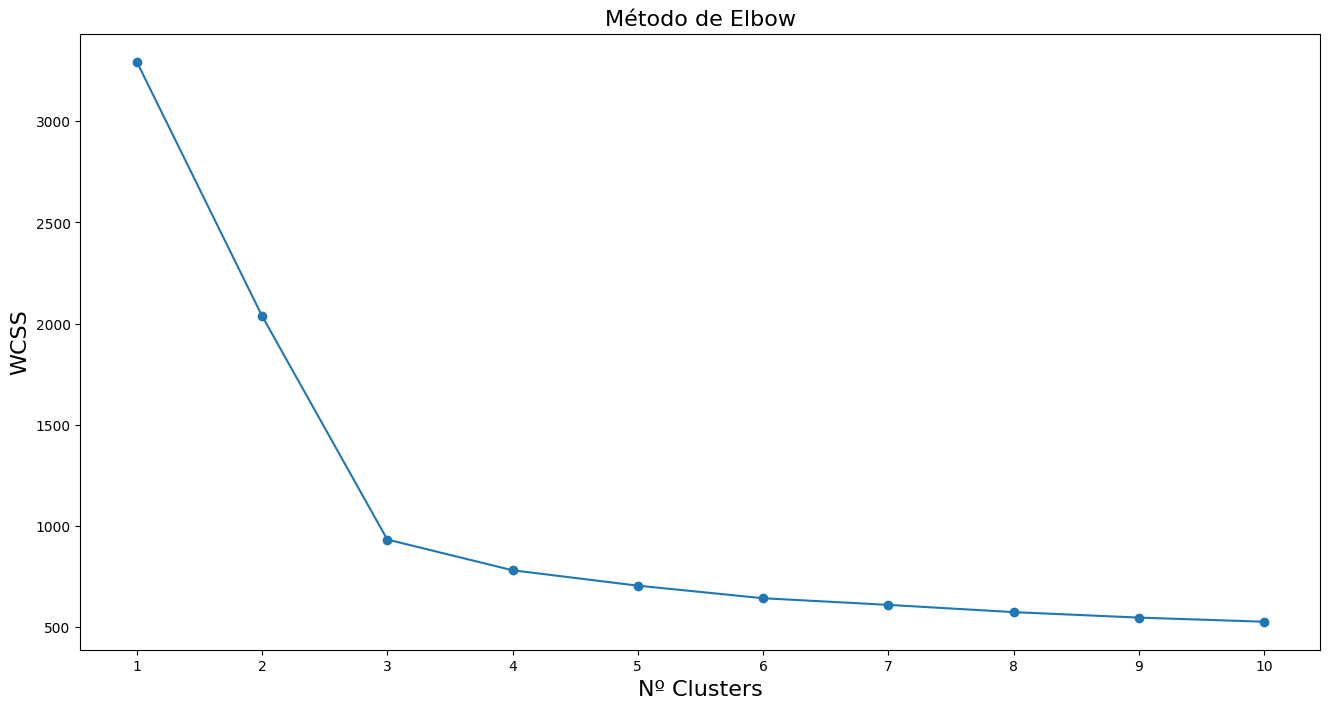

In [172]:
#%% Identificação da quantidade de clusters (Método Elbow)

elbow = []
K = range(1,11) # ponto de parada pode ser parametrizado manualmente
for k in K:
    kmeanElbow = KMeans(n_clusters=k, init='random', random_state=100).fit(cartao_pad)
    elbow.append(kmeanElbow.inertia_)
    
plt.figure(figsize=(16,8))
plt.plot(K, elbow, marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.xticks(range(1,11)) # ajustar range
plt.ylabel('WCSS', fontsize=16)
plt.title('Método de Elbow', fontsize=16)
plt.show()

##### Método da Silhueta

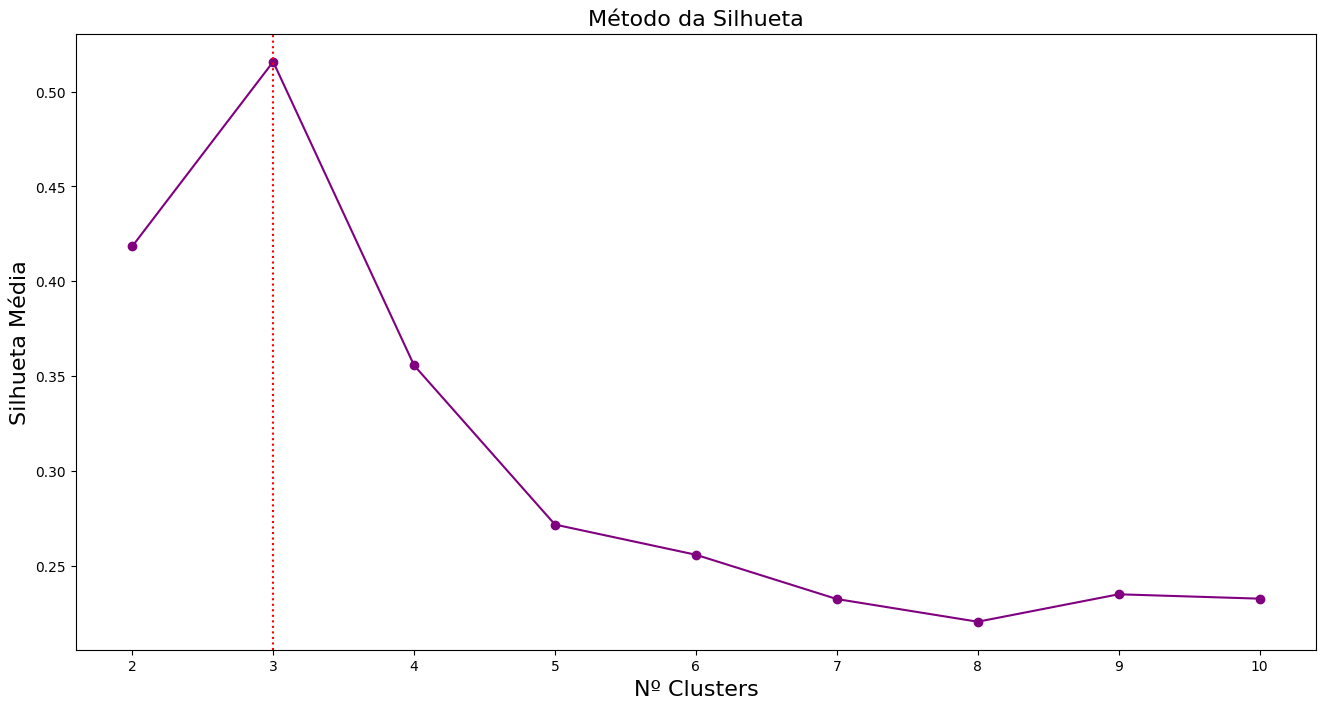

In [173]:

#%% Identificação da quantidade de clusters (Método da Silhueta)

silhueta = []
I = range(2,11) # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(cartao_pad)
    silhueta.append(silhouette_score(cartao_pad, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 11), silhueta, color = 'purple', marker='o')
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()

#### 1.4.3.2 - Gerando os clusters

In [174]:
#%% Cluster Não Hierárquico K-means

# Vamos considerar 3 clusters, considerando as evidências anteriores!

kmeans_final = KMeans(n_clusters = 3, init = 'random', random_state=100).fit(cartao_pad)

# Gerando a variável para identificarmos os clusters gerados

kmeans_clusters = kmeans_final.labels_
cartao_cluster['cluster_kmeans'] = kmeans_clusters
cartao_pad['cluster_kmeans'] = kmeans_clusters
cartao_cluster['cluster_kmeans'] = cartao_cluster['cluster_kmeans'].astype('category')
cartao_pad['cluster_kmeans'] = cartao_pad['cluster_kmeans'].astype('category')

In [175]:
cartao_cluster

Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
0              100000                   2                  1   
1               50000                   3                  0   
2               50000                   7                  1   
3               30000                   5                  1   
4              100000                   6                  0   
..                ...                 ...                ...   
655             99000                  10                  1   
656             84000                  10                  1   
657            145000                   8                  1   
658            172000                  10                  1   
659            167000                   9                  0   

     Total_visits_online  Total_calls_made cluster_kmeans  
0                      1                 0              2  
1                     10                 9              1  
2                      3                 4              2  
3                      1                 4              2  
4                     12                 3              0  
..                   ...               ...            ...  
655                   10                 0              0  
656                   13                 2              0  
657                    9                 1              0  
658                   15                 0              0  
659                   12                 2              0  

[660 rows x 6 columns]

#### 1.4.3.3 - Análise dos anovas

In [176]:
# Avg_Credit_Limit
pg.anova(dv='Avg_Credit_Limit', 
         between='cluster_kmeans', 
         data=cartao_pad,
         detailed=True).T

0           1
Source  cluster_kmeans      Within
SS          479.901385  179.098615
DF                   2         657
MS          239.950692    0.272601
F           880.227938         NaN
p-unc              0.0         NaN
np2           0.728227         NaN

In [177]:
# Total_Credit_Cards
pg.anova(dv='Total_Credit_Cards', 
         between='cluster_kmeans', 
         data=cartao_pad,
         detailed=True).T

0           1
Source  cluster_kmeans      Within
SS          478.078715  180.921285
DF                   2         657
MS          239.039358    0.275375
F           868.050755         NaN
p-unc              0.0         NaN
np2           0.725461         NaN

In [178]:
# Total_visits_bank
pg.anova(dv='Total_visits_bank', 
         between='cluster_kmeans', 
         data=cartao_pad,
         detailed=True).T

0           1
Source  cluster_kmeans      Within
SS          413.975651  245.024349
DF                   2         657
MS          206.987826    0.372944
F           555.010154         NaN
p-unc              0.0         NaN
np2           0.628188         NaN

In [179]:
# Total_visits_online
pg.anova(dv='Total_visits_online', 
         between='cluster_kmeans', 
         data=cartao_pad,
         detailed=True).T

0           1
Source  cluster_kmeans      Within
SS          540.564886  118.435114
DF                   2         657
MS          270.282443    0.180267
F          1499.348962         NaN
p-unc              0.0         NaN
np2           0.820281         NaN

In [180]:
# Total_calls_made
pg.anova(dv='Total_calls_made', 
         between='cluster_kmeans', 
         data=cartao_pad,
         detailed=True).T

0           1
Source  cluster_kmeans      Within
SS          450.849316  208.150684
DF                   2         657
MS          225.424658     0.31682
F           711.523007         NaN
p-unc              0.0         NaN
np2           0.684142         NaN

Por conta do p valor ser 0 (menor que o nível de significância de 5%), todas as variáveis são relevantes na formação de pelo menosum cluster.

#### 1.4.3.4 - Visualização dos clusters

In [181]:
from plotly.offline import init_notebook_mode, iplot

fig = px.scatter_3d(cartao_cluster, 
                    x='Avg_Credit_Limit', 
                    y='Total_Credit_Cards', 
                    z='Total_visits_online',
                    color='cluster_kmeans')

fig.update_layout(
    width=800,
    height=800
)
iplot(fig)


In [182]:
from plotly.offline import init_notebook_mode, iplot

fig = px.scatter_3d(cartao_cluster, 
                    x='Avg_Credit_Limit', 
                    y='Total_Credit_Cards', 
                    z='Total_visits_bank',
                    color='cluster_kmeans')

fig.update_layout(
    width=800,
    height=800
)
iplot(fig)

In [183]:
from plotly.offline import init_notebook_mode, iplot

fig = px.scatter_3d(cartao_cluster, 
                    x='Avg_Credit_Limit', 
                    y='Total_Credit_Cards', 
                    z='Total_calls_made',
                    color='cluster_kmeans')

fig.update_layout(
    width=800,
    height=800
)
iplot(fig)

#### 1.4.3.5 - Interpretação dos clusters

In [184]:
cartao_grupo = cartao_cluster.groupby(by=['cluster_kmeans'])
tab_desc_grupo = cartao_grupo.describe().T

tab_desc_grupo

C:\Users\Lucas Rezende\AppData\Local\Temp\ipykernel_9236\1266835008.py:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



cluster_kmeans                         0             1              2
Avg_Credit_Limit    count      50.000000    224.000000     386.000000
                    mean   141040.000000  12174.107143   33782.383420
                    std     34457.877272   5249.048524   22169.460696
                    min     84000.000000   3000.000000    5000.000000
                    25%    108750.000000   8000.000000   13000.000000
                    50%    145500.000000  12000.000000   31000.000000
                    75%    170000.000000  16000.000000   52000.000000
                    max    200000.000000  50000.000000  100000.000000
Total_Credit_Cards  count      50.000000    224.000000     386.000000
                    mean        8.740000      2.410714       5.515544
                    std         1.274715      1.100783       1.140069
                    min         5.000000      1.000000       2.000000
                    25%         8.000000      1.000000       4.000000
                    50%         9.000000      2.000000       6.000000
                    75%        10.000000      3.000000       6.000000
                    max        10.000000      4.000000       7.000000
Total_visits_bank   count      50.000000    224.000000     386.000000
                    mean        0.600000      0.933036       3.489637
                    std         0.494872      0.803567       1.135563
                    min         0.000000      0.000000       1.000000
                    25%         0.000000      0.000000       3.000000
                    50%         1.000000      1.000000       3.000000
                    75%         1.000000      2.000000       5.000000
                    max         1.000000      2.000000       5.000000
Total_visits_online count      50.000000    224.000000     386.000000
                    mean       10.900000      3.553571       0.981865
                    std         2.880264      1.218978       0.857167
                    min         6.000000      1.000000       0.000000
                    25%         8.000000      2.000000       0.000000
                    50%        11.000000      4.000000       1.000000
                    75%        13.000000      4.000000       2.000000
                    max        15.000000     10.000000       3.000000
Total_calls_made    count      50.000000    224.000000     386.000000
                    mean        1.080000      6.870536       2.000000
                    std         0.876915      1.990161       1.430648
                    min         0.000000      1.000000       0.000000
                    25%         0.000000      5.000000       1.000000
                    50%         1.000000      7.000000       2.000000
                    75%         2.000000      9.000000       3.000000
                    max         3.000000     10.000000       4.000000

## 1.5 - Análise 4 - regional_varejista.xlsx

In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pingouin as pg
import plotly.express as px 
import plotly.io as pio
pio.renderers.default='browser'

### 1.5.1 - Preparando os dados

In [186]:
varejista = pd.read_excel('regional_varejista.xlsx')
varejista[0:6]

loja    regional  atendimento  sortimento  organização
0     1  Regional 3            6           6            4
1     2  Regional 3           14           2            4
2     3  Regional 3            8           4            6
3     4  Regional 3            4           4            4
4     5  Regional 3            6           6            6
5     6  Regional 2           38          38          100

In [187]:
print(varejista.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   loja         18 non-null     int64 
 1   regional     18 non-null     object
 2   atendimento  18 non-null     int64 
 3   sortimento   18 non-null     int64 
 4   organização  18 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 852.0+ bytes
None


In [188]:
print(varejista[['atendimento','sortimento', 'organização']].describe())

       atendimento  sortimento  organização
count    18.000000   18.000000    18.000000
mean     28.111111   27.888889    33.111111
std      27.003026   30.497616    37.247801
min       2.000000    2.000000     2.000000
25%       6.000000    4.000000     4.000000
50%      11.000000    6.000000     6.000000
75%      52.000000   51.500000    55.000000
max      78.000000   86.000000   100.000000


In [189]:
As variáveis parecem estar em escalas compatíveis, por isso os dados não serão normalizados.

SyntaxError: invalid syntax (2155640231.py, line 1)

In [ ]:
varejo = varejista.drop(columns=['loja','regional'])

### 1.5.2 - Aplicando o método Hierárquico Aglomarativo

#### 1.5.2.1 - Estudo do número de clusters

In [ ]:
#%% Cluster Hierárquico Aglomerativo: single linkage + distância cityblock

# Gerando o dendrograma

plt.figure(figsize=(16,8))
dend_sing = sch.linkage(varejo, method = 'single', metric = 'cityblock')
dendrogram_s = sch.dendrogram(dend_sing, labels = list(varejista.loja))
plt.title('Dendrograma - Single - Cityblock', fontsize=16)
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Distância Cityblock (Manhattan)', fontsize=16)
plt.show()

In [ ]:
#%% Cluster Hierárquico Aglomerativo: single linkage + distância cityblock

# Gerando o dendrograma

plt.figure(figsize=(16,8))
dend_sing = sch.linkage(varejo, method = 'single', metric = 'cityblock')
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = 60, labels = list(varejista.loja))
plt.title('Dendrograma - Single - Cityblock', fontsize=16)
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Distância Cityblock (Manhattan)', fontsize=16)
plt.axhline(y = 60, color = 'red', linestyle = '--')
plt.show()

In [ ]:
plt.figure(figsize=(16,8))
dend_sing_euc = sch.linkage(varejo, method = 'complete', metric = 'euclidean')
dendrogram_euc = sch.dendrogram(dend_sing_euc, color_threshold = 55, labels = list(varejista.loja))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Lojas', fontsize=16)
plt.ylabel('Distância Euclideana', fontsize=16)
plt.axhline(y = 55, color = 'red', linestyle = '--')
plt.show()


#### 1.5.2.2 - Gerando os clusters

In [ ]:
cluster_sing = AgglomerativeClustering(n_clusters = 3, metric = 'cityblock', linkage = 'single')
indica_cluster_sing = cluster_sing.fit_predict(varejo)
varejista['cluster_single'] = indica_cluster_sing
varejista['cluster_single'] = varejista['cluster_single'].astype('category')


cluster_comp = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'complete')
indica_cluster_comp = cluster_comp.fit_predict(varejo)
varejista['cluster_complete'] = indica_cluster_comp
varejista['cluster_complete'] = varejista['cluster_complete'].astype('category')

varejista

#### 1.5.2.3 - Visualizando os clusters

In [ ]:
#%% Plotando as observações e seus clusters (single + cityblock)

plt.figure(figsize=(10,10))
fig = sns.scatterplot(x='atendimento', y='sortimento', s=60, data=varejista, hue='cluster_single')
plt.title('Clusters', fontsize=16)
plt.xlabel('Atendimento', fontsize=16)
plt.ylabel('Sortimento', fontsize=16)
plt.show()

### 1.5.3 - Aplicando o método Não Hierárquico K Means

#### 1.5.3.1 - Gerando os clusters a partir do método hierárquico

Utilizando o resultado da análise em 1.5.2 podemos dar entrada no método não hierárquico com número de clusters definido como sendo 3.

In [ ]:
kmeans_varejista = KMeans(n_clusters=3, init='random', random_state=100).fit(varejo)

kmeans_clusters = kmeans_varejista.labels_
varejista['cluster_kmeans'] = kmeans_clusters
varejista['cluster_kmeans'] = varejista['cluster_kmeans'].astype('category')
varejista
## O padrão dos clusters é o mesmo dos métodos hierárquicos anteriores

#### 1.5.3.2 - Análise da silhueta no método K Means

In [ ]:

#%% Método da silhueta para identificação do nº de clusters

silhueta = []
I = range(2,9) # ponto de parada pode ser parametrizado manualmente
for i in I: 
    kmeansSil = KMeans(n_clusters=i, init='random', random_state=100).fit(varejo)
    silhueta.append(silhouette_score(varejo, kmeansSil.labels_))

plt.figure(figsize=(16,8))
plt.plot(range(2, 9), silhueta, color = 'purple', marker='o') # Ajustar range
plt.xlabel('Nº Clusters', fontsize=16)
plt.ylabel('Silhueta Média', fontsize=16)
plt.title('Método da Silhueta', fontsize=16)
plt.axvline(x = silhueta.index(max(silhueta))+2, linestyle = 'dotted', color = 'red') 
plt.show()

Na análise da silhueta, quanto mais próximo de 1, melhor é a organização dos clusters.

#### 1.5.3.3 - Gerando os centróides

In [ ]:
cent_finais = pd.DataFrame(kmeans_varejista.cluster_centers_)
cent_finais.columns = varejo.columns
cent_finais.index.name = 'cluster'
cent_finais

#### 1.5.3.4 - Visualizando os centróides

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='atendimento', y='sortimento', data=varejista, hue='cluster_kmeans', palette='viridis', s=100)
sns.scatterplot(x='atendimento', y='sortimento', data=cent_finais, s=40, c='red', label='Centroides', marker="X")
plt.title('Clusters e centroides', fontsize=16)
plt.xlabel('Atendimento', fontsize=16)
plt.ylabel('Sortimento', fontsize=16)
plt.legend()
plt.show()

#### 1.5.3.5 - Análise dos anovas

In [ ]:
# Atendimento
pg.anova(dv='atendimento', 
         between='cluster_kmeans', 
         data=varejista,
         detailed=True).T

In [ ]:
# Sortimento
pg.anova(dv='sortimento', 
         between='cluster_kmeans', 
         data=varejista,
         detailed=True).T

In [ ]:
# Organização
pg.anova(dv='organização', 
         between='cluster_kmeans', 
         data=varejista,
         detailed=True).T

#### 1.5.3.6 - Visualizando os clusters

In [ ]:
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

fig = px.scatter_3d(varejista, 
                    x='atendimento', 
                    y='sortimento', 
                    z='organização',
                    color='cluster_kmeans')

fig.update_layout(
    width = 800,
    height = 800
)
iplot(fig)

In [ ]:
analise_varejista = varejista.drop(columns=['loja']).groupby(by=['cluster_kmeans'])

analise_varejista.describe().T

## 1.6 - Considerações finais

- A análise de cluster é bastante sensível à presença de outliers
- Quando há variáveis categóricas, pode aplicar a Análise de Correspondência
-  O output do método hierárquico pode ser utilizado como input no método não
hierárquico para a identificação inicial da quantidade de clusters
- O método não hierárquico k-means pode ser aplicado em amostras maiores

# 2. Unsupervised Machine Learning: Análise Fatorial e PCA

## 2.1 - Quando aplicar a análise fatorial?

A análise fatorial é uma técnica aplicável apenas às variáveis métricas. Ela tem como objetivo a análise do comportamento conjunto das variáveis, e o pilar desse método é o coeficiente de correlação de Pearson. A técnica cria fatores que representam as informações contidas no banco de dados originais, a partir deles, pode-se aplicar um critério de seleção e manter um número menor de observações para se trabalhar, realizando assim, uma redução estrutural no banco de dados.

Os fatores extraídos são ortogonais entre si, o que significa que não há correlação entre eles. Esse fato pode ser bem aproveitado para utilizar esses dados como input em outra técnica, que exija baixa correlação entre os dados.

* Quando aplicar a análise?
    - Quando as variáveis forem métricas: depende das correlações entre variáveis
    - Trata-se do agrupamento das variáveis em fatores. Os objetivos podem ser:
      * Obter o comportamento conjunto de variáveis, combinando-as para redução estrutural
      * Análise da validade de construtos pela identificação alocadas aos fatores
      * Elaboração de rankings para classificação de desempenho por meio dos fatores
      * Criação de fatores ortogonais entre eles e posterior uso em modelos supervisionados

O método é aplicado **exclusivamente em variáveis métricas**, e pode ter o objetivo de agrupar variáveis, diferentemente do clustering que agrupa observação. Tem como base a matriz de correlações.
  

Análise faorial por componentes principais


Análise fatorial PCA: modelo não supervisionado de machine learning

## 2.2 Estrutura do método

Procedimento:

1. A PCA fundamenta-se na existência de correlações entre variáveis originais para a criação dos fatores
    - Coeficiente de correlaão de Pearson: relação linear entre duas variáveis métricas
    - Coeficientes de correlação mais próximos dos valores extremos +/-1, propiciam a extração de um único fator e indicam a existência de relação entre variáveis
    - Coeficientes de correlação mais próximos de zero propiciam a extração de diferentes fatores e indicam que a relação entre variáveis é praticamente inexistente

2. Verifica-se se o método é aplicável
    - Para que que a análise fatorial seja adequada, devem existir valores mais elevados (-1; +1) e estatisticamente significantes na matriz de correlações
    - Para investigar a adequação global da análise fatorial, utilizamos o teste de esfericidade de Bartlett
       * Compara a matriz de correlações com a matriz identidade de mesma dimensão e espera-se que tais matrizes sejam diferentes para que a análise seja aplicável

3. Se o método for aplicável, vamos encontrar os autovalores e autovetores da análise.
    - Os autovalores, geram autovetores, que são utilizados para calcular os fatores.

## 2.3 - Aplicando o método no Python

### 2.3.1 - Preparando os dados

In [30]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import sympy as sy
import scipy as sp

In [31]:
notas = pd.read_excel("notas_fatorial.xlsx")
print(notas.info())
print(notas.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   estudante  100 non-null    object 
 1   finanças   100 non-null    float64
 2   custos     100 non-null    float64
 3   marketing  100 non-null    float64
 4   atuária    100 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.0+ KB
None
         finanças      custos   marketing     atuária
count  100.000000  100.000000  100.000000  100.000000
mean     5.834000    4.717000    5.668000    5.314000
std      3.122749    2.455999    2.828351    2.513078
min      0.600000    1.900000    1.000000    1.700000
25%      3.100000    2.900000    3.000000    3.200000
50%      5.800000    4.000000    6.000000    5.000000
75%      9.000000    6.000000    8.000000    7.025000
max     10.000000   10.000000   10.000000   10.000000


In [32]:
notas[0:5]

estudante  finanças  custos  marketing  atuária
0     Gabriela       5.8     4.0        1.0      6.0
1  Luiz Felipe       3.1     3.0       10.0      2.0
2     Patrícia       3.1     4.0        4.0      4.0
3      Gustavo      10.0     8.0        8.0      8.0
4      Letícia       3.4     2.0        3.2      3.2

In [33]:
notas_pca = notas[["finanças", "custos", "marketing", "atuária"]]
notas_pca[0:5]

finanças  custos  marketing  atuária
0       5.8     4.0        1.0      6.0
1       3.1     3.0       10.0      2.0
2       3.1     4.0        4.0      4.0
3      10.0     8.0        8.0      8.0
4       3.4     2.0        3.2      3.2

### 2.3.2 - Gerando a Matriz de Correlações

In [34]:
pg.rcorr(notas_pca, method='pearson', upper = 'pval', decimals = 4,
        pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

C:\Users\Lucas Rezende\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



finanças  custos marketing atuária
finanças         -     ***               ***
custos      0.7556       -               ***
marketing  -0.0295  0.0029         -        
atuária     0.7109  0.8081   -0.0443       -

In [35]:

# Matriz de correlações básica
corr = notas_pca.corr()

# Gráfico de calor (heatmap)
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.4f}',
        colorscale='viridis'))

fig.update_layout(
    height = 600,
    width = 600)

fig.show()

### 2.3.3 - Teste de Esferecidade de Barlett

Antes de implementar o método devemos verificar se é possível aplica-lo:

In [36]:
bartlett, p_value = calculate_bartlett_sphericity(notas_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 191.88
p-valor: 0.0


Rejeitamos a hipótese nula, pois o **p-valor é menor que o nível de significância**. Isso significa que temos coeficientes 
de correlação significativos e podemos prosseguir com a análise.

### 2.3.4 - Obtendo os autovalores

Nesse caso, como temos 4 variáveis, o número de fatores deverá ser 4 também.

In [37]:
#%% Definindo a PCA (procedimento inicial com todos os fatores possíveis)

fa = FactorAnalyzer(n_factors=4, method='principal', rotation=None).fit(notas_pca)

In [38]:
#%% Obtendo os eigenvalues (autovalores): resultantes da função FactorAnalyzer

autovalores = fa.get_eigenvalues()[0]
autovalores

array([2.51812681, 1.0003793 , 0.29761585, 0.18387804])

In [39]:
round(autovalores.sum(), 2)

4.0

---

Essa seção tem fins didáticos e não faz parte da análise.

---

In [40]:
autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T
print(tabela_eigen)


         Autovalor  Variância  Variância Acumulada
Fator 1   2.518127   0.629532             0.629532
Fator 2   1.000379   0.250095             0.879627
Fator 3   0.297616   0.074404             0.954030
Fator 4   0.183878   0.045970             1.000000


### 2.3.5 - Estudo das cargas fatoriais

C:\Users\Lucas Rezende\AppData\Local\Temp\ipykernel_7620\1978155943.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




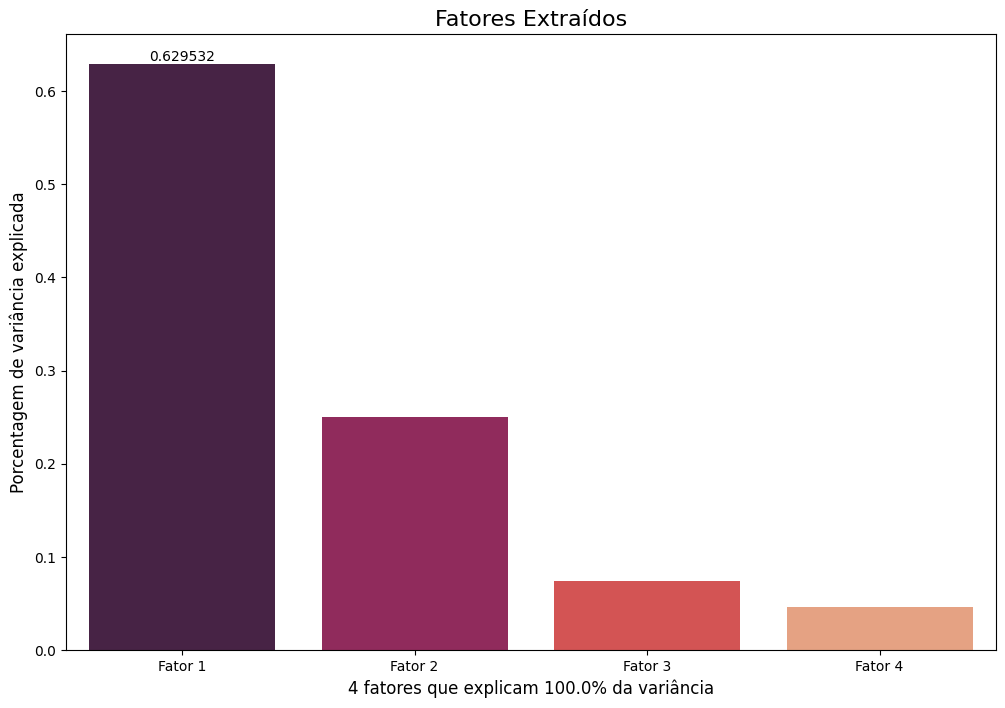

In [41]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraídos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()


Formatando a tabela de cargas fatoriais

In [42]:
cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = notas_pca.columns
print(tabela_cargas)


            Fator 1   Fator 2   Fator 3   Fator 4
finanças   0.895398  0.007086  0.436720  0.086533
custos     0.934033  0.048581 -0.119783 -0.332978
marketing -0.042466  0.998933 -0.000358  0.018170
atuária    0.917697 -0.010133 -0.304210  0.255315


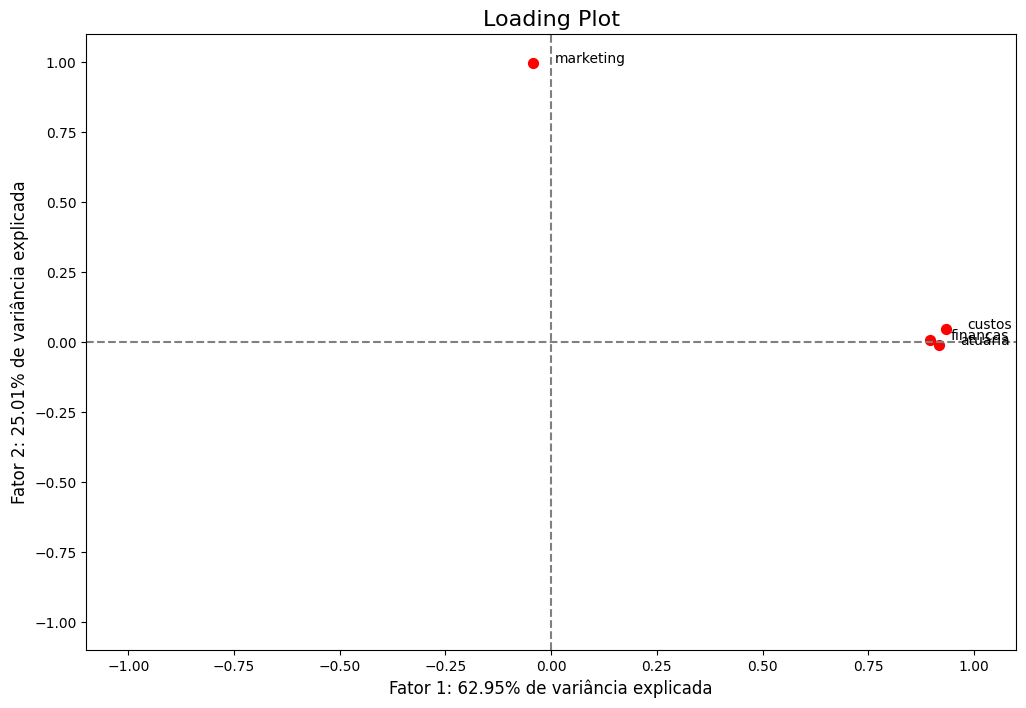

In [43]:
#%% Gráfico das cargas fatoriais (loading plot)

plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=50, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

### 2.3.6 - Determinando as comunalidades

As comunalidades mostram se houve perda de variância se aplicarmos as cargas fatoriais nos dados originais

In [44]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = notas_pca.columns

print(tabela_comunalidades)

           Comunalidades
finanças             1.0
custos               1.0
marketing            1.0
atuária              1.0


### 2.3.7 - Extração dos fatores para as observações do banco de dados

In [46]:
#%% Extração dos fatores para as observações do banco de dados

fatores = pd.DataFrame(fa.transform(notas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

notas_concat = pd.concat([notas.reset_index(drop=True), fatores], axis=1)
notas_concat

estudante  finanças  custos  marketing  atuária   Fator 1   Fator 2  \
0      Gabriela       5.8     4.0        1.0      6.0  0.015232 -1.673452   
1   Luiz Felipe       3.1     3.0       10.0      2.0 -1.082468  1.510196   
2      Patrícia       3.1     4.0        4.0      4.0 -0.603231 -0.607015   
3       Gustavo      10.0     8.0        8.0      8.0  1.352586  0.891321   
4       Letícia       3.4     2.0        3.2      3.2 -0.984279 -0.926699   
..          ...       ...     ...        ...      ...       ...       ...   
95       Sheila       7.7     4.3        5.2      5.1  0.121867 -0.169227   
96        Pedro       9.0     6.0        4.0      9.8  1.220881 -0.577316   
97      Horácio       9.3     6.0        7.0      7.0  0.829146  0.499201   
98      Leandro       9.0     6.5        3.0      9.0  1.186171 -0.918969   
99       Estela       8.9     5.0        2.0      8.0  0.807290 -1.299785   

     Fator 3   Fator 4  
0  -0.176396  0.743198  
1   0.344452 -0.829870  
2  -0.635247 -0.670994  
3   0.327787 -0.228435  
4   0.163203  0.384190  
..       ...       ...  
95  1.037620  0.456371  
96 -0.549185  1.961256  
97  0.735807  0.557208  
98 -0.304080  1.111389  
99  0.304954  1.617390  

[100 rows x 9 columns]

### 2.3.8 - Estudo dos scores fatoriais

In [49]:

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = notas_pca.columns

print(tabela_scores)


            Fator 1   Fator 2   Fator 3   Fator 4
finanças   0.355581  0.007083  1.467395  0.470601
custos     0.370924  0.048562 -0.402475 -1.810861
marketing -0.016864  0.998554 -0.001204  0.098814
atuária    0.364436 -0.010129 -1.022155  1.388503


In [51]:
pg.rcorr(notas_concat[['Fator 1','Fator 2', 'Fator 3', 'Fator 4']],
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})


C:\Users\Lucas Rezende\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Fator 1 Fator 2 Fator 3 Fator 4
Fator 1       -                        
Fator 2    -0.0       -                
Fator 3     0.0     0.0       -        
Fator 4     0.0    -0.0    -0.0       -

Podemos observar que os fatores são ortogonais visto que são linearmente independentes, ou seja, há zero correlação entre eles.

### 2.3.9 - Escolha dos fatores

Nem todos os K fatores devem ser utilizados. Os autovalores indicam o percentual da variância compartilhada entre as variáveis. Segundo o critério de Kaiser, devemos escolher apenas os fatores correspondentes a autovalores > 1.

In [55]:
#%% Critério de Kaiser (raiz latente)

# Verificar os autovalores com valores maiores que 1
# Existem dois componentes maiores do que 1

#%% Parametrizando a PCA para dois fatores (autovalores > 1)

fa = FactorAnalyzer(n_factors=2, method='principal', rotation=None).fit(notas_pca)

#%% Eigenvalues, variâncias e variâncias acumuladas de 2 fatores

# Note que não há alterações nos valores, apenas ocorre a seleção dos fatores

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   2.518127   0.629532             0.629532
Fator 2   1.000379   0.250095             0.879627


*Nota:* Quando jogamos fatores fora, observamos uma variação na comunalidade. Quanto maior a comunalidade, menos variância das variáveis originais foi perdida.

In [56]:
comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = notas_pca.columns

print(tabela_comunalidades)

           Comunalidades
finanças        0.801788
custos          0.874778
marketing       0.999670
atuária         0.842271


### 2.3.10 - Rankeando os fatores

In [60]:
#%% Determinando as cargas fatoriais

# Note que não há alterações nas cargas fatoriais nos 2 fatores!

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = notas_pca.columns

print(tabela_cargas)


            Fator 1   Fator 2
finanças   0.895398  0.007086
custos     0.934033  0.048581
marketing -0.042466  0.998933
atuária    0.917697 -0.010133


In [61]:

# As comunalidades são alteradas, pois há fatores retirados da análise!

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = notas_pca.columns

print(tabela_comunalidades)

           Comunalidades
finanças        0.801788
custos          0.874778
marketing       0.999670
atuária         0.842271


In [69]:

#%% Extração dos fatores para as observações do banco de dados

# Vamos remover os fatores obtidos anteriormente

notas_concat_atualizado = notas_concat.drop(columns=['Fator 1', 'Fator 2', 'Fator 3', 'Fator 4'])

#  Vamos gerar novamente, agora para os 2 fatores extraídos

fatores = pd.DataFrame(fa.transform(notas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

notas_concat_atualizado = pd.concat([notas.reset_index(drop=True), fatores], axis=1)

# Note que são os mesmos, apenas ocorre a seleção dos 2 primeiros fatores!


In [66]:

#%% Identificando os scores fatoriais

# Não há mudanças nos scores fatoriais!

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = notas_pca.columns

print(tabela_scores)

            Fator 1   Fator 2
finanças   0.355581  0.007083
custos     0.370924  0.048562
marketing -0.016864  0.998554
atuária    0.364436 -0.010129


In [68]:

#%% Criando um ranking (soma ponderada e ordenamento)

# O ranking irá considerar apenas os 2 fatores com autovalores > 1
# A base de seleção é a tabela_eigen

notas_concat_atualizado['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    notas_concat_atualizado['Ranking'] = notas_concat_atualizado['Ranking'] + notas_concat_atualizado[tabela_eigen.index[index]]*variancia
    
print(notas_concat_atualizado)


      estudante  finanças  custos  marketing  atuária   Fator 1   Fator 2  \
0      Gabriela       5.8     4.0        1.0      6.0  0.015232 -1.673452   
1   Luiz Felipe       3.1     3.0       10.0      2.0 -1.082468  1.510196   
2      Patrícia       3.1     4.0        4.0      4.0 -0.603231 -0.607015   
3       Gustavo      10.0     8.0        8.0      8.0  1.352586  0.891321   
4       Letícia       3.4     2.0        3.2      3.2 -0.984279 -0.926699   
..          ...       ...     ...        ...      ...       ...       ...   
95       Sheila       7.7     4.3        5.2      5.1  0.121867 -0.169227   
96        Pedro       9.0     6.0        4.0      9.8  1.220881 -0.577316   
97      Horácio       9.3     6.0        7.0      7.0  0.829146  0.499201   
98      Leandro       9.0     6.5        3.0      9.0  1.186171 -0.918969   
99       Estela       8.9     5.0        2.0      8.0  0.807290 -1.299785   

     Ranking  
0  -0.408932  
1  -0.303756  
2  -0.531564  
3   1.074410  


## 2.4 - Análise 2 - preco_casas.xlsx

Análise de um banco de dados de imóveis à venda. As variáveis são:

1. Tamanho do terreno
2. Tamanho da casa
3. Número de quartos
4. Número de banheiros
5. Distância até a escola
6. Idade da casa
7. Distância até o mercado
8. Taxa de criminalidade
9. Valor do imóvel

A partir da análise dos fatores veremos como cada uma das variáveis de 1 a 8 se correlacionam com o valor do imóvel.

### 2.4.1 - Preparando os dados

In [44]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [45]:
casas = pd.read_excel('preco_casas.xlsx')
casas[0:5]

land_size_sqm  house_size_sqm  no_of_rooms  no_of_bathrooms  \
0            201             177            3                1   
1            196             182            4                3   
2            198             182            4                4   
3            178             166            2                3   
4            183             165            3                1   

   distance_to_school  house_age  distance_to_supermarket_km  \
0                 3.3         10                         6.8   
1                 1.2         11                         4.1   
2                 5.9         20                         2.1   
3                 5.9          5                         0.7   
4                 3.8          8                         0.7   

   crime_rate_index  property_value  
0              0.90          165432  
1              1.42          187043  
2              4.12          148658  
3              4.36          123785  
4              0.42          156470

Primeiro devemos verificar se todas as variáveis são métricas:

In [46]:
casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4954 entries, 0 to 4953
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   land_size_sqm               4954 non-null   int64  
 1   house_size_sqm              4954 non-null   int64  
 2   no_of_rooms                 4954 non-null   int64  
 3   no_of_bathrooms             4954 non-null   int64  
 4   distance_to_school          4954 non-null   float64
 5   house_age                   4954 non-null   int64  
 6   distance_to_supermarket_km  4954 non-null   float64
 7   crime_rate_index            4954 non-null   float64
 8   property_value              4954 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 348.5 KB


Gerando as estatísticas descritivas:

In [47]:
casas.describe()

land_size_sqm  house_size_sqm  no_of_rooms  no_of_bathrooms  \
count    4954.000000     4954.000000  4954.000000      4954.000000   
mean      250.131409      231.250908     3.788252         3.199839   
std       103.131939       94.571642     1.585371         1.602300   
min       100.000000       85.000000     1.000000         1.000000   
25%       180.000000      165.000000     3.000000         2.000000   
50%       235.000000      217.500000     4.000000         3.000000   
75%       295.000000      274.000000     5.000000         4.000000   
max       796.000000      760.000000     8.000000         9.000000   

       distance_to_school    house_age  distance_to_supermarket_km  \
count         4954.000000  4954.000000                 4954.000000   
mean             3.454219    11.444691                    3.508639   
std              2.007358     6.356991                    1.991266   
min              0.100000     1.000000                    0.100000   
25%              1.700000     6.000000                    1.800000   
50%              3.400000    11.000000                    3.500000   
75%              5.200000    17.000000                    5.300000   
max              6.900000    22.000000                    6.900000   

       crime_rate_index  property_value  
count       4954.000000     4954.000000  
mean           2.986110   201974.738999  
std            1.737742    90031.882219  
min            0.010000    32622.000000  
25%            1.470000   136777.000000  
50%            3.020000   194515.500000  
75%            4.490000   246590.000000  
max            5.990000   692086.000000

In [48]:
casas_pca = casas.drop(columns=['property_value'])

### 2.4.2 - Gerando a Matriz de Correlações

In [49]:
# Matriz de correlações

corr = casas.corr()

# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 600,
    width = 600,
    yaxis=dict(autorange="reversed"))

fig.show()

Olhando para a matriz de correlação de Pearson, podemos observar que há muitas variáveis com correlações altas, isso favorece a representação das mesmas em um único fator. Já as que possuem baixa correlação, provavelmente estarão representadas em outro fator.

### 2.4.3 - Teste de esferecidade de Barlett

O primeiro passo em termos formais da análise fatorial, é o teste de hipótese para verificar se a matriz de correlações é estatísticamente igual à matriz identidade. Nesse caso, pela matriz de correlação podemos esperar que essa hipótese seja rejeitada.

In [50]:
#%% Teste de Esfericidade de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(casas_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 31857.46
p-valor: 0.0


Como o p-valor é menor que o nível de significância, podemos rejeitar a hipótese nula e aceitar a hipótese alternativa, ou seja, a matriz de correlações é estatísticamente diferente da matriz identidade e podemos prosseguir com a análise fatorial.

### 2.4.4 - Obtendo os autovalores

In [51]:
#%% Definindo a PCA (procedimento inicial extraindo todos os fatores possíveis)

fa = FactorAnalyzer(n_factors=8, method='principal', rotation=None).fit(casas_pca)

#%% Obtendo os autovalores

autovalores = fa.get_eigenvalues()[0]

print(autovalores)

# Soma dos autovalores

round(autovalores.sum(), 3)

[3.44078793 1.01989592 1.01155913 0.99164638 0.97675882 0.42231466
 0.128448   0.00858917]


8.0

Segundo o critério de Kaiser, somente fatores derivados de autovalores maiores do que 1 deverão ser considerados.

### 2.4.5 - Estudo dos fatores

In [52]:
#%% Critério de Kaiser (raiz latente)

# Temos 3 autovalores maiores do que 1
# Vamos parametrizar a função para a extração de 3 fatores!

fa = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(casas_pca)

In [53]:
#%% Eigenvalues, variâncias e variâncias acumuladas

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   3.440788   0.430098             0.430098
Fator 2   1.019896   0.127487             0.557585
Fator 3   1.011559   0.126445             0.684030


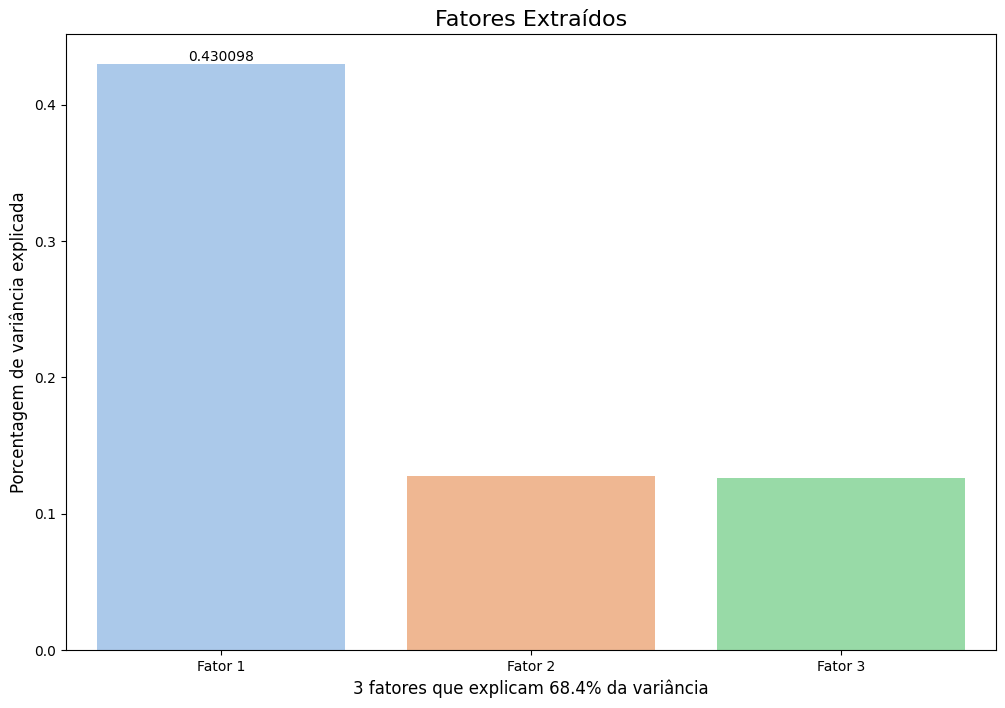

In [54]:
#%% Gráfico da variância acumulada dos componentes principais

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='pastel', hue=tabela_eigen.index)
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraídos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()


In [55]:
#%% Determinando as cargas fatoriais

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = casas_pca.columns

print(tabela_cargas)

                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.969318  0.000670  0.003416
house_size_sqm              0.967866 -0.000800  0.005045
no_of_rooms                 0.948705 -0.002536  0.002939
no_of_bathrooms             0.814810 -0.002453 -0.002870
distance_to_school         -0.013787  0.349991  0.642441
house_age                   0.007448  0.080374  0.692606
distance_to_supermarket_km -0.000987  0.720297 -0.113461
crime_rate_index            0.015520  0.610001 -0.325882


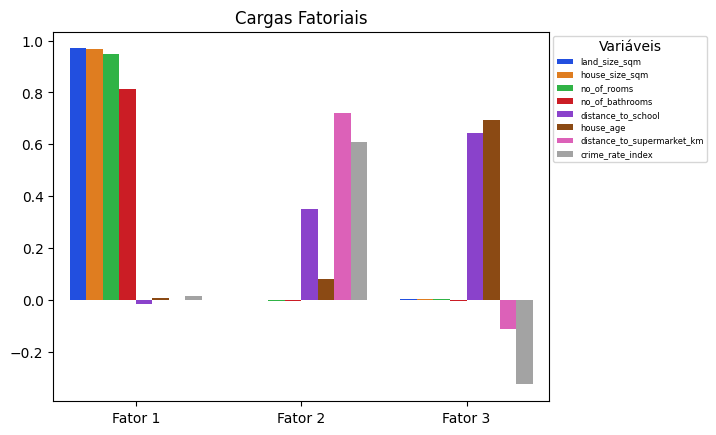

In [56]:
#%% Analisando as cargas fatoriais em cada fator extraído

tabela_cargas_graph = tabela_cargas.reset_index()
tabela_cargas_graph = tabela_cargas_graph.melt(id_vars='index')

sns.barplot(data=tabela_cargas_graph, x='variable', y='value', hue='index', palette='bright')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Cargas Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

### 2.4.6 - Determinando as comunalidades

In [57]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = casas_pca.columns

print(tabela_comunalidades)

                            Comunalidades
land_size_sqm                    0.939590
house_size_sqm                   0.936791
no_of_rooms                      0.900057
no_of_bathrooms                  0.663930
distance_to_school               0.535414
house_age                        0.486218
distance_to_supermarket_km       0.531702
crime_rate_index                 0.478541


Quanto menor a comunalidade, maior foi a perda de variância, ou seja, maior a perda de informações.

### 2.4.7 - Extração dos fatores para as observações

In [58]:
#%% Extração dos fatores para as observações do banco de dados

fatores = pd.DataFrame(fa.transform(casas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

casas_concat = pd.concat([casas.reset_index(drop=True), fatores], axis=1)
casas_concat

land_size_sqm  house_size_sqm  no_of_rooms  no_of_bathrooms  \
0               201             177            3                1   
1               196             182            4                3   
2               198             182            4                4   
3               178             166            2                3   
4               183             165            3                1   
...             ...             ...          ...              ...   
4949            297             261            4                4   
4950            302             282            4                2   
4951            153             147            3                4   
4952            180             158            2                1   
4953            695             619            8                6   

      distance_to_school  house_age  distance_to_supermarket_km  \
0                    3.3         10                         6.8   
1                    1.2         11                         4.1   
2                    5.9         20                         2.1   
3                    5.9          5                         0.7   
4                    3.8          8                         0.7   
...                  ...        ...                         ...   
4949                 2.9         20                         4.1   
4950                 3.8         12                         4.8   
4951                 3.3          7                         4.7   
4952                 2.2          1                         3.4   
4953                 0.4          5                         0.4   

      crime_rate_index  property_value   Fator 1   Fator 2   Fator 3  
0                 0.90          165432 -0.763931  0.409791 -0.005071  
1                 1.42          187043 -0.286895 -0.720208 -0.507750  
2                 4.12          148658 -0.132644  0.413418  1.559236  
3                 4.36          123785 -0.734837 -0.181887 -0.025554  
4                 0.42          156470 -0.850848 -1.858475  0.369112  
...                ...             ...       ...       ...       ...  
4949              3.99          235882  0.378174  0.565149  0.528827  
4950              2.09          290995  0.149131  0.216979  0.269514  
4951              3.98          106428 -0.533601  0.683343 -0.789444  
4952              3.75          107579 -1.044735 -0.113250 -1.662989  
4953              4.64          537980  3.523850 -1.146633 -1.754357  

[4954 rows x 12 columns]

### 2.4.8 - Estudo dos scores fatoriais

In [ ]:
O score é o que gera a experessão.

In [59]:
#%% Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = casas_pca.columns

print(tabela_scores)

                             Fator 1   Fator 2   Fator 3
land_size_sqm               0.281714  0.000657  0.003377
house_size_sqm              0.281292 -0.000784  0.004987
no_of_rooms                 0.275723 -0.002487  0.002906
no_of_bathrooms             0.236809 -0.002405 -0.002837
distance_to_school         -0.004007  0.343163  0.635100
house_age                   0.002165  0.078806  0.684691
distance_to_supermarket_km -0.000287  0.706245 -0.112164
crime_rate_index            0.004510  0.598101 -0.322158


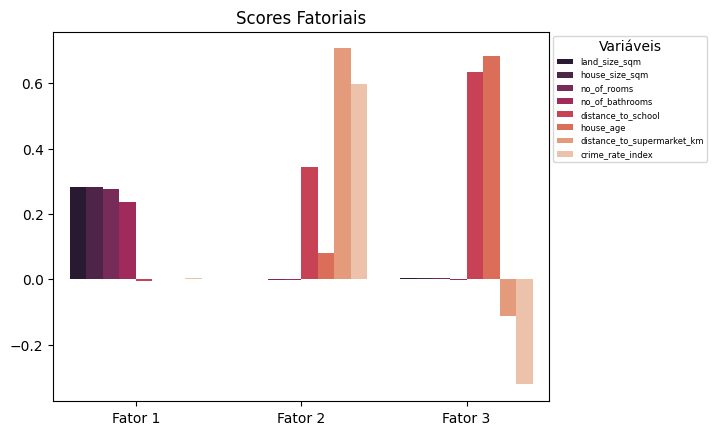

In [60]:
#%% Analisando os scores fatoriais em cada fator extraído

tabela_scores_graph = tabela_scores.reset_index()
tabela_scores_graph = tabela_scores_graph.melt(id_vars='index')

sns.barplot(data=tabela_scores_graph, x='variable', y='value', hue='index', palette='rocket')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()

In [65]:
#%% Vamos consolidar os 3 fatores em uma medida única (soma ponderada)

casas_concat['Ranking'] = 0

for index, item in enumerate(list(tabela_eigen.index)):
    variancia = tabela_eigen.loc[item]['Variância']

    casas_concat['Ranking'] = casas_concat['Ranking'] + casas_concat[tabela_eigen.index[index]]*variancia
casas_concat

land_size_sqm  house_size_sqm  no_of_rooms  no_of_bathrooms  \
0               201             177            3                1   
1               196             182            4                3   
2               198             182            4                4   
3               178             166            2                3   
4               183             165            3                1   
...             ...             ...          ...              ...   
4949            297             261            4                4   
4950            302             282            4                2   
4951            153             147            3                4   
4952            180             158            2                1   
4953            695             619            8                6   

      distance_to_school  house_age  distance_to_supermarket_km  \
0                    3.3         10                         6.8   
1                    1.2         11                         4.1   
2                    5.9         20                         2.1   
3                    5.9          5                         0.7   
4                    3.8          8                         0.7   
...                  ...        ...                         ...   
4949                 2.9         20                         4.1   
4950                 3.8         12                         4.8   
4951                 3.3          7                         4.7   
4952                 2.2          1                         3.4   
4953                 0.4          5                         0.4   

      crime_rate_index  property_value   Fator 1   Fator 2   Fator 3   Ranking  
0                 0.90          165432 -0.763931  0.409791 -0.005071 -0.276964  
1                 1.42          187043 -0.286895 -0.720208 -0.507750 -0.279412  
2                 4.12          148658 -0.132644  0.413418  1.559236  0.192813  
3                 4.36          123785 -0.734837 -0.181887 -0.025554 -0.342472  
4                 0.42          156470 -0.850848 -1.858475  0.369112 -0.556207  
...                ...             ...       ...       ...       ...       ...  
4949              3.99          235882  0.378174  0.565149  0.528827  0.301569  
4950              2.09          290995  0.149131  0.216979  0.269514  0.125882  
4951              3.98          106428 -0.533601  0.683343 -0.789444 -0.242205  
4952              3.75          107579 -1.044735 -0.113250 -1.662989 -0.674053  
4953              4.64          537980  3.523850 -1.146633 -1.754357  1.147592  

[4954 rows x 13 columns]

In [67]:
pg.rcorr(casas_concat[['Ranking', 'property_value']], 
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

C:\Users\Lucas Rezende\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Ranking property_value
Ranking              -            ***
property_value  0.8494              -

## 2.5- Análise 3 - emprestimo_banco.xlsx

A tabela co

1. ID
2. Idade
3. Anos de experiência profissional
4. Renda anual em milhares de dólares
5. Quantidade de pessoas na família
6. Gasto médio mensal no cartão de crédito em milhares de dólares
7. Valor do financiamento imobiliário

### 2.5.1 - Preparando os dados

In [70]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import sympy as sy
import scipy as sp

In [71]:
#%% Importando o banco de dados

emprestimo = pd.read_excel("emprestimo_banco.xlsx")
# Fonte: adaptado de https://www.kaggle.com/datasets/itsmesunil/bank-loan-modelling
emprestimo[0:5]

ID  Age  Experience  Income  Family  CCAvg  Mortgage
0   1   25           1      49       4    1.6         0
1   2   45          19      34       3    1.5         0
2   3   39          15      11       1    1.0         0
3   4   35           9     100       1    2.7         0
4   5   35           8      45       4    1.0         0

In [75]:
#%% Separando somente as variáveis para a análise fatorial PCA

emprestimo_pca = emprestimo.drop(columns=['ID'])

In [76]:
emprestimo_pca.describe()

Age   Experience       Income       Family        CCAvg  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean     45.338400    20.119600    73.774200     2.396400     1.937913   
std      11.463166    11.440484    46.033729     1.147663     1.747666   
min      23.000000     0.000000     8.000000     1.000000     0.000000   
25%      35.000000    10.000000    39.000000     1.000000     0.700000   
50%      45.000000    20.000000    64.000000     2.000000     1.500000   
75%      55.000000    30.000000    98.000000     3.000000     2.500000   
max      67.000000    43.000000   224.000000     4.000000    10.000000   

          Mortgage  
count  5000.000000  
mean     56.498800  
std     101.713802  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%     101.000000  
max     635.000000

In [77]:
emprestimo_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Age         5000 non-null   int64  
 1   Experience  5000 non-null   int64  
 2   Income      5000 non-null   int64  
 3   Family      5000 non-null   int64  
 4   CCAvg       5000 non-null   float64
 5   Mortgage    5000 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 234.5 KB


### 2.5.2 - Gerando a Matriz de Correlações

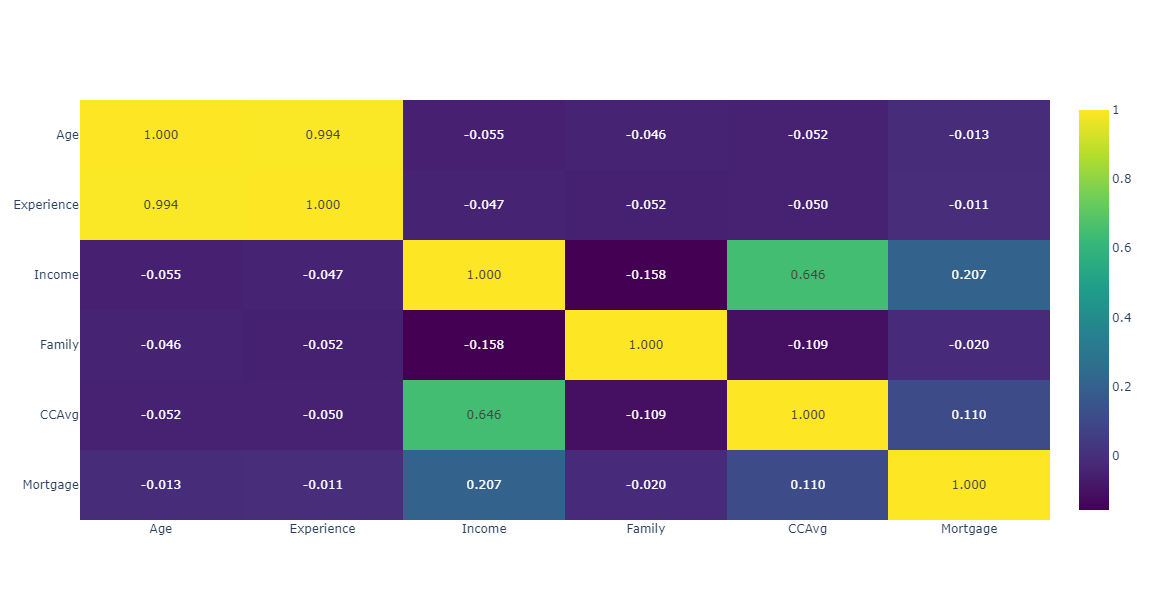

In [78]:
# Matriz de correlações em um objeto "simples"

corr = emprestimo_pca.corr()

# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.3f}',
        colorscale='viridis'))

fig.update_layout(
    height = 600,
    width = 600,
    yaxis=dict(autorange="reversed"))

fig.show()


### 2.5.3 -  Teste de esferecidade de Barlett

In [79]:
#%% Teste de Esfericidade de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(emprestimo_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 25409.78
p-valor: 0.0


Como o p-valor é menor que o nível de significância de 5%, podemos assumir que a matriz de correlações de Pearson é estatísticamente diferente da matriz identidade. Portanto podemos prosseguir com a análise PCA.

### 2.5.4 - Obtendo os autovalores

In [82]:
#%% Definindo a PCA (procedimento inicial com todos os fatores possíveis)

fa = FactorAnalyzer(n_factors=6, method='principal', rotation=None).fit(emprestimo_pca)

#%% Obtendo os eigenvalues (autovalores): resultantes da função FactorAnalyzer

autovalores = fa.get_eigenvalues()[0]

print(autovalores)

[2.02800719 1.73665956 0.97645432 0.90872121 0.34441264 0.00574507]


Utilizando o critério da raiz latente, usaremos apenas autovalores cujo valor seja maior do que 1.

In [84]:
#%% Definindo a PCA (procedimento inicial com todos os fatores possíveis)

fa = FactorAnalyzer(n_factors=2, method='principal', rotation=None).fit(emprestimo_pca)

#%% Obtendo os eigenvalues (autovalores): resultantes da função FactorAnalyzer

In [85]:
#%% Eigenvalues, variâncias e variâncias acumuladas

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   2.028007   0.338001             0.338001
Fator 2   1.736660   0.289443             0.627444


### 2.5.5 - Estudo dos fatores

In [86]:
#%% Determinando as cargas fatoriais

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = emprestimo_pca.columns

print(tabela_cargas)

             Fator 1   Fator 2
Age         0.959012  0.271073
Experience  0.957367  0.277678
Income     -0.301979  0.837176
Family     -0.011960 -0.344334
CCAvg      -0.295701  0.800263
Mortgage   -0.113918  0.355280


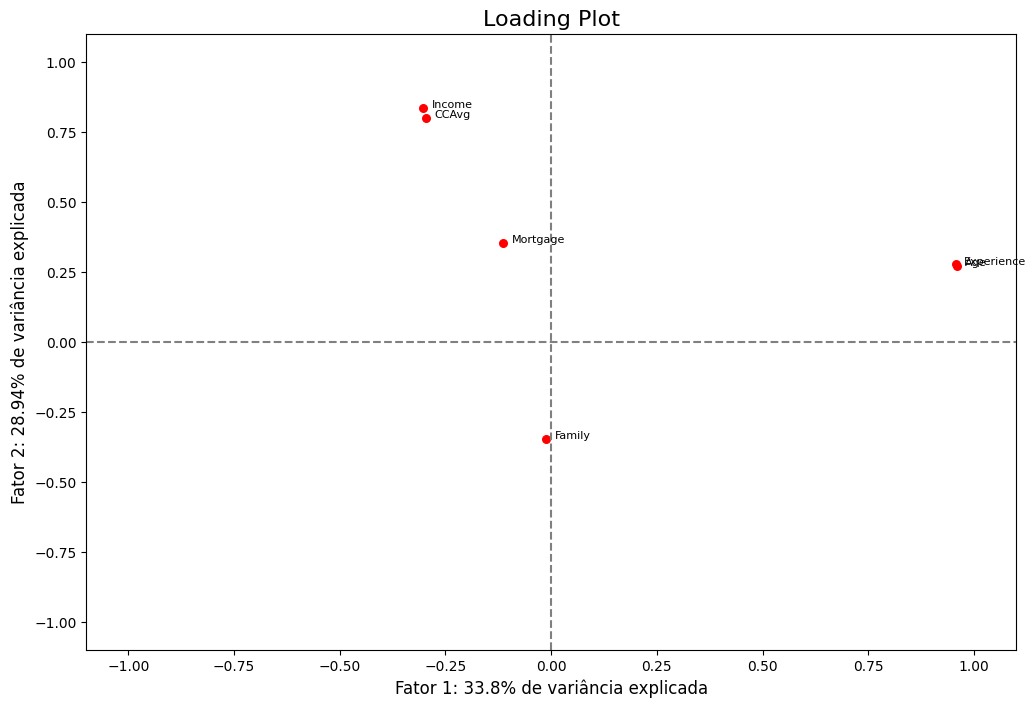

In [87]:
#%% Gráfico das cargas fatoriais (loading plot)

plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=30, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.02, point['y'], point['val'], fontsize=8)

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

### 2.5.6 - Determinando as comunalidades

In [88]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = emprestimo_pca.columns

print(tabela_comunalidades)

            Comunalidades
Age              0.993184
Experience       0.993658
Income           0.792054
Family           0.118709
CCAvg            0.727860
Mortgage         0.139201


Podemos ver que tivemos uma perda significativa em Family e Mortgage. Eles deveriam estar representados em algum fator que foi jogado fora.

### 2.5.7 - Extração dos fatores para as observações

In [93]:
#%% Extração dos fatores para as observações do banco de dados

fatores = pd.DataFrame(fa.transform(emprestimo_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]
fatores[0:10]

Fator 1   Fator 2
0 -1.496808 -1.283492
1  0.133147 -0.770224
2 -0.153059 -0.935006
3 -0.995452  0.307033
4 -0.732366 -1.249580
5 -0.427301 -1.166460
6  0.675549  0.021291
7  0.694993 -0.728797
8 -0.785217 -0.568101
9 -1.812830  2.766165

In [95]:
fatores.describe()

Fator 1       Fator 2
count  5.000000e+03  5.000000e+03
mean   5.009326e-17  1.101341e-16
std    1.000100e+00  1.000100e+00
min   -2.492071e+00 -1.990931e+00
25%   -8.144989e-01 -6.939527e-01
50%   -5.436479e-03 -2.006872e-01
75%    8.289246e-01  5.061580e-01
max    2.148814e+00  3.888456e+00

### 2.5.8 - Estudo dos scores fatoriais

In [94]:
#%% Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = emprestimo_pca.columns

print(tabela_scores)

             Fator 1   Fator 2
Age         0.472884  0.156089
Experience  0.472073  0.159892
Income     -0.148904  0.482061
Family     -0.005898 -0.198274
CCAvg      -0.145809  0.460806
Mortgage   -0.056173  0.204577


### 2.5.9 - Aplicando a rotação de fatores

In [ ]:
A rotação de fatores pode aumentar a carga fatorial em determinados fatores, em detrimento de outros.

In [96]:
#%% Em certos casos, a "rotação de fatores" pode melhorar a interpretação

# Analisando pelo loading plot, aplica-se a rotação dos eixos na origem (0,0)
# O método mais comum é a 'varimax', que é a rotação ortogonal dos fatores
# O objetivo é aumentar a carga fatorial em um fator e diminuir em outro
# Em resumo, trata-se de uma redistribuição de cargas fatoriais

#%% Adicionando a rotação: rotation='varimax'

# Aplicando a rotação aos 2 fatores extraídos

fa = FactorAnalyzer(n_factors=2, method='principal', rotation='varimax').fit(emprestimo_pca)


In [97]:

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   2.007323   0.334554             0.334554
Fator 2   1.757344   0.292891             0.627444


In [98]:
# Há a redistribuição da variância entre os fatores (mas o total é o mesmo!)

#%% Determinando as cargas fatoriais

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = emprestimo_pca.columns

print(tabela_cargas)

             Fator 1   Fator 2
Age         0.996570  0.005748
Experience  0.996745  0.012552
Income     -0.067999  0.887373
Family     -0.103275 -0.328699
CCAvg      -0.071784  0.850122
Mortgage   -0.015137  0.372790


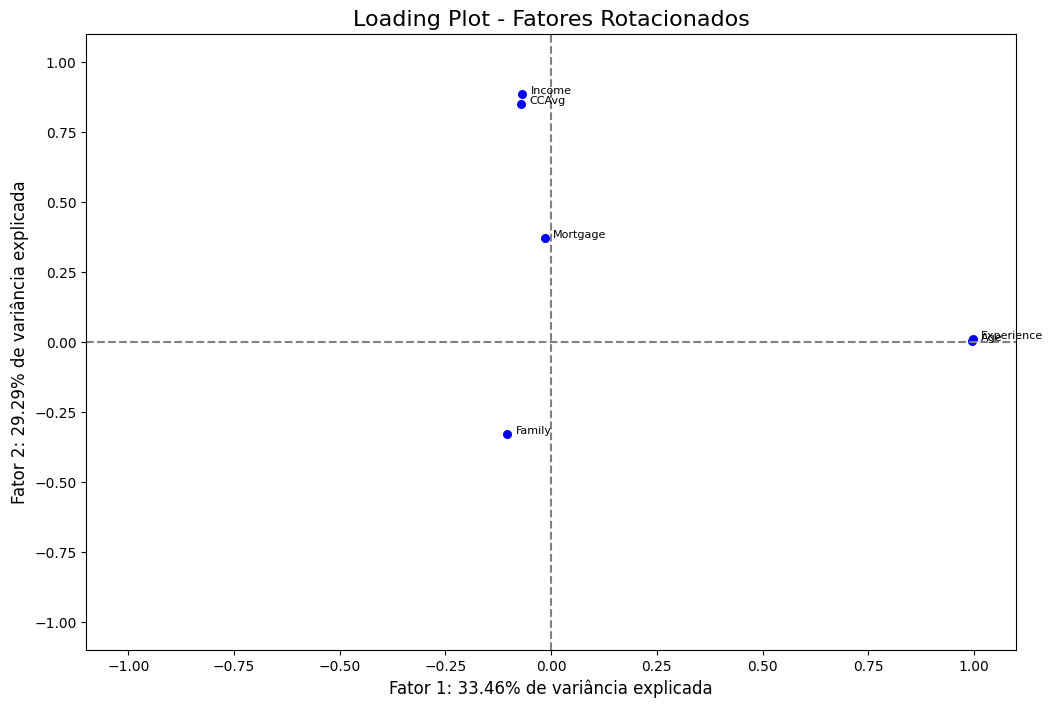

In [101]:
## As cargas são alteradas: cargas fatoriais rotacionadas

#%% Gráfico das cargas fatoriais (loading plot)

plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=30, color='blue')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.02, point['y'], point['val'], fontsize=8)

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot - Fatores Rotacionados", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()


Repare que os dados foram apenas rotacionados.

In [102]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = emprestimo_pca.columns

print(tabela_comunalidades)

## As comunalidades não mudam!

            Comunalidades
Age              0.993184
Experience       0.993658
Income           0.792054
Family           0.118709
CCAvg            0.727860
Mortgage         0.139201


In [105]:
#%% Extração dos fatores para as observações do banco de dados

fatores = pd.DataFrame(fa.transform(emprestimo_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

emprestimo_concat = pd.concat([emprestimo.reset_index(drop=True), fatores], axis=1)
emprestimo_concat


ID  Age  Experience  Income  Family  CCAvg  Mortgage   Fator 1  \
0        1   25           1      49       4    1.6         0 -1.784680   
1        2   45          19      34       3    1.5         0 -0.076890   
2        3   39          15      11       1    1.0         0 -0.396656   
3        4   35           9     100       1    2.7         0 -0.877657   
4        5   35           8      45       4    1.0         0 -1.038838   
...    ...  ...         ...     ...     ...    ...       ...       ...   
4995  4996   29           3      40       1    1.9         0 -1.371235   
4996  4997   30           4      15       4    0.4        85 -1.413575   
4997  4998   63          39      24       2    0.3         0  1.640653   
4998  4999   65          40      49       3    0.5         0  1.709728   
4999  5000   28           4      83       3    0.8         0 -1.476017   

       Fator 2  
0    -0.838273  
1    -0.777857  
2    -0.860423  
3     0.561169  
4    -1.009271  
...        ...  
4995 -0.344982  
4996 -1.347062  
4997 -0.966006  
4998 -0.795242  
4999 -0.507881  

[5000 rows x 9 columns]

In [106]:
#%% Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = emprestimo_pca.columns

print(tabela_scores)

             Fator 1   Fator 2
Age         0.497378  0.024448
Experience  0.497610  0.028330
Income     -0.015077  0.504309
Family     -0.058514 -0.189535
CCAvg      -0.017757  0.482998
Mortgage    0.000367  0.212148


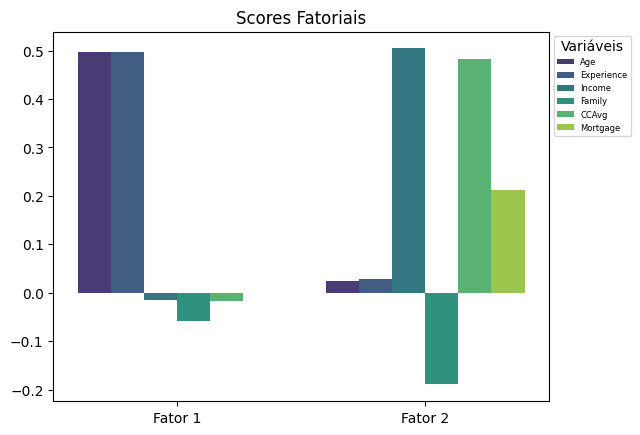

In [107]:
#%% Interpretando os scores fatoriais em cada fator extraído

tabela_scores_graph = tabela_scores.reset_index()
tabela_scores_graph = tabela_scores_graph.melt(id_vars='index')

sns.barplot(data=tabela_scores_graph, x='variable', y='value', hue='index', palette='viridis')
plt.legend(title='Variáveis', bbox_to_anchor=(1,1), fontsize = '6')
plt.title('Scores Fatoriais', fontsize='12')
plt.xlabel(xlabel=None)
plt.ylabel(ylabel=None)
plt.show()


In [109]:
#%% Os fatores continuam ortogonais

pg.rcorr(emprestimo_concat[['Fator 1', 'Fator 2']], 
         method = 'pearson', upper = 'pval', 
         decimals = 4, 
         pval_stars = {0.01: '***', 0.05: '**', 0.10: '*'})

C:\Users\Lucas Rezende\AppData\Local\Programs\Python\Python312\Lib\site-packages\pingouin\correlation.py:1116: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



Fator 1 Fator 2
Fator 1       -        
Fator 2     0.0       -

## 2.6 - Análise 4 - atlas_ambiental.xlsx

O banco de dados contém as seguintes variáveis:

1. Distritos
2. Renda média familiar
3. Quota média residência
4. Média de anos de estudo da população
5. Idade mediana do distrito
6. Taxa de mortalidade infantil para cada 1000 nascidos vivos
7. Taxa de crescimento populacional anual
8. Mortalidade por causas externas a cada 100 mil habitantes
9. Percentual da população que vive em favelas
10. Densidade populacional

### 2.6.1 - Preparando os dados

In [110]:
import pandas as pd
import numpy as np
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
import pingouin as pg
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go
import shapefile as shp

In [112]:
#%% Importando o banco de dados

atlas = pd.read_excel("atlas_ambiental.xlsx")
atlas[0:10]

cód_ibge          distritos  renda      quota  escolaridade  idade  \
0         1          Água Rasa   1961  34.619999           7.6     32   
1         2  Alto de Pinheiros   4180  75.959999           8.4     33   
2         3         Anhanguera   1093   4.500000           5.8     23   
3         4         Aricanduva   1311  21.020000           6.8     27   
4         5        Artur Alvim   1248  15.910000           7.0     27   
5         6        Barra Funda   2359  34.310001           8.0     31   
6         7         Bela Vista   2400  53.650002           8.4     32   
7         8              Belém   1813  31.990000           7.7     32   
8         9         Bom Retiro   1710  37.549999           7.7     30   
9        10               Brás   1942  28.969999           7.0     30   

   mortalidade    txcresc   causasext  favel     denspop  
0    13.860000  -1.840000   52.980000   0.00  125.610001  
1     8.680000  -2.520000   38.570000   0.69   57.560001  
2    15.360000  18.120001   22.680000   0.00    8.570000  
3    18.430000  -1.070000   76.220001   5.38  138.539993  
4    19.730000  -1.400000   67.250000   4.11  167.399994  
5     8.620000  -2.140000   37.900002   4.85   25.600000  
6    12.410000  -2.010000   59.860001   0.00  249.600006  
7    11.270000  -3.040000   78.940002   2.68   70.970001  
8    22.950001  -5.120000   75.839996   1.42   69.470001  
9    13.640000  -4.480000  120.669998   0.00   76.190002

In [118]:
# Estatísticas descritiva das variáveis

tab_desc = atlas.drop(columns=['cód_ibge']).describe()

In [114]:
atlas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cód_ibge      96 non-null     int64  
 1   distritos     96 non-null     object 
 2   renda         96 non-null     int64  
 3   quota         96 non-null     float64
 4   escolaridade  96 non-null     float64
 5   idade         96 non-null     int64  
 6   mortalidade   96 non-null     float64
 7   txcresc       96 non-null     float64
 8   causasext     96 non-null     float64
 9   favel         96 non-null     float64
 10  denspop       96 non-null     float64
dtypes: float64(7), int64(3), object(1)
memory usage: 8.4+ KB


Para podermos fazer a análise, precisamos deixar apenas as variáveis métricas no banco de dados.

In [119]:
atlas_pca = atlas.drop(columns=['cód_ibge', 'distritos'])

### 2.6.2 - Gerando a Matriz de Correlações

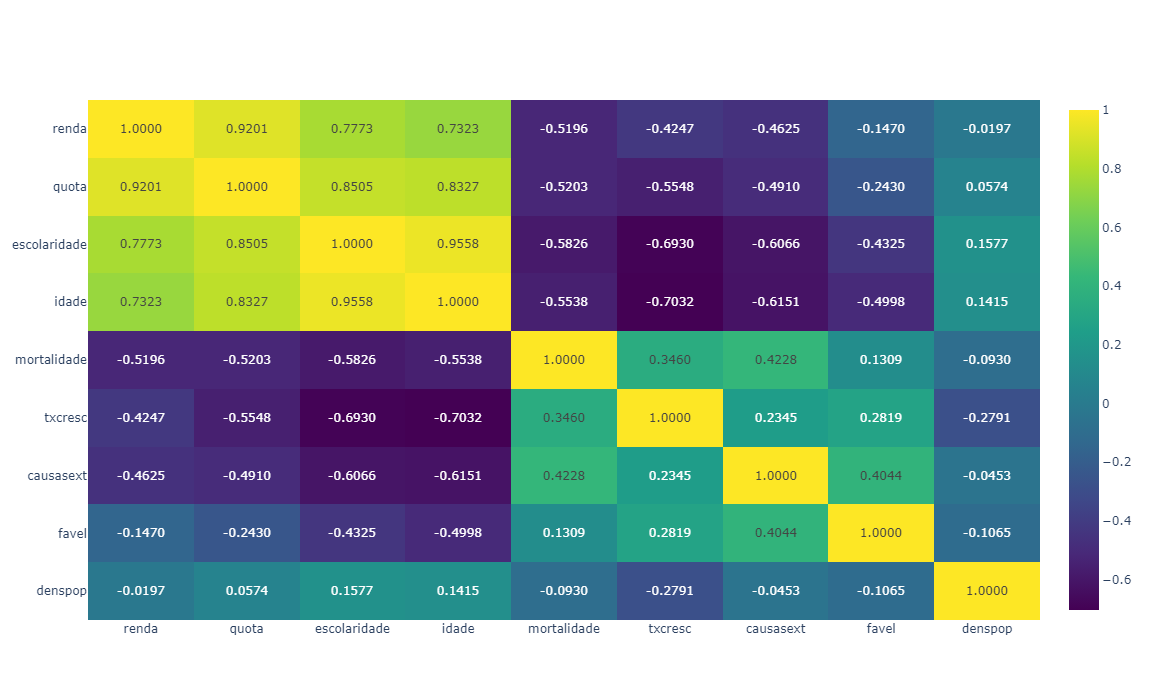

In [121]:
#%% Matriz de correlações entre as variáveis

corr = atlas_pca.corr()

# Gráfico interativo

fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.4f}',
        colorscale='viridis'))

fig.update_layout(
    height = 700,
    width = 700,
    yaxis=dict(autorange="reversed"))

fig.show()

### 2.6.3 - Teste de esferecidade de Bartlett

In [122]:
#%% Teste de Esfericidade de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(atlas_pca)

print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')


Qui² Bartlett: 748.16
p-valor: 0.0


Podemos prosseguir com a análise pois p-valor < nível de significância (5%)

### 2.6.4 - Determinando os autovalores

In [123]:
#%% Definindo a PCA (procedimento inicial com todos os fatores possíveis)

fa = FactorAnalyzer(n_factors=9, method='principal', rotation=None).fit(atlas_pca)

#%% Obtendo os eigenvalues (autovalores)

autovalores = fa.get_eigenvalues()[0]

print(autovalores)

[4.95603069 1.16433814 0.99635412 0.72406663 0.52930223 0.39832415
 0.12966871 0.06506649 0.03684884]


Segundo o critério da raiz latente, ficaremos apenas com os dois primeiros autovalores.

In [125]:
#%% Parametrizando a PCA para os fatores derivados de autovalores > 1

fa = FactorAnalyzer(n_factors=2, method='principal', rotation=None).fit(atlas_pca)

### 2.6.5 - Estudo dos fatores

In [126]:
#%% Eigenvalues, variâncias e variâncias acumuladas

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   4.956031   0.550670             0.550670
Fator 2   1.164338   0.129371             0.680041


C:\Users\Lucas Rezende\AppData\Local\Temp\ipykernel_10264\938296149.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




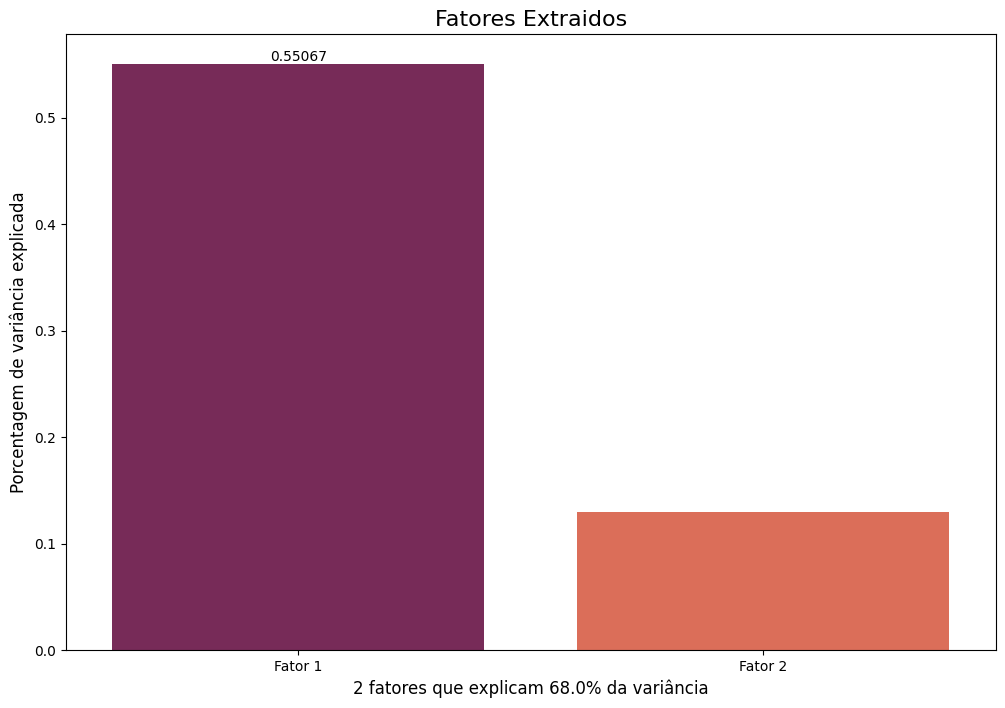

In [127]:
#%% Gráfico da variância acumulada dos componentes principais

plt.figure(figsize=(12,8))
ax = sns.barplot(x=tabela_eigen.index, y=tabela_eigen['Variância'], data=tabela_eigen, palette='rocket')
ax.bar_label(ax.containers[0])
plt.title("Fatores Extraidos", fontsize=16)
plt.xlabel(f"{tabela_eigen.shape[0]} fatores que explicam {round(tabela_eigen['Variância'].sum()*100,2)}% da variância", fontsize=12)
plt.ylabel("Porcentagem de variância explicada", fontsize=12)
plt.show()

In [128]:
#%% Determinando as cargas fatoriais

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = atlas_pca.columns

print(tabela_cargas)

               Fator 1   Fator 2
renda         0.832127  0.368971
quota         0.900606  0.226453
escolaridade  0.966543 -0.024594
idade         0.960135 -0.065447
mortalidade  -0.655699 -0.176634
txcresc      -0.696781  0.337446
causasext    -0.666578 -0.043910
favel        -0.457185  0.442840
denspop       0.166281 -0.793048


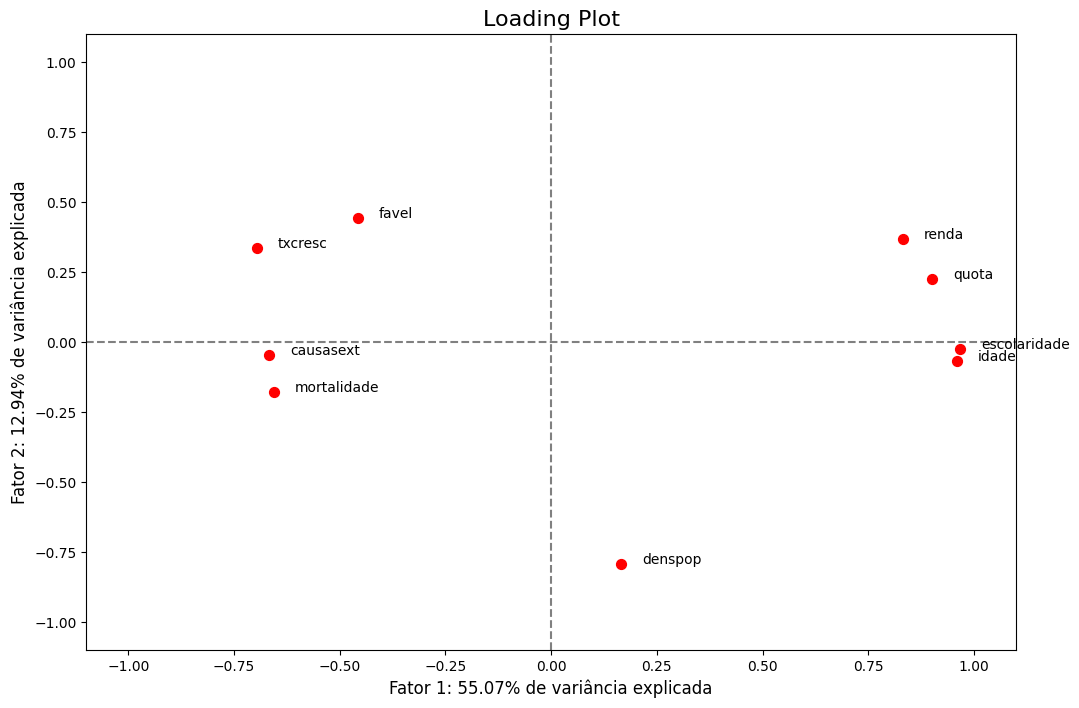

In [129]:
#%% Gráfico das cargas fatoriais (loading plot)

plt.figure(figsize=(12,8))
tabela_cargas_chart = tabela_cargas.reset_index()
plt.scatter(tabela_cargas_chart['Fator 1'], tabela_cargas_chart['Fator 2'], s=50, color='red')

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.05, point['y'], point['val'])

label_point(x = tabela_cargas_chart['Fator 1'],
            y = tabela_cargas_chart['Fator 2'],
            val = tabela_cargas_chart['index'],
            ax = plt.gca()) 

plt.axhline(y=0, color='grey', ls='--')
plt.axvline(x=0, color='grey', ls='--')
plt.ylim([-1.1,1.1])
plt.xlim([-1.1,1.1])
plt.title("Loading Plot", fontsize=16)
plt.xlabel(f"Fator 1: {round(tabela_eigen.iloc[0]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.ylabel(f"Fator 2: {round(tabela_eigen.iloc[1]['Variância']*100,2)}% de variância explicada", fontsize=12)
plt.show()

In [135]:
df = pd.DataFrame({'A':[0,0,0], 'B':[1,1,1]})

df

A  B
0  0  1
1  0  1
2  0  1

### 2.6.6 - Determinando as comunalidades

In [136]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = atlas_pca.columns

print(tabela_comunalidades)

              Comunalidades
renda              0.828575
quota              0.862372
escolaridade       0.934811
idade              0.926143
mortalidade        0.461141
txcresc            0.599374
causasext          0.446254
favel              0.405126
denspop            0.656574


### 2.6.7 - Extração dos fatores para as observações

In [137]:
#%% Extração dos fatores para as observações do banco de dados

fatores = pd.DataFrame(fa.transform(atlas_pca))
fatores.columns =  [f"Fator {i+1}" for i, v in enumerate(fatores.columns)]

# Adicionando os fatores ao banco de dados

atlas = pd.concat([atlas.reset_index(drop=True), fatores], axis=1)

### 2.6.8 - Estudo dos scores fatoriais

In [139]:
#%% Identificando os scores fatoriais

scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = atlas_pca.columns

print(tabela_scores)

               Fator 1   Fator 2
renda         0.167902  0.316893
quota         0.181719  0.194491
escolaridade  0.195024 -0.021122
idade         0.193731 -0.056210
mortalidade  -0.132303 -0.151703
txcresc      -0.140593  0.289818
causasext    -0.134498 -0.037712
favel        -0.092248  0.380336
denspop       0.033551 -0.681115


### 2.6.9 - Finalizando a análise fatorial

In [146]:
#%% Considere que o primeiro fator seja adequado para o ranking de distritos

# Note que adotamos um critério distinto da "soma ponderada"

dados_mapa = atlas[['cód_ibge', 'distritos', 'Fator 1']].sort_values(by=['cód_ibge'], ascending = True).reset_index(drop=True)
dados_mapa

cód_ibge          distritos   Fator 1
0          1          Água Rasa  0.682371
1          2  Alto de Pinheiros  1.790304
2          3         Anhanguera -1.204379
3          4         Aricanduva -0.257928
4          5        Artur Alvim -0.205284
..       ...                ...       ...
91        92      Vila Medeiros -0.099947
92        93      Vila Prudente  0.292861
93        94         Vila Sônia  0.203269
94        95       São Domingos -0.117800
95        96            Lajeado -1.289226

[96 rows x 3 columns]

### 2.6.10 - Adequando a análise no mapa de São Paulo

Os dados são gerados lendo um aqrquivo shape file, que pode ser encontrado em:

http://dados.prefeitura.sp.gov.br/dataset/distritos

https://towardsdatascience.com/mapping-geograph-data-in-python-610a963d2d7f


In [147]:
#%% Importando o mapa da cidade de São Paulo

sf = shp.Reader("DEINFO_DISTRITO")

def read_shapefile(sf):
    fields = [x[0] for x in sf.fields][1:]
    records = [y[:] for y in sf.records()]
    shps = [s.points for s in sf.shapes()]
    df = pd.DataFrame(columns=fields, data=records)
    df = df.assign(coords=shps)
    return df

dist = read_shapefile(sf)

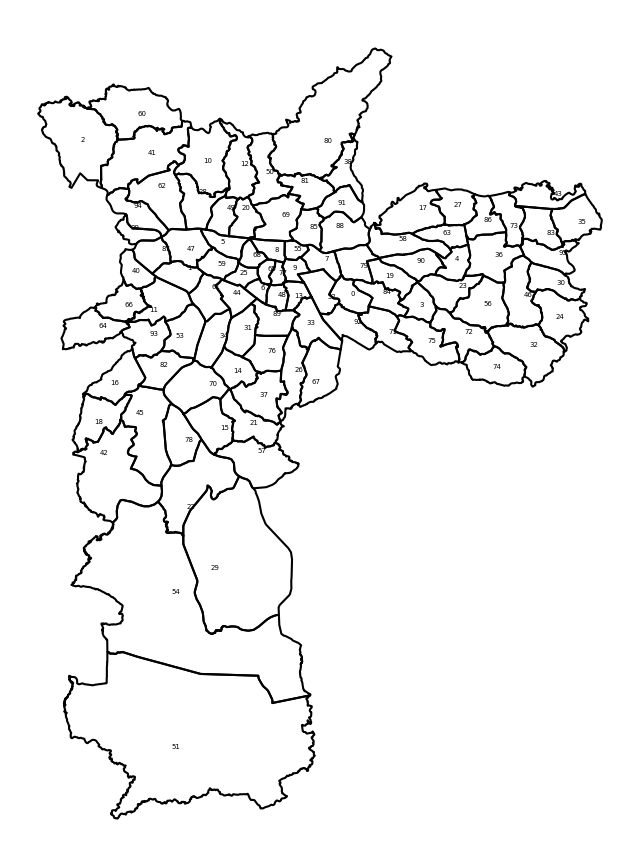

In [148]:
#%% Organizando o banco de dados das coordenadas

dist['COD_DIST'] = pd.to_numeric(dist['COD_DIST'])
dist = dist.sort_values(by=['COD_DIST'], ascending = True).reset_index(drop=True)

#%% Gerando o mapa da cidade de SP com distritos delimitados

def plot_map(df, x_lim = None, y_lim = None, figsize = (8,11)):
    
    plt.figure(figsize = figsize)
    id=0
    for coordinates in df.coords:
        x = [i[0] for i in coordinates]
        y = [i[1] for i in coordinates]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=5)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
        
    plt.axis('off')

plot_map(dist)

<Figure size 800x1100 with 0 Axes>

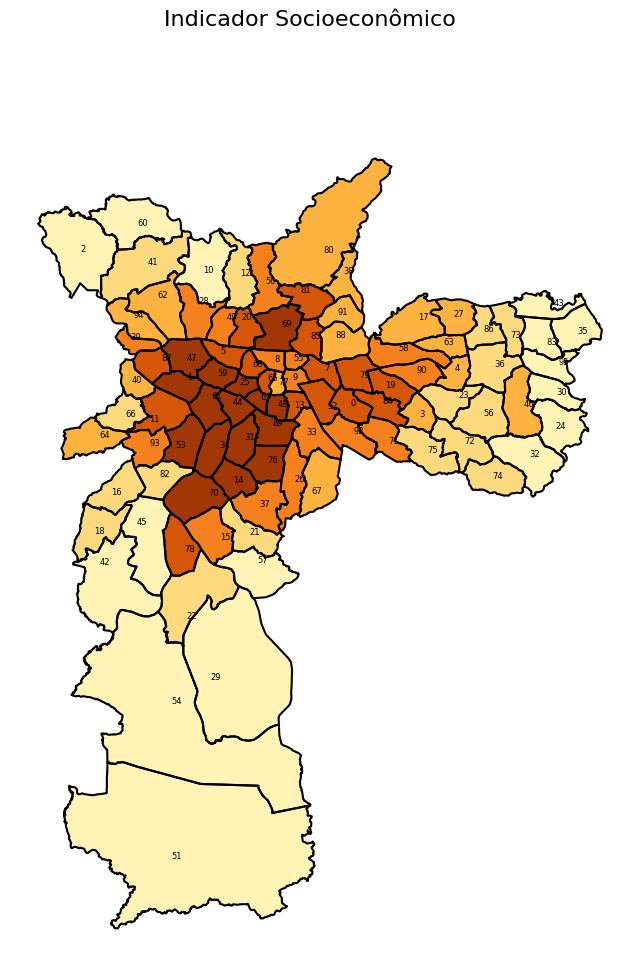

In [151]:
#%% Definindo as cores 

# Vamos dividir os valores do fator em 6 faixas

def calc_color(data):
        new_data = pd.qcut(data, 6, labels=list(range(6)))
        paleta = sns.color_palette('YlOrBr', n_colors=6)
        color_sq = paleta.as_hex()
        color_ton = []
        for val in new_data:
            color_ton.append(color_sq[val])
        return color_ton

#%% Plotando o mapa com as cores

def plot_map_fill_multiples_ids_3(df, title, distrito_id, color_ton, x_lim = None, y_lim = None, figsize = (8,11)):
    
    plt.figure(figsize = figsize)
    fig, ax = plt.subplots(figsize = figsize)
    fig.suptitle(title, fontsize=16)

    for coordinates in df.coords:
        x = [i[0] for i in coordinates]
        y = [i[1] for i in coordinates]
        plt.plot(x, y, 'k')
            
    for id in distrito_id:
        shape_ex = df.coords[id]
        x_lon = np.zeros((len(shape_ex),1))
        y_lat = np.zeros((len(shape_ex),1))
        for ip in range(len(shape_ex)):
            x_lon[ip] = shape_ex[ip][0]
            y_lat[ip] = shape_ex[ip][1]
        ax.fill(x_lon,y_lat,  color_ton[distrito_id.index(id)]);
        x0 = np.mean(x_lon)
        y0 = np.mean(y_lat)
        plt.text(x0, y0, id, fontsize=6)
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)
    
    plt.axis('off')
        
distritos = list(np.arange(96)) # id_distritos
data = list(dados_mapa['Fator 1']) # indicador socioeconômico (fator)
color_ton = calc_color(data) # tonalidade de cores
plot_map_fill_multiples_ids_3(dist, 'Indicador Socioeconômico', distritos, color_ton)

#%% Fim!

Os distritos com as cores mais escuras, são os distritos com os maiores rankings socioeconômicos.

# 3 - Unsupervised Machine Learning: Análise de Correspondência Simples e Múltipla

A análise de correspondência simples ou múltipla são técnicas adequadas para a análise de variáveis qualitativas. O objetivo é verificar se existe associação estatísticamente significativa entre as variáveis e suas categorias, criando o **mapa perceptual** para visualizar as associações. Trata-se de uma técnica exploratória (não supervisionada), logo, se novas observações forem adicionadas ao banco de dados, é adequado refazer a análise.

Podemos pensar na análise de correspondência como um processo de 3 etapas:

1. Avaliar se existe associação estatísticamente singnificativa ente as variáveis usando o teste chi quadrado;
2. Análise das categorias entre as variáveis;
3. Gerar o mapa perceptual das associações.

Caso no banco de dados exista uma variável quantitativa, ela precisa passar por um processo de categorização. Por exemplo, transformar idade que é uma variável quantitativa em categorias: Crianças, Adultos, Idosos.

**Obs**: Não é correto transformar uma variável quali para quanti, no entanto, podemos transformar uma variável quanti para quali.

**Análise de Correspondência Simples (ANACOR)**

É utilizada quando o objetivo é estudar a associação entre duas variáveis e suas categorias.

É possível separar a Anacor em duas partes:
1. Análise da significância estatística da associação entre as variáveis e suas categorias por meio do teste qui-quadrado (χ2)
2. Elaboração e interpretação do mapa perceptual

Para fazermos o teste qui-quadrado, precisamos:

* Fazer a tabela de contingência:

![](https://lh6.googleusercontent.com/proxy/g7OOZ8CU52zpouO7S8gweCoE_KWMt-EI1GoHFiELI0nzMYtDjrSyVd7LBQOJmoh9tbYwAxx6P6L3ZxFeyceFQ09SioiGaaelV7Ai4Gh5zxv_AqFFDz1X)

* Em seguida, criar a tabela de frequências absolutas
* A partir da frequência absoluta, criar a tabela de resíduos
* Tabela com os valores chi-quadrado
* Somar os valores de chi-quadrado e realizar a o teste de hipótese, onde a hipótese nula $H_0$ é que as variáveis de associam de forma aleatória.
* Caso o teste aponte que as variáveis estão associadas de forma significativa, então podemos prosseguir com a análise.

O teste chi-quadrado permite dizer apenas se há associação ou não entre as variáveis, mas a análise dos resíduos permite aprofundar a análise.

Se o valor do resíduo padronizado ajustado na célula for maior que 1,96, significa que o cruzamento entre as variáveis nesses pontos indica associação a um nível de significância de 5%.

Após o teste chi-quadrado, elaboramos o mapa perceptual. Para isso, devemos determinar os autovalores $\lambda^2$. A quantidade $m$ de autovalores, depende da quantidade de categorias nas variáveis: $m=min(l-1, j-1)$

Para interpretar o mapa perpeptual, devemos entender que variáveis muito próximas indicam que elas estão associadas.

## 3.1 - Implementação do método no Python

### 3.1.1 - Preparando os dados

In [4]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go

In [6]:
perfil = pd.read_excel("perfil_aplicacao.xlsx")
# Fonte: Fávero e Belfiore (2024, Capítulo 11)
perfil[0:10]

Estudante       Perfil Tipo de Aplicação
0     Gabriela  Conservador          Poupança
1  Luiz Felipe  Conservador          Poupança
2     Patrícia  Conservador          Poupança
3      Gustavo  Conservador          Poupança
4      Letícia  Conservador          Poupança
5       Ovídio  Conservador          Poupança
6       Leonor  Conservador          Poupança
7       Dalila  Conservador          Poupança
8      Antônio  Conservador               CDB
9        Júlia  Conservador               CDB

In [9]:
#%% Informações descritivas sobre as variáveis

print(perfil['Perfil'].value_counts(),'\n')
print(perfil['Tipo de Aplicação'].value_counts())

Perfil
Agressivo      58
Moderado       25
Conservador    17
Name: count, dtype: int64 

Tipo de Aplicação
Ações       45
CDB         40
Poupança    15
Name: count, dtype: int64


### 3.1.2 - Criando a tabela de frequências

In [10]:
#%% Criando a tabela de contingência

tabela = pd.crosstab(perfil["Perfil"], perfil["Tipo de Aplicação"])

print(tabela)

Tipo de Aplicação  Ações  CDB  Poupança
Perfil                                 
Agressivo             36   20         2
Conservador            5    4         8
Moderado               4   16         5


### 3.1.3 - Teste chi-quadrado

In [35]:
#%% Analisando a significância estatística da associação (teste qui²)

teste_qui2 = chi2_contingency(tabela)

print(f"estatística qui²: {round(teste_qui2[0], 2)}")
print(f"p-valor da estatística: {round(teste_qui2[1], 4)}")
print(f"graus de liberdade: {teste_qui2[2]}")

estatística qui²: 31.76
p-valor da estatística: 0.0
graus de liberdade: 4


### 3.1.4 - Análise dos resíduos provenientes da tabela de contingência

In [15]:

# Parametrizando a função
tab_cont = sm.stats.Table(tabela)

# Tabela de frequências absolutas esperadas
print(tab_cont.fittedvalues, '\n')

# Tabela de resíduos: diferença entre freq. absolutas observadas e esperadas
print(tabela - tab_cont.fittedvalues, '\n')

# Valores qui-quadrado por célula
print(tab_cont.chi2_contribs, '\n')

# Resíduos padronizados
print(tab_cont.resid_pearson, '\n')

# Resíduos padronizados ajustados
print(tab_cont.standardized_resids)

Tipo de Aplicação  Ações   CDB  Poupança
Perfil                                  
Agressivo          26.10  23.2      8.70
Conservador         7.65   6.8      2.55
Moderado           11.25  10.0      3.75 

Tipo de Aplicação  Ações  CDB  Poupança
Perfil                                 
Agressivo           9.90 -3.2     -6.70
Conservador        -2.65 -2.8      5.45
Moderado           -7.25  6.0      1.25 

Tipo de Aplicação     Ações       CDB   Poupança
Perfil                                          
Agressivo          3.755172  0.441379   5.159770
Conservador        0.917974  1.152941  11.648039
Moderado           4.672222  3.600000   0.416667 

Tipo de Aplicação     Ações       CDB  Poupança
Perfil                                         
Agressivo          1.937827 -0.664364 -2.271513
Conservador       -0.958110 -1.073751  3.412922
Moderado          -2.161532  1.897367  0.645497 

Tipo de Aplicação     Ações       CDB  Poupança
Perfil                                         
Agress

#### 3.1.4.1 - Mapa de calor dos resíduos padronizados ajusados

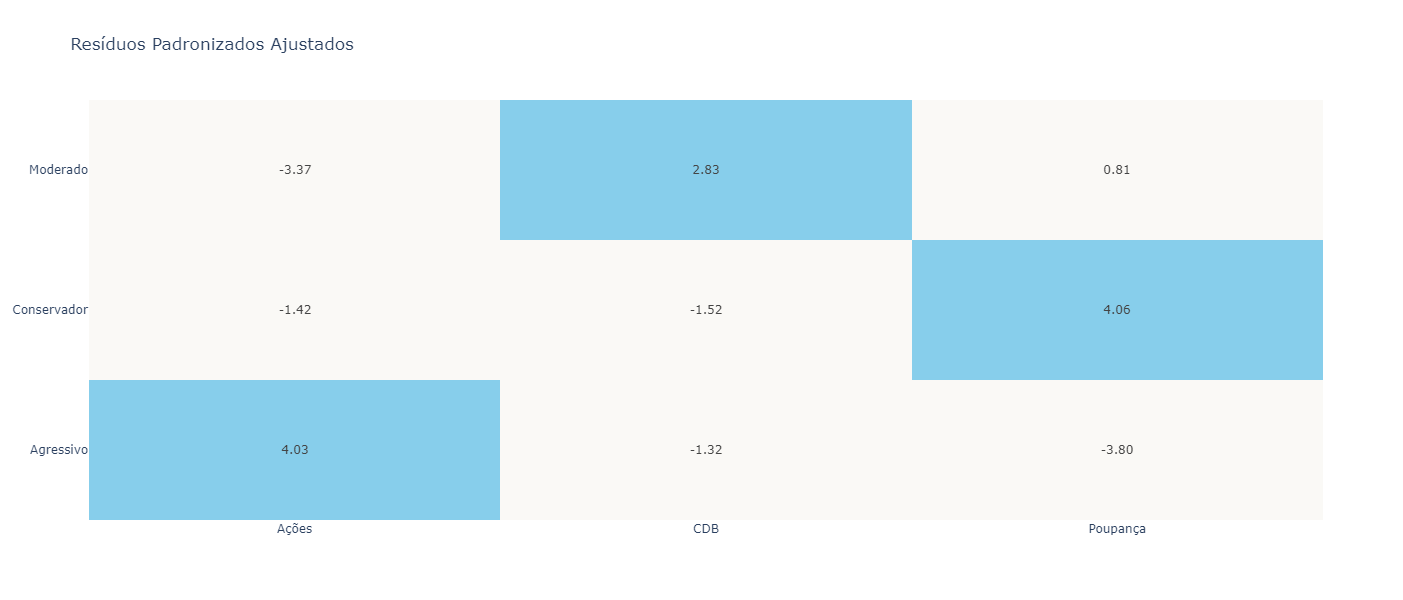

In [17]:

fig = go.Figure()

maxz = np.max(tab_cont.standardized_resids)+0.1
minz = np.min(tab_cont.standardized_resids)-0.1

colorscale = ['skyblue' if i>1.96 else '#FAF9F6' for i in np.arange(minz,maxz,0.01)]

fig.add_trace(
    go.Heatmap(
        x = tab_cont.standardized_resids.columns,
        y = tab_cont.standardized_resids.index,
        z = np.array(tab_cont.standardized_resids),
        text=tab_cont.standardized_resids.values,
        texttemplate='%{text:.2f}',
        showscale=False,
        colorscale=colorscale))

fig.update_layout(
    title='Resíduos Padronizados Ajustados',
    height = 600,
    width = 600)

fig.show()


### 3.1.5 - Elaborando a ANACOR

In [25]:
# Na função, o input é a tabela de contingência criada antes!

ca = prince.CA().fit(tabela)

In [26]:
#%% Obtendo os eigenvalues

tabela_autovalores = ca.eigenvalues_summary

print(tabela_autovalores)

# São gerados 'm' autovalores: m = mín(I-1,J-1)


          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.233        73.42%                     73.42%
1              0.084        26.58%                    100.00%


In [27]:
#%% Obtendo a inércia principal total

# É a soma dos eigenvalues (também é a divisão: estat. qui² / N)
# Quanto maior a inércia principal total, maior é a associação entre categorias

print(ca.total_inertia_)

0.3176416497633535


In [28]:
#%% Massas das categorias

# Massas da variável em linha
print(ca.row_masses_)

# Massas da variável em coluna
print(ca.col_masses_)

Agressivo      0.58
Conservador    0.17
Moderado       0.25
dtype: float64
Ações       0.45
CDB         0.40
Poupança    0.15
dtype: float64


In [29]:
#%% Autovetores

# Autovetor linha
print(ca.svd_.U)

# Autovetor coluna
print(ca.svd_.V.T)

[[-0.62491193 -0.17171219]
 [ 0.67162481 -0.61556487]
 [ 0.39800149  0.76915201]]
[[-0.56215025 -0.48372213]
 [ 0.09300977  0.76899232]
 [ 0.82178847 -0.41792789]]


In [30]:
#%% Obtendo as coordenadas do mapa perceptual

# Coordenadas da variável em linha
print(ca.row_coordinates(tabela))

# Coordenadas da variável em coluna
print(ca.column_coordinates(tabela))

                    0         1
Perfil                         
Agressivo   -0.396262 -0.065513
Conservador  0.786648 -0.433800
Moderado     0.384408  0.446974
                          0         1
Tipo de Aplicação                    
Ações             -0.404692 -0.209522
CDB                0.071019  0.353291
Poupança           1.024690 -0.313542


### 3.1.6 - Gerando o mapa perceptual

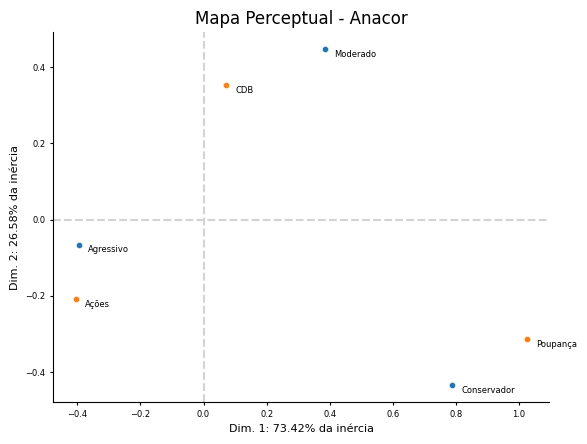

In [32]:
#%% Plotando o mapa percentual da Anacor

chart_df_row = pd.DataFrame({'var_row': tabela.index,
                             'x_row':ca.row_coordinates(tabela)[0].values,
                             'y_row': ca.row_coordinates(tabela)[1].values})

chart_df_col = pd.DataFrame({'var_col': tabela.columns,
                             'x_col':ca.column_coordinates(tabela)[0].values,
                             'y_col': ca.column_coordinates(tabela)[1].values})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=6)

label_point(x = chart_df_col['x_col'],
            y = chart_df_col['y_col'],
            val = chart_df_col['var_col'],
            ax = plt.gca())

label_point(x = chart_df_row['x_row'],
            y = chart_df_row['y_row'],
            val = chart_df_row['var_row'],
            ax = plt.gca()) 

sns.scatterplot(data=chart_df_row, x='x_row', y='y_row', s=20)
sns.scatterplot(data=chart_df_col, x='x_col', y='y_col', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--')
plt.axvline(x=0, color='lightgrey', ls='--')
plt.tick_params(size=2, labelsize=6)
plt.title("Mapa Perceptual - Anacor", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()

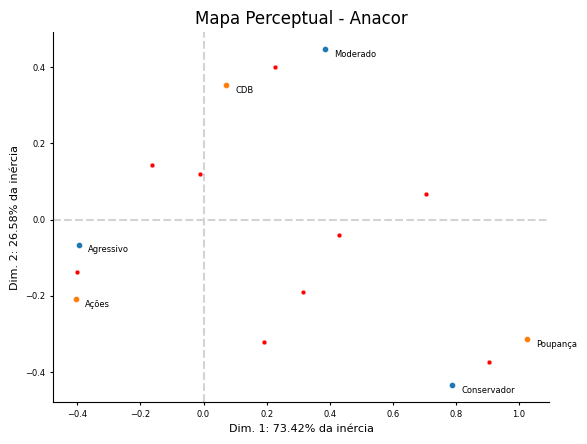

In [33]:
#%% Obtendo as coordenadas das observações

# Identificando as variáveis em linha e em coluna
coord_obs = perfil.rename(columns={'Perfil':'var_row',
                                   'Tipo de Aplicação':'var_col'})

# Unindo as coordenadas das categorias ao DataFrame
coord_obs = pd.merge(coord_obs, chart_df_row, how='left', on='var_row')
coord_obs = pd.merge(coord_obs, chart_df_col, how='left', on='var_col')

# Calculando as coordenadas médias das observações (média de suas categorias)
coord_obs['x_obs'] = coord_obs[['x_row','x_col']].mean(axis=1)
coord_obs['y_obs'] = coord_obs[['y_row','y_col']].mean(axis=1)

#%% Plotando o mapa percentual da Anacor

chart_df_row = pd.DataFrame({'var_row': tabela.index,
                             'x_row':ca.row_coordinates(tabela)[0].values,
                             'y_row': ca.row_coordinates(tabela)[1].values})

chart_df_col = pd.DataFrame({'var_col': tabela.columns,
                             'x_col':ca.column_coordinates(tabela)[0].values,
                             'y_col': ca.column_coordinates(tabela)[1].values})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=6)

label_point(x = chart_df_col['x_col'],
            y = chart_df_col['y_col'],
            val = chart_df_col['var_col'],
            ax = plt.gca())

label_point(x = chart_df_row['x_row'],
            y = chart_df_row['y_row'],
            val = chart_df_row['var_row'],
            ax = plt.gca()) 

sns.scatterplot(data=chart_df_row, x='x_row', y='y_row', s=20)
sns.scatterplot(data=chart_df_col, x='x_col', y='y_col', s=20)
sns.scatterplot(data=coord_obs, x='x_obs', y='y_obs', s=10, color='red')
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--')
plt.axvline(x=0, color='lightgrey', ls='--')
plt.tick_params(size=2, labelsize=6)
plt.title("Mapa Perceptual - Anacor", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()

## 3.2 - Análise de Correspondência Múltipla

A análise de correspondência simples, é aplicada em casos que temos apenas duas variáveis. Quando houver mais de duas variáveis, usamos a análise de correspondência múltipla. Para cada par de variáveis, vamos fazer o teste chi-quadrado. Só faremos a análise para os pares que tiverem associação estatísticamente significativa com pelo menos outra variável. Para isso, existem alguns métodos:

1. matriz binária Z -> coordenadas padrão

2. matriz de burt -> coordenadas principais
    * É definida como $B=Z^{'}.Z$

In [2]:
#%% Importando os pacotes necessários

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go


### 3.2.1 - Preparando os dados

In [3]:
# Importando o banco de dados

perfil_mca = pd.read_excel("perfil_aplicacao_civil.xlsx")
# Fonte: Fávero e Belfiore (2024, Capítulo 11)

perfil_mca[0:5]

estudante       perfil aplicacao estado.civil
0     Gabriela  Conservador  Poupanca       Casado
1  Luiz Felipe  Conservador  Poupanca       Casado
2     Patrícia  Conservador  Poupanca       Casado
3      Gustavo  Conservador  Poupanca     Solteiro
4      Letícia  Conservador  Poupanca       Casado

In [4]:
#%% Selecionando apenas as variáveis que farão parte da análise

dados_mca = perfil_mca.drop(columns=['estudante'])

dados_mca[0:5]

perfil aplicacao estado.civil
0  Conservador  Poupanca       Casado
1  Conservador  Poupanca       Casado
2  Conservador  Poupanca       Casado
3  Conservador  Poupanca     Solteiro
4  Conservador  Poupanca       Casado

In [5]:
#%% Informações descritivas sobre as variáveis

print(dados_mca['perfil'].value_counts())

perfil
Agressivo      58
Moderado       25
Conservador    17
Name: count, dtype: int64


In [6]:
print(dados_mca['aplicacao'].value_counts())

aplicacao
Acoes       45
CDB         40
Poupanca    15
Name: count, dtype: int64


In [7]:
print(dados_mca['estado.civil'].value_counts())

estado.civil
Solteiro    57
Casado      43
Name: count, dtype: int64


### 3.2.2 - Criando a tabela de frequências

A análise de correspondência sempre vai ser iniciada a partir da tabela de contingência. Nesse caso, temos **mais de duas variáveis**, o que significa que devemos gerar mais de uma tabela de frequências.

In [8]:
tabela_mca_1 = pd.crosstab(dados_mca["perfil"], dados_mca["aplicacao"])
tabela_mca_2 = pd.crosstab(dados_mca["perfil"], dados_mca["estado.civil"])
tabela_mca_3 = pd.crosstab(dados_mca["aplicacao"], dados_mca["estado.civil"])

print(tabela_mca_1)

aplicacao    Acoes  CDB  Poupanca
perfil                           
Agressivo       36   20         2
Conservador      5    4         8
Moderado         4   16         5


In [9]:
print(tabela_mca_2)

estado.civil  Casado  Solteiro
perfil                        
Agressivo         17        41
Conservador       12         5
Moderado          14        11


In [10]:
print(tabela_mca_3)

estado.civil  Casado  Solteiro
aplicacao                     
Acoes              9        36
CDB               24        16
Poupanca          10         5


### 3.2.3 - Teste chi-quadrado

In [11]:
#%% Analisando a significância estatística das associações (teste qui²)

tab_1 = chi2_contingency(tabela_mca_1)

print("Associação Perfil x Aplicação")
print(f"estatística qui²: {round(tab_1[0], 2)}")
print(f"p-valor da estatística: {round(tab_1[1], 4)}")
print(f"graus de liberdade: {tab_1[2]}")

Associação Perfil x Aplicação
estatística qui²: 31.76
p-valor da estatística: 0.0
graus de liberdade: 4


In [12]:
tab_2 = chi2_contingency(tabela_mca_2)

print("Associação Perfil x Estado Civil")
print(f"estatística qui²: {round(tab_2[0], 2)}")
print(f"p-valor da estatística: {round(tab_2[1], 4)}")
print(f"graus de liberdade: {tab_2[2]}")

Associação Perfil x Estado Civil
estatística qui²: 11.44
p-valor da estatística: 0.0033
graus de liberdade: 2


In [14]:
tab_3 = chi2_contingency(tabela_mca_3)

print("Associação Aplicação x Estado Civil")
print(f"estatística qui²: {round(tab_3[0], 2)}")
print(f"p-valor da estatística: {round(tab_3[1], 4)}")
print(f"graus de liberdade: {tab_3[2]}")


Associação Aplicação x Estado Civil
estatística qui²: 17.86
p-valor da estatística: 0.0001
graus de liberdade: 2
Chi2ContingencyResult(statistic=17.856657146742826, pvalue=0.00013257943624182006, dof=2, expected_freq=array([[19.35, 25.65],
       [17.2 , 22.8 ],
       [ 6.45,  8.55]]))


Repare que o número de graus de liberdade é calculado como quantidade de categorias em linha -1 vezes a quantidade de categorias em colunas -1.

### 3.2.4 - Gerando a Análise de Correspondência Múltipla (MCA)

In [16]:
mca = prince.MCA(n_components=2).fit(dados_mca)

# Vamos parametrizar a MCA para duas dimensões (eixos X e Y no mapa perceptual)
# Note que o input é o próprio banco de dados com as variáveis categóricas


In [17]:
#%% Quantidade total de dimensões

# Quantidade de dimensões = qtde total de categorias - qtde de variáveis

# Quantidade total de categorias
mca.J_

8

In [18]:
# Quantidade de variáveis na análise
mca.K_

3

In [19]:
# Quantidade de dimensões
quant_dim = mca.J_ - mca.K_

In [20]:
# Resumo das informações
print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")


quantidade total de categorias: 8
quantidade de variáveis: 3
quantidade de dimensões: 5


---

**Output com fins didáticos**

In [21]:
#%% Visualizando as matrizes: binária e Burt

# Nota: esta célula não é requerida para a função, tem fins didáticos!

binaria = pd.get_dummies(dados_mca, columns=dados_mca.columns, dtype=float)

burt = np.matmul(np.transpose(binaria), binaria)

In [22]:
print(binaria)

    perfil_Agressivo  perfil_Conservador  perfil_Moderado  aplicacao_Acoes  \
0                0.0                 1.0              0.0              0.0   
1                0.0                 1.0              0.0              0.0   
2                0.0                 1.0              0.0              0.0   
3                0.0                 1.0              0.0              0.0   
4                0.0                 1.0              0.0              0.0   
..               ...                 ...              ...              ...   
95               1.0                 0.0              0.0              1.0   
96               1.0                 0.0              0.0              1.0   
97               1.0                 0.0              0.0              1.0   
98               1.0                 0.0              0.0              1.0   
99               1.0                 0.0              0.0              1.0   

    aplicacao_CDB  aplicacao_Poupanca  estado.civil_Casado  \
0

In [23]:
print(burt)

                       perfil_Agressivo  perfil_Conservador  perfil_Moderado  \
perfil_Agressivo                   58.0                 0.0              0.0   
perfil_Conservador                  0.0                17.0              0.0   
perfil_Moderado                     0.0                 0.0             25.0   
aplicacao_Acoes                    36.0                 5.0              4.0   
aplicacao_CDB                      20.0                 4.0             16.0   
aplicacao_Poupanca                  2.0                 8.0              5.0   
estado.civil_Casado                17.0                12.0             14.0   
estado.civil_Solteiro              41.0                 5.0             11.0   

                       aplicacao_Acoes  aplicacao_CDB  aplicacao_Poupanca  \
perfil_Agressivo                  36.0           20.0                 2.0   
perfil_Conservador                 5.0            4.0                 8.0   
perfil_Moderado                    4.0          

---

In [ ]:
#%% Obtendo os eigenvalues

tabela_autovalores = mca.eigenvalues_summary

print(tabela_autovalores)

In [28]:
#%% Inércia principal total

# Soma de todos os autovalores (todas as dimensões existentes)

print(mca.total_inertia_)

1.6666666666666645


### 3.2.6 - Gerando o Mapa Perceptual - ANACOR

In [29]:
#%% Obtendo as coordenadas principais das categorias das variáveis

coord_burt = mca.column_coordinates(dados_mca)

print(coord_burt)

                              0         1
perfil_Agressivo      -0.653069 -0.014732
perfil_Conservador     1.129970  1.483614
perfil_Moderado        0.746741 -0.974679
aplicacao_Acoes       -0.831258  0.387515
aplicacao_CDB          0.417184 -0.935143
aplicacao_Poupanca     1.381285  1.331169
estado.civil_Casado    0.843172 -0.131145
estado.civil_Solteiro -0.636077  0.098934


In [30]:
#%% Obtendo as coordenadas-padrão das categorias das variáveis

coord_padrao = mca.column_coordinates(dados_mca)/np.sqrt(mca.eigenvalues_)

print(coord_padrao)

                              0         1
perfil_Agressivo      -0.841494 -0.022312
perfil_Conservador     1.455992  2.246900
perfil_Moderado        0.962193 -1.476129
aplicacao_Acoes       -1.071095  0.586883
aplicacao_CDB          0.537550 -1.416253
aplicacao_Poupanca     1.779816  2.016026
estado.civil_Casado    1.086446 -0.198617
estado.civil_Solteiro -0.819599  0.149834


Em termos práticos não há muito diferença na análise final entre usar as coordenadas pela matriz de burt ou pela matriz binária. Graficamente não haverá um impacto sifnificativo.

In [31]:
#%% Obtendo as coordenadas das observações do banco de dados

# Na função, as coordenadas das observações vêm das coordenadas-padrão

coord_obs = mca.row_coordinates(dados_mca)

print(coord_obs)

           0         1
0   1.440751  1.354770
1   1.440751  1.354770
2   1.440751  1.354770
3   0.805403  1.470920
4   1.440751  1.354770
..       ...       ...
95 -0.910729  0.238135
96 -0.910729  0.238135
97 -0.910729  0.238135
98 -0.910729  0.238135
99 -0.910729  0.238135

[100 rows x 2 columns]


In [33]:
chart_df_mca

categoria     obs_x     obs_y      variavel
0       perfil_Agressivo -0.841494 -0.022312        perfil
1     perfil_Conservador  1.455992  2.246900        perfil
2        perfil_Moderado  0.962193 -1.476129        perfil
3        aplicacao_Acoes -1.071095  0.586883     aplicacao
4          aplicacao_CDB  0.537550 -1.416253     aplicacao
5     aplicacao_Poupanca  1.779816  2.016026     aplicacao
6    estado.civil_Casado  1.086446 -0.198617  estado.civil
7  estado.civil_Solteiro -0.819599  0.149834  estado.civil

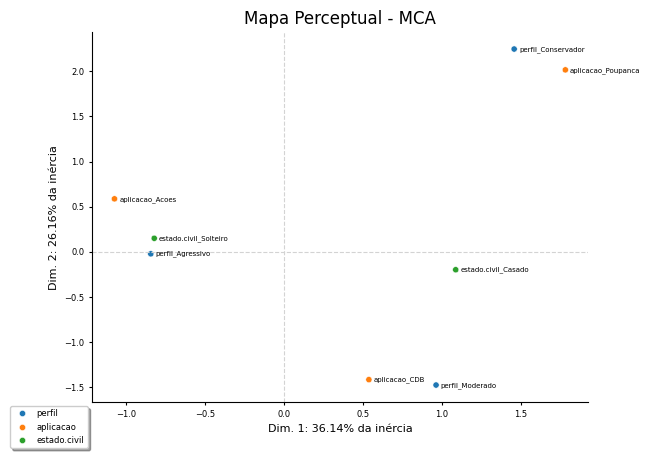

In [32]:
#%% Plotando o mapa perceptual (coordenadas-padrão)

chart = coord_padrao.reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])
# Nota: para a função acima ser executada adequadamente, não deixar underline no nome original da variável no dataset!

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=5)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(0,0), fancybox=True, shadow=True, fontsize = '6')
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()


### 3.2.7 - Conclusão

Podemos ver que o output da técnica é o mesmo da análise de correspondência simples, que é o mapa perceptual. No entanto, podemos ver que mais variáveis foram adicionadas no mapa. Vemos que solteiros tem um apetite maior por riscos, assim como uma leve inclinação dos casados a serem mais moderados.

## 3.3 - Análise: estudantes_adapta.csv

Estudo sobre a adaptação dos estudantes ao ensino online. As variáveis são: Tipo de educação, instituição, estado financeiro, acesso à internet, e a adaptabilidade. O objetivo é ver como as variáveis se associam num mapa perceptual.

### 3.3.1 - Preparando os dados

In [34]:

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go
from itertools import combinations

In [37]:
#%% Análise de Correspondência Múltipla (MCA)

# Importando o banco de dados

dados_mca = pd.read_csv("estudantes_adapta.csv")
dados_mca[0:5]
# Fonte: adaptado de https://www.kaggle.com/datasets/mdmahmudulhasansuzan/students-adaptability-level-in-online-education
# Suzan et al.(2021) Students' Adaptability Level Prediction in Online Education using Machine Learning Approaches - DOI: 10.1109/ICCCNT51525.2021.9579741

Education     Institution Financial     Internet Adaptivity
0  University  Non Government       Mid         Wifi   Moderate
1  University  Non Government       Mid  Mobile Data   Moderate
2     College      Government       Mid         Wifi   Moderate
3      School  Non Government       Mid  Mobile Data   Moderate
4      School  Non Government      Poor  Mobile Data        Low

In [39]:
print(f'Número de estudantes avaliados na análise: {len(dados_mca)}')

Número de estudantes avaliados na análise: 1205


In [ ]:
#%% Tabelas de frequências das variáveis

print(dados_mca['Education'].value_counts(),'\n')
print(dados_mca['Institution'].value_counts(),'\n')
print(dados_mca['Financial'].value_counts(),'\n')
print(dados_mca['Internet'].value_counts(),'\n')
print(dados_mca['Adaptivity'].value_counts(),'\n')

Education
School        530
University    456
College       219
Name: count, dtype: int64 

Institution
Non Government    823
Government        382
Name: count, dtype: int64 

Financial
Mid     878
Poor    242
Rich     85
Name: count, dtype: int64 

Internet
Mobile Data    695
Wifi           510
Name: count, dtype: int64 

Adaptivity
Moderate    625
Low         480
High        100
Name: count, dtype: int64 



Antes de prosseguir com a análise, vamos ver se existe associação estatísticamente significativa entre elas. Para diminuir o trabalho e não precisar fazer todas as associações possíveis, podemos escolher **uma variável de referência** para fazer a análise. Lembrando que podemos incluir na análise, todas as variáveis que possuam associam com **pelo menos uma outra variável**.

In [41]:
#%% Analisando as tabelas de contingência

# Vamos gerar as tabelas de contingência em relação à "Adaptivity"

tabela_mca_1 = pd.crosstab(dados_mca["Adaptivity"], dados_mca["Education"])
tabela_mca_2 = pd.crosstab(dados_mca["Adaptivity"], dados_mca["Institution"])
tabela_mca_3 = pd.crosstab(dados_mca["Adaptivity"], dados_mca["Financial"])
tabela_mca_4 = pd.crosstab(dados_mca["Adaptivity"], dados_mca["Internet"])

print(tabela_mca_1,'\n')
print(tabela_mca_2,'\n')
print(tabela_mca_3,'\n')
print(tabela_mca_4,'\n')


Education   College  School  University
Adaptivity                             
High              3      47          50
Low             120     182         178
Moderate         96     301         228 

Institution  Government  Non Government
Adaptivity                             
High                 20              80
Low                 234             246
Moderate            128             497 

Financial   Mid  Poor  Rich
Adaptivity                 
High         36    22    42
Low         341   129    10
Moderate    501    91    33 

Internet    Mobile Data  Wifi
Adaptivity                   
High                 36    64
Low                 288   192
Moderate            371   254 



### 3.3.2 - Análise do Chi²

In [43]:
#%% Analisando a significância estatística das associações (teste qui²)

tab_1 = chi2_contingency(tabela_mca_1)

print("Adaptivity x Education")
print(f"estatística qui²: {round(tab_1[0], 2)}")
print(f"p-valor da estatística: {round(tab_1[1], 4)}")
print(f"graus de liberdade: {tab_1[2]}")

Adaptivity x Education
estatística qui²: 38.69
p-valor da estatística: 0.0
graus de liberdade: 4


In [44]:
tab_2 = chi2_contingency(tabela_mca_2)

print("Adaptivity x Institution")
print(f"estatística qui²: {round(tab_2[0], 2)}")
print(f"p-valor da estatística: {round(tab_2[1], 4)}")
print(f"graus de liberdade: {tab_2[2]}")

Adaptivity x Institution
estatística qui²: 107.11
p-valor da estatística: 0.0
graus de liberdade: 2


In [45]:
tab_3 = chi2_contingency(tabela_mca_3)

print("Adaptivity x Financial")
print(f"estatística qui²: {round(tab_3[0], 2)}")
print(f"p-valor da estatística: {round(tab_3[1], 4)}")
print(f"graus de liberdade: {tab_3[2]}")

Adaptivity x Financial
estatística qui²: 236.86
p-valor da estatística: 0.0
graus de liberdade: 4


In [46]:
tab_4 = chi2_contingency(tabela_mca_4)

print("Adaptivity x Internet")
print(f"estatística qui²: {round(tab_4[0], 2)}")
print(f"p-valor da estatística: {round(tab_4[1], 4)}")
print(f"graus de liberdade: {tab_4[2]}")

Adaptivity x Internet
estatística qui²: 21.04
p-valor da estatística: 0.0
graus de liberdade: 2


### 3.3.3 - Elaborando a MCA

In [47]:

#%% Elaborando a MCA

mca = prince.MCA(n_components=3).fit(dados_mca)

# Vamos parametrizar a MCA para três dimensões
# O objetivo é criar um mapa perceptual 3D

#%% Quantidade total de dimensões

# Quantidade de dimensões = qtde total de categorias - qtde de variáveis

# Quantidade total de categorias
mca.J_

# Quantidade de variáveis na análise
mca.K_

# Quantidade de dimensões
quant_dim = mca.J_ - mca.K_

# Resumo das informações
print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")

quantidade total de categorias: 13
quantidade de variáveis: 5
quantidade de dimensões: 8


In [48]:
#%% Obtendo os eigenvalues

tabela_autovalores = mca.eigenvalues_summary

print(tabela_autovalores)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.321        20.06%                     20.06%
1              0.308        19.24%                     39.30%
2              0.258        16.10%                     55.40%


In [49]:
#%% Inércia principal total

# Soma de todos os autovalores (todas as dimensões existentes)

print(mca.total_inertia_)

1.5999999999999586


In [50]:
#%% Média da inércia principal total por dimensão

# É interessante plotar apenas dimensões com autovalores maiores do que a média

print(mca.total_inertia_/quant_dim)

0.19999999999999482


In [52]:
coord_burt = mca.column_coordinates(dados_mca)

print(coord_burt)

                                   0         1         2
Education_College          -1.266116  0.559165 -0.011469
Education_School            0.476726 -0.675321  0.099547
Education_University        0.053979  0.516366 -0.110193
Institution_Government     -0.846907  0.380226  0.692520
Institution_Non Government  0.393097 -0.176484 -0.321437
Financial_Mid              -0.262792  0.125889 -0.393927
Financial_Poor              0.245959 -1.023834  0.979460
Financial_Rich              2.014228  1.614552  1.280454
Internet_Mobile Data       -0.057200 -0.631284  0.212550
Internet_Wifi               0.077949  0.860279 -0.289652
Adaptivity_High             1.972304  1.324840  1.302384
Adaptivity_Low             -0.676083 -0.030830  0.654504
Adaptivity_Moderate         0.203663 -0.188297 -0.711041


In [53]:
#%% Obtendo as coordenadas-padrão das categorias das variáveis

coord_padrao = mca.column_coordinates(dados_mca)/np.sqrt(mca.eigenvalues_)

print(coord_padrao)

                                   0         1         2
Education_College          -2.234816  1.007914 -0.022596
Education_School            0.841467 -1.217289  0.196122
Education_University        0.095278  0.930767 -0.217097
Institution_Government     -1.494873  0.685371  1.364369
Institution_Non Government  0.693853 -0.318119 -0.633279
Financial_Mid              -0.463853  0.226920 -0.776095
Financial_Poor              0.434140 -1.845496  1.929683
Financial_Rich              3.555306  2.910286  2.522688
Internet_Mobile Data       -0.100964 -1.137912  0.418756
Internet_Wifi               0.137588  1.550684 -0.570658
Adaptivity_High             3.481307  2.388070  2.565894
Adaptivity_Low             -1.193351 -0.055573  1.289472
Adaptivity_Moderate         0.359485 -0.339411 -1.400858


In [54]:
#%% Obtendo as coordenadas das observações do banco de dados

# Na função, as coordenadas das observações vêm das coordenadas-padrão

coord_obs = mca.row_coordinates(dados_mca)

print(coord_obs)

             0         1         2
0     0.164470  0.410168 -0.719597
1     0.116760 -0.127551 -0.521715
2    -0.739294  0.626296 -0.281168
3     0.265998 -0.557162 -0.439071
4     0.135029 -0.914878  0.640151
...        ...       ...       ...
1200 -0.612116  0.482365 -0.142631
1201 -0.301548  0.425598 -0.680697
1202  0.265998 -0.557162 -0.439071
1203 -0.612116  0.482365 -0.142631
1204  0.445596 -0.971645  0.102085

[1205 rows x 3 columns]


### 3.3.4 - Plotando o mapa perceptual

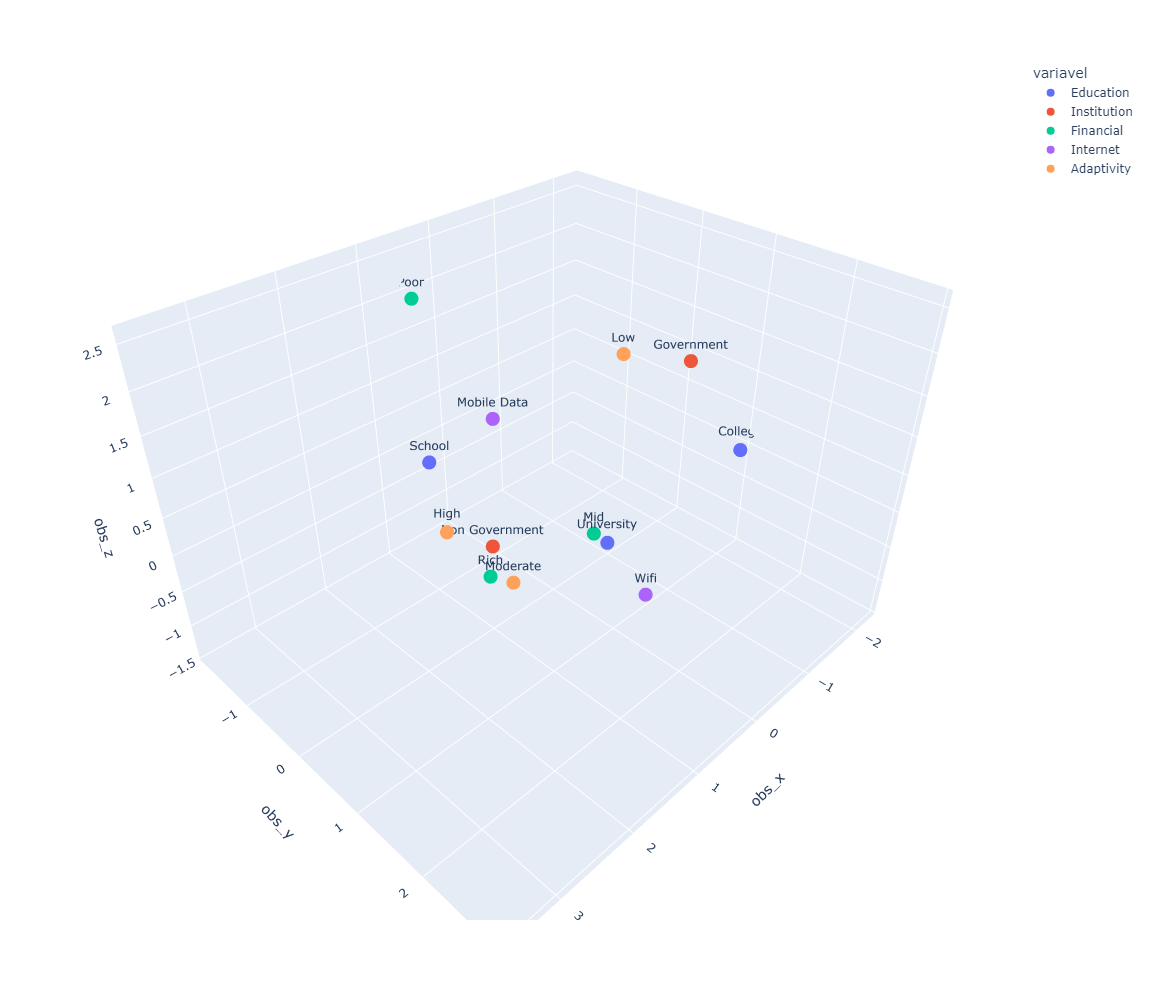

In [60]:

#%% Plotando o mapa perceptual (coordenadas-padrão)

# Primeiro passo: gerar um DataFrame detalhado

chart = coord_padrao.reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

nome_categ=[]
for col in dados_mca:
    nome_categ.append(dados_mca[col].sort_values(ascending=True).unique())
    categorias = pd.DataFrame(nome_categ).stack().reset_index()

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'obs_z': chart[2],
                             'variavel': var_chart,
                             'categoria_id': categorias[0]})

# Segundo passo: gerar o gráfico de pontos

fig = px.scatter_3d(chart_df_mca, 
                    x='obs_x', 
                    y='obs_y', 
                    z='obs_z',
                    color='variavel',
                    text=chart_df_mca.categoria_id)

fig.update_layout(
    width = 1000,
    height = 1000
)
fig.show()

## 3.4 - Análise: Gestão Likert

Estudo da variável do tipo escala likert. O banco de dados é um questionário feito ao longo de 3 anos sobre a satisfação em relação à gestão do atual prefeito.

**Objetivo**: Verificar se houve alteração da avaliação do público ao longo dos anos.

### 3.4.1 - Preparando os dados

In [62]:
#%% Importando os pacotes necessários

import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.graph_objects as go

#%% Análise de Correspondência Simples (ANACOR)

# Importando o banco de dados

gestao = pd.read_excel("gestao_municipal.xlsx")
# Fonte: Fávero e Belfiore (2024, Capítulo 11)

gestao[0:5]

avaliacao   ano
0    Concordo Totalmente  20X1
1    Concordo Totalmente  20X1
2    Concordo Totalmente  20X1
3  Concordo Parcialmente  20X1
4    Concordo Totalmente  20X1

In [68]:
gestao.avaliacao.value_counts()

avaliacao
Nem Concordo, Nem Discordo    2970
Concordo Parcialmente         2062
Discordo Parcialmente         2004
Discordo Totalmente            998
Concordo Totalmente            966
Name: count, dtype: int64

In [67]:
gestao.ano.value_counts()

ano
20X1    3000
20X2    3000
20X3    3000
Name: count, dtype: int64

Repare que o ano foi tratado como uma variável categórica.

### 3.4.2 - Criando a tablea de contingência

In [69]:
#%% Criando a tabela de contingência

tabela = pd.crosstab(gestao["avaliacao"], gestao["ano"])

print(tabela)

ano                         20X1  20X2  20X3
avaliacao                                   
Concordo Parcialmente       1066   996     0
Concordo Totalmente          966     0     0
Discordo Parcialmente          1   998  1005
Discordo Totalmente            0     1   997
Nem Concordo, Nem Discordo   967  1005   998


### 3.4.3 - Teste chi²

In [70]:

teste_qui2 = chi2_contingency(tabela)

print(f"estatística qui²: {round(teste_qui2[0], 2)}")
print(f"p-valor da estatística: {round(teste_qui2[1], 4)}")
print(f"graus de liberdade: {teste_qui2[2]}")

estatística qui²: 5956.44
p-valor da estatística: 0.0
graus de liberdade: 8


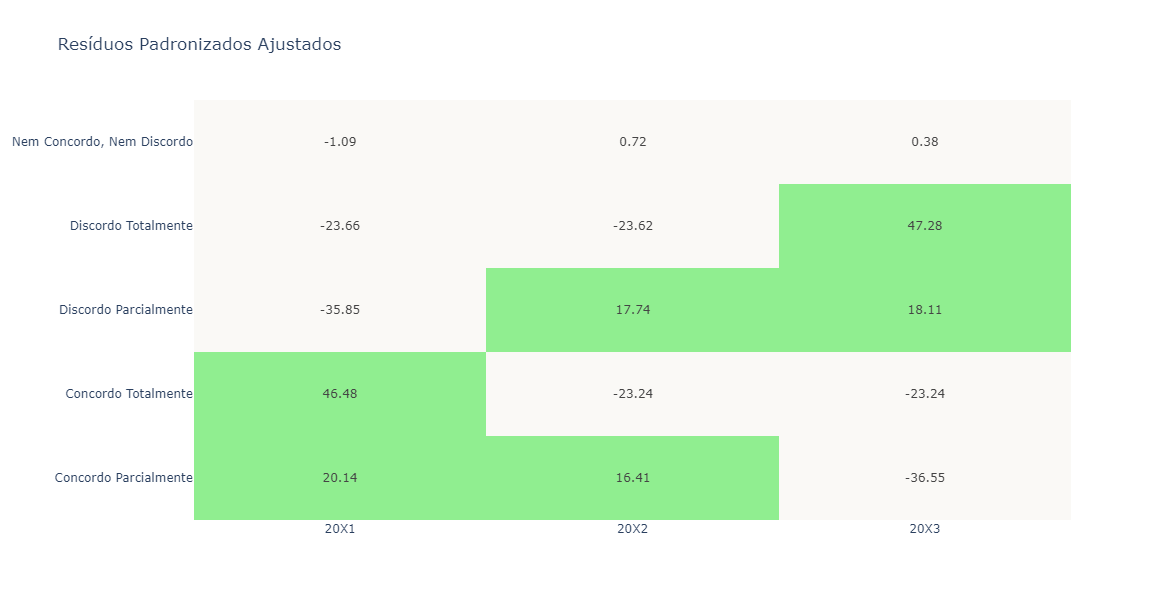

In [71]:
#%% Mapa de calor dos resíduos padronizados ajustados

# Tabela de contingência

tab_cont = sm.stats.Table(tabela)

# Gráfico dos resíduos padronizados ajustados

fig = go.Figure()

maxz = np.max(tab_cont.standardized_resids)+0.1
minz = np.min(tab_cont.standardized_resids)-0.1

colorscale = ['lightgreen' if i>1.96 else '#FAF9F6' for i in np.arange(minz,maxz,0.01)]

fig.add_trace(
    go.Heatmap(
        x = tab_cont.standardized_resids.columns,
        y = tab_cont.standardized_resids.index,
        z = np.array(tab_cont.standardized_resids),
        text=tab_cont.standardized_resids.values,
        texttemplate='%{text:.2f}',
        showscale=False,
        colorscale=colorscale))

fig.update_layout(
    title='Resíduos Padronizados Ajustados',
    height = 600,
    width = 600)

fig.show()


### 3.4.4 - Implementando a ANACOR

In [72]:
#%% Elaborando a ANACOR

# Na função, o input é a tabela de contingência criada antes!

ca = prince.CA().fit(tabela)

In [73]:
#%% Obtendo os eigenvalues

tabela_autovalores = ca.eigenvalues_summary

print(tabela_autovalores)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.503        75.96%                     75.96%
1              0.159        24.04%                    100.00%


In [74]:
# São gerados 'm' autovalores: m = mín(I-1,J-1)

#%% Obtendo a inércia principal total

# É a soma dos eigenvalues (também é a divisão: estat. qui² / N)
# Quanto maior a inércia principal total, maior é a associação entre categorias

print(ca.total_inertia_)

0.6618261885878851


### 3.4.5 - Plotando o mapa perceptual

In [77]:
#%% Obtendo as coordenadas do mapa perceptual

# Coordenadas da variável em linha
print(ca.row_coordinates(tabela))

# Coordenadas da variável em coluna
print(ca.column_coordinates(tabela))

                                   0         1
avaliacao                                     
Concordo Parcialmente      -0.634071 -0.315726
Concordo Totalmente        -1.222708  0.710623
Discordo Parcialmente       0.612588 -0.351081
Discordo Totalmente         1.225539  0.701462
Nem Concordo, Nem Discordo  0.012753 -0.010750
             0         1
ano                     
20X1 -0.866950  0.283437
20X2 -0.002882 -0.564066
20X3  0.869832  0.280629


                                   0         1
avaliacao                                     
Concordo Parcialmente      -0.634071 -0.315726
Concordo Totalmente        -1.222708  0.710623
Discordo Parcialmente       0.612588 -0.351081
Discordo Totalmente         1.225539  0.701462
Nem Concordo, Nem Discordo  0.012753 -0.010750
             0         1
ano                     
20X1 -0.866950  0.283437
20X2 -0.002882 -0.564066
20X3  0.869832  0.280629


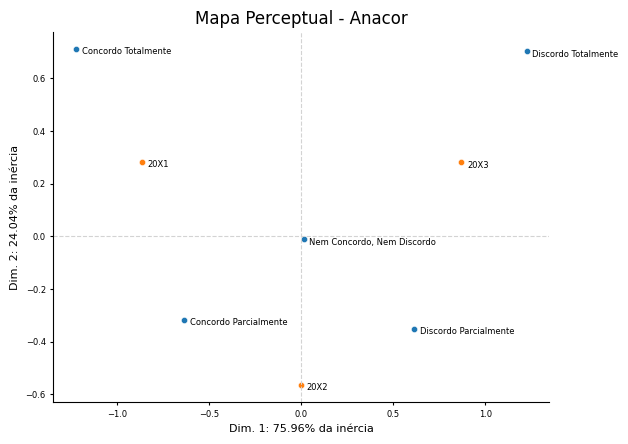

In [ ]:
#%% Plotando o mapa percentual da Anacor

chart_df_row = pd.DataFrame({'var_row': tabela.index,
                             'x_row':ca.row_coordinates(tabela)[0].values,
                             'y_row': ca.row_coordinates(tabela)[1].values})

chart_df_col = pd.DataFrame({'var_col': tabela.columns,
                             'x_col':ca.column_coordinates(tabela)[0].values,
                             'y_col': ca.column_coordinates(tabela)[1].values})

def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=6)

label_point(x = chart_df_col['x_col'],
            y = chart_df_col['y_col'],
            val = chart_df_col['var_col'],
            ax = plt.gca())

label_point(x = chart_df_row['x_row'],
            y = chart_df_row['y_row'],
            val = chart_df_row['var_row'],
            ax = plt.gca()) 

sns.scatterplot(data=chart_df_row, x='x_row', y='y_row', s=20)
sns.scatterplot(data=chart_df_col, x='x_col', y='y_col', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.title("Mapa Perceptual - Anacor", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()

In [76]:
#%% Obtendo as coordenadas das observações

# Identificando as variáveis em linha e em coluna
coord_obs = gestao.rename(columns={'avaliacao':'var_row',
                                   'ano':'var_col'})

# Unindo as coordenadas das categorias ao DataFrame
coord_obs = pd.merge(coord_obs, chart_df_row, how='left', on='var_row')
coord_obs = pd.merge(coord_obs, chart_df_col, how='left', on='var_col')

# Calculando as coordenadas médias das observações (média de suas categorias)
coord_obs['x_obs'] = coord_obs[['x_row','x_col']].mean(axis=1)
coord_obs['y_obs'] = coord_obs[['y_row','y_col']].mean(axis=1)

#%% FIM!

##  3.5 - Análise: Coração

Estudo sobre doenças do coração. As variáveis são: idade, sexo, dor no peito reportada, pressão sanguínea em descanso, colesterol, nível de açúcar no sangue, ecg em descanço, batimento cardíaco máximo, angina em exercício, e se a pessoa já apresentou doença cardíaca.

### 3.5.1 - Preparando os dados

In [2]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import prince

from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import plotly.graph_objects as go
from itertools import combinations

In [3]:
# Importando o banco de dados

dados_mca = pd.read_excel("dados_cor_acm.xlsx")
# Fonte: adaptado de https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

dados_mca[0:5]

idade       sexo      dor.peito  ps.descanco  colesterol acucar.sangue  \
0     40  Masculino        Atipica          140         289        Normal   
1     49   Feminino        Sem_Dor          160         180        Normal   
2     37  Masculino        Atipica          130         283        Normal   
3     48   Feminino  Assintomatico          138         214        Normal   
4     54  Masculino        Sem_Dor          150         195        Normal   

  ecg.descanco  bc.max angina.exerc doenca.card  
0       Normal     172          Nao         Nao  
1       Normal     156          Nao         Sim  
2   Anormal_ST      98          Nao         Nao  
3       Normal     108          Sim         Sim  
4       Normal     122          Nao         Nao

In [5]:
len(dados_mca) # número de pessoas

918

Para lidar com as variáveis métricas na análise, devemos categorizá-las para que consigamos utilizar a análise de correspondência múltipla.

In [6]:
#%% Analisando as variáveis

# Algumas variáveis do banco de dados são métricas
# Um procedimento aplicável a elas é a categorização

# Vamos categorizar utilizando um critério quantitativo

dados_mca['idade'] = pd.qcut(dados_mca['idade'], 3, labels=list(['menores_idades', 'idades_medias', 'maiores_idades']))
dados_mca['ps.descanco'] = pd.qcut(dados_mca['ps.descanco'], 3, labels=list(['ps_baixa', 'ps_media', 'ps_alta']))
dados_mca['colesterol'] = pd.qcut(dados_mca['colesterol'], 3, labels=list(['col_baixo', 'col_medio', 'col_alto']))
dados_mca['bc.max'] = pd.qcut(dados_mca['bc.max'], 3, labels=list(['bc_baixo', 'bc_medio', 'bc_alto']))

dados_mca[0:5]

idade       sexo      dor.peito ps.descanco colesterol  \
0  menores_idades  Masculino        Atipica    ps_media   col_alto   
1  menores_idades   Feminino        Sem_Dor     ps_alta  col_baixo   
2  menores_idades  Masculino        Atipica    ps_media   col_alto   
3  menores_idades   Feminino  Assintomatico    ps_media  col_medio   
4   idades_medias  Masculino        Sem_Dor     ps_alta  col_baixo   

  acucar.sangue ecg.descanco    bc.max angina.exerc doenca.card  
0        Normal       Normal   bc_alto          Nao         Nao  
1        Normal       Normal   bc_alto          Nao         Sim  
2        Normal   Anormal_ST  bc_baixo          Nao         Nao  
3        Normal       Normal  bc_baixo          Sim         Sim  
4        Normal       Normal  bc_baixo          Nao         Nao

Agora o banco de dados é 100% qualitativo

### 3.5.2 - Analisando as tabelas de contingência

In [84]:

#%% Analisando as tabelas de contingência

# A seguir, a função extrai todas as tabelas de contingência possíveis

for item in list(combinations(dados_mca.columns, 2)):
    print(item, "\n")
    tabela = pd.crosstab(dados_mca[item[0]], dados_mca[item[1]])
    
    print(tabela)
    
    chi2, pvalor, gl, freq_esp = chi2_contingency(tabela)

    print(f"estatística qui²: {round(chi2, 2)}")
    print(f"p-valor da estatística: {round(pvalor, 4)}", "\n")

('idade', 'sexo') 

sexo            Feminino  Masculino
idade                              
menores_idades        78        238
idades_medias         62        252
maiores_idades        53        235
estatística qui²: 4.05
p-valor da estatística: 0.132 

('idade', 'dor.peito') 

dor.peito       Assintomatico  Atipica  Sem_Dor  Tipica
idade                                                  
menores_idades            142       86       74      14
idades_medias             169       67       70       8
maiores_idades            185       20       59      24
estatística qui²: 55.77
p-valor da estatística: 0.0 

('idade', 'ps.descanco') 

ps.descanco     ps_baixa  ps_media  ps_alta
idade                                      
menores_idades       153       115       48
idades_medias         92       157       65
maiores_idades        62       119      107
estatística qui²: 74.48
p-valor da estatística: 0.0 

('idade', 'colesterol') 

colesterol      col_baixo  col_medio  col_alto
idade       

### 3.5.3 - Elaborando a MCA

In [85]:

#%% Elaborando a MCA

mca = prince.MCA(n_components=2).fit(dados_mca)

# Vamos parametrizar a MCA para duas dimensões

#%% Quantidade total de dimensões

# Quantidade de dimensões = qtde total de categorias - qtde de variáveis

# Quantidade total de categorias
mca.J_

# Quantidade de variáveis na análise
mca.K_

# Quantidade de dimensões
quant_dim = mca.J_ - mca.K_

# Resumo das informações
print(f"quantidade total de categorias: {mca.J_}")
print(f"quantidade de variáveis: {mca.K_}")
print(f"quantidade de dimensões: {quant_dim}")

quantidade total de categorias: 27
quantidade de variáveis: 10
quantidade de dimensões: 17


In [87]:
#%% Obtendo os eigenvalues

tabela_autovalores = mca.eigenvalues_summary

print(tabela_autovalores)

          eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.285        16.78%                     16.78%
1              0.138         8.14%                     24.92%


In [88]:
#%% Inércia principal total

# Soma de todos os autovalores (todas as dimensões existentes)

print(mca.total_inertia_)

1.6999999999999933


In [89]:
#%% Obtendo as coordenadas principais das categorias das variáveis

coord_burt = mca.column_coordinates(dados_mca)

print(coord_burt)

                                    0         1
idade_menores_idades         0.632520 -0.535146
idade_idades_medias         -0.064234 -0.000525
idade_maiores_idades        -0.623982  0.587747
sexo_Feminino                0.817785  0.576694
sexo_Masculino              -0.217700 -0.153520
dor.peito_Assintomatico     -0.603308 -0.123976
dor.peito_Atipica            1.111319 -0.169433
dor.peito_Sem_Dor            0.460685  0.122121
dor.peito_Tipica             0.292689  1.435071
ps.descanco_ps_baixa         0.321364 -0.647334
ps.descanco_ps_media         0.032316  0.142218
ps.descanco_ps_alta         -0.505884  0.650565
colesterol_col_baixo        -0.401161 -0.536761
colesterol_col_medio         0.326836 -0.115709
colesterol_col_alto          0.080658  0.659131
acucar.sangue_Diabetes      -0.693982  0.102009
acucar.sangue_Normal         0.210955 -0.031008
ecg.descanco_Anormal_ST     -0.566819 -0.001257
ecg.descanco_Hipertrofia_VE  0.034274  1.250853
ecg.descanco_Normal          0.171105 -0

In [90]:
#%% Obtendo as coordenadas-padrão das categorias das variáveis

coord_padrao = mca.column_coordinates(dados_mca)/np.sqrt(mca.eigenvalues_)

print(coord_padrao)

                                    0         1
idade_menores_idades         1.184300 -1.438342
idade_idades_medias         -0.120268 -0.001412
idade_maiores_idades        -1.168315  1.579720
sexo_Feminino                1.531181  1.550014
sexo_Masculino              -0.407611 -0.412625
dor.peito_Assintomatico     -1.129606 -0.333216
dor.peito_Atipica            2.080781 -0.455395
dor.peito_Sem_Dor            0.862565  0.328231
dor.peito_Tipica             0.548017  3.857123
ps.descanco_ps_baixa         0.601706 -1.739877
ps.descanco_ps_media         0.060508  0.382248
ps.descanco_ps_alta         -0.947193  1.748562
colesterol_col_baixo        -0.751115 -1.442684
colesterol_col_medio         0.611952 -0.310999
colesterol_col_alto          0.151020  1.771583
acucar.sangue_Diabetes      -1.299378  0.274175
acucar.sangue_Normal         0.394981 -0.083343
ecg.descanco_Anormal_ST     -1.061285 -0.003379
ecg.descanco_Hipertrofia_VE  0.064174  3.361990
ecg.descanco_Normal          0.320370 -1

In [91]:
#%% Obtendo as coordenadas das observações do banco de dados

# Na função, as coordenadas das observações vêm das coordenadas-padrão

coord_obs = mca.row_coordinates(dados_mca)

print(coord_obs)

            0         1
0    0.815386 -0.038617
1    0.398071  0.016939
2    0.368483 -0.046295
3   -0.128005 -0.210957
4    0.063387 -0.123090
..        ...       ...
913  0.243902  0.056739
914 -0.573661  0.002680
915 -0.588648 -0.376696
916  0.600893  0.509399
917  0.603350 -0.281681

[918 rows x 2 columns]


### 3.5.4 - Plotando o mapa perceptual

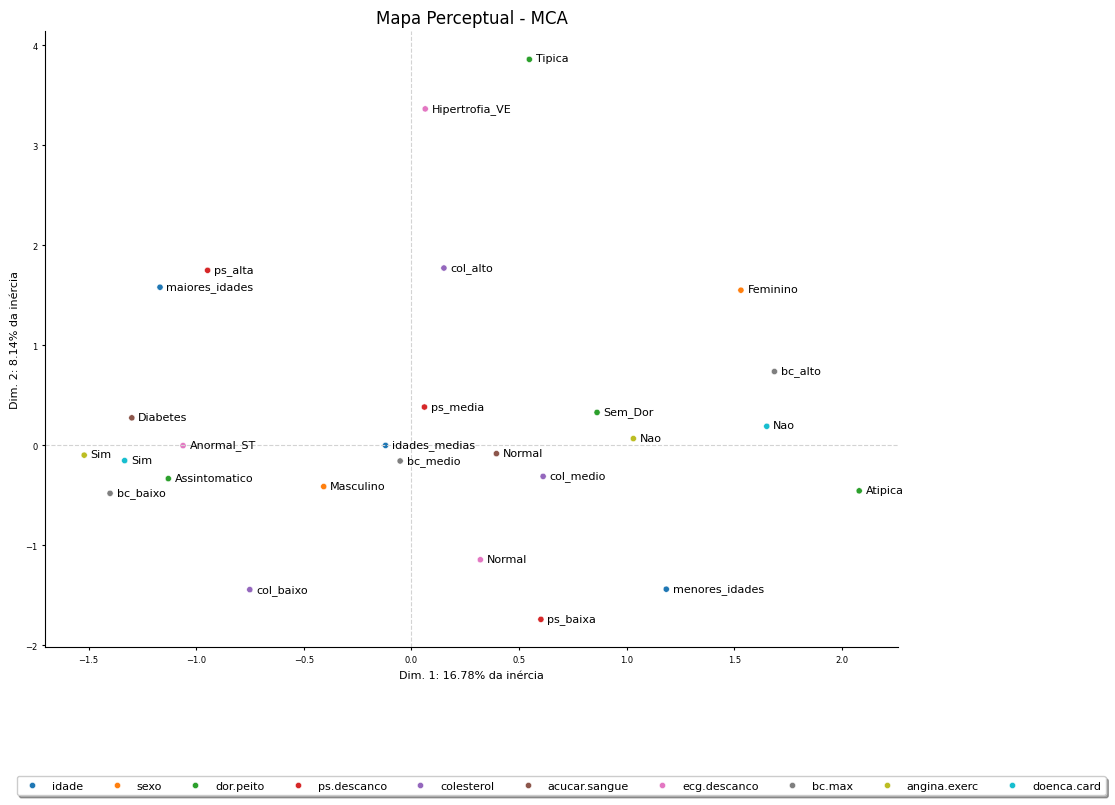

In [97]:
#%% Plotando o mapa perceptual (coordenadas-padrão)

# Primeiro passo: gerar um DataFrame detalhado
plt.figure(figsize=(11, 8))

chart = coord_padrao.reset_index()

nome_categ=[]
for col in dados_mca:
    nome_categ.append(dados_mca[col].sort_values(ascending=True).unique())
    categorias = pd.DataFrame(nome_categ).stack().reset_index()

var_chart = pd.Series(chart['index'].str.split('_', expand=True).iloc[:,0])

chart_df_mca = pd.DataFrame({'categoria': chart['index'],
                             'obs_x': chart[0],
                             'obs_y': chart[1],
                             'variavel': var_chart,
                             'categoria_id': categorias[0]})

# Segundo passo: gerar o gráfico de pontos
    
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'] + 0.03, point['y'] - 0.02, point['val'], fontsize=8)

label_point(x = chart_df_mca['obs_x'],
            y = chart_df_mca['obs_y'],
            val = chart_df_mca['categoria_id'],
            ax = plt.gca())

sns.scatterplot(data=chart_df_mca, x='obs_x', y='obs_y', hue='variavel', s=20)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.axhline(y=0, color='lightgrey', ls='--', linewidth=0.8)
plt.axvline(x=0, color='lightgrey', ls='--', linewidth=0.8)
plt.tick_params(size=2, labelsize=6)
plt.legend(bbox_to_anchor=(1.25,-0.2), fancybox=True, shadow=True, ncols=10, fontsize='8')
plt.title("Mapa Perceptual - MCA", fontsize=12)
plt.xlabel(f"Dim. 1: {tabela_autovalores.iloc[0,1]} da inércia", fontsize=8)
plt.ylabel(f"Dim. 2: {tabela_autovalores.iloc[1,1]} da inércia", fontsize=8)
plt.show()

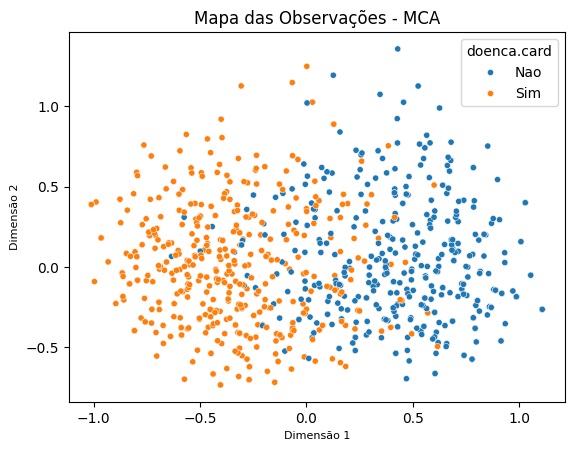

In [93]:
#%% Gráfico das observações

coord_obs['doenca.card'] = dados_mca['doenca.card']

sns.scatterplot(data=coord_obs, x=0, y=1, hue='doenca.card', s=20)
plt.title("Mapa das Observações - MCA", fontsize=12)
plt.xlabel("Dimensão 1", fontsize=8)
plt.ylabel("Dimensão 2", fontsize=8)
plt.show()


# 4 - Discutindo as técnicas de cluster

**Resumo das técnicas:**

- Clusterização - Agrupam as observações de uma base de dados.
- Análise Fatorial PCA - Agrupam as variáveis, contanto que sejam variáveis métricas.
- Análise de Correspondência (ANACOR) - Verificar se existe associação estatísticamente significativa entre as variáveis qualitativas e suas categorias. Também busca-se gerar o mapa perceptual para visualizar tais associações.

# 5 - Exercícios - Técnicas Não Supervisionadas

## 5.1 - Análise notas_pisa.csv

### 5.1.1 - Importando os dados

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pingouin as pg
import plotly.express as px 
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from scipy.stats import chi2_contingency
import statsmodels.api as sm
import plotly.graph_objects as go

In [45]:

pisa = pd.read_csv('notas_pisa.csv', delimiter=',')
# Fonte: https://pisadataexplorer.oecd.org/ide/idepisa/report.aspx
pisa[0:5]

country group    mathematics_2022        reading_2022  \
0  Australia  OECD  487.08425354734698  498.05093978372099   
1    Austria  OECD  487.26749908879401  480.40584721829902   
2    Belgium  OECD  489.48681680184899    478.852668384217   
3     Canada  OECD  496.94789438732198  507.13289582796602   
4      Chile  OECD  411.69657073076701  447.97895734953102   

         science_2022    mathematics_2018        reading_2018  \
0    507.000869417628  491.36002524732402  502.63172429646698   
1  491.27095877058503  498.94231377018502  484.39256846788697   
2  490.57834610681402  508.07030630262301  492.86443865136602   
3  515.01667592948297  512.01694292684499  520.08552094974402   
4  443.54340246277798  417.40655630857901  452.27255418349699   

         science_2018  
0  502.96456281136602  
1  489.78043922683503  
2  498.77312702853197  
3  517.99766085055001  
4  443.58256338022699

In [46]:
#%% Vamos analisar apenas as notas de 2022

pisa.drop(columns=['mathematics_2018', 'reading_2018', 'science_2018'], inplace=True)

In [47]:
#%% Ajustando as variáveis de notas para numéricas

pisa['mathematics_2022'] = pd.to_numeric(pisa['mathematics_2022'], errors='coerce')
# coerce': Converte valores que não podem ser convertidos para numérico em NaN.
pisa['reading_2022'] = pd.to_numeric(pisa['reading_2022'], errors='coerce')
pisa['science_2022'] = pd.to_numeric(pisa['science_2022'], errors='coerce')

In [48]:
#%% Note que há valores faltantes "nan", vamos remover

pisa.dropna(inplace=True)

### 5.1.2 - Iniciando a análise PCA

<Axes: >

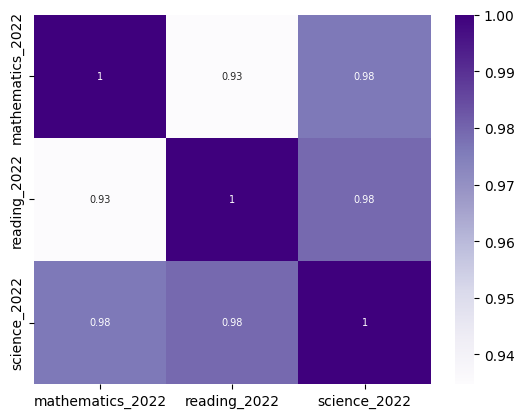

In [49]:

#%% Iniciando a análise fatorial PCA

pisa_pca = pisa.drop(columns=['country', 'group'])

#%% Análise gráfica das correlações de Pearson

matriz_corr = pisa_pca.corr()

sns.heatmap(matriz_corr, annot=True, 
            cmap = plt.cm.Purples,
            annot_kws={'size':7})

In [50]:
#%% Estatísticas descritivas

pisa_pca.describe()

mathematics_2022  reading_2022  science_2022
count         81.000000     81.000000     81.000000
mean         437.628559    435.037917    446.893945
std           58.219370     56.104751     55.724807
min          336.396041    328.842780    347.104162
25%          388.781607    386.284748    403.130242
50%          440.845309    438.440625    446.967114
75%          483.159455    480.405847    493.549319
max          574.663820    542.553322    561.433275

In [51]:
#%% Teste de Esfericidade de Bartlett

bartlett, p_value = calculate_bartlett_sphericity(pisa_pca)
print(f'Qui² Bartlett: {round(bartlett, 2)}')
print(f'p-valor: {round(p_value, 4)}')

Qui² Bartlett: 508.46
p-valor: 0.0


Como o p-valor é menor que 5%, a análise fatorial é aplicável.

### 5.1.3 - Definindo a PCA

In [52]:
#%% Definindo a PCA (procedimento inicial com todos os fatores possíveis)

fa = FactorAnalyzer(n_factors=3, method='principal', rotation=None).fit(pisa_pca)

In [53]:
#%% Obtendo todos os possíveis autovalores

autovalores = fa.get_eigenvalues()[0]
print(autovalores)

[2.92687872 0.06529156 0.00782972]


O percentual da variância compartilhada pelas variáveis são representadas pelos autovalores. Como a correlação entre as variáveis são altas, podemos agrupar as variáveis em um único fator.

Por meio da lista dos autovalores, aplicamos o critério da raiz latente, ou critério de Kaiser, onde extraímos apenas os fatores derivados de autovalor maiores que 1 e descartar os demais.

A soma dos autovalores devem ser iguais ao número de variáveis.

In [54]:
#%% Redefinindo a PCA (critério da raiz latente)

# Escolhendo n_factors com base em autovalores > 1

fa = FactorAnalyzer(n_factors=1, method='principal', rotation=None).fit(pisa_pca)

In [55]:
#%% Eigenvalues, variâncias e variâncias acumuladas

autovalores_fatores = fa.get_factor_variance()

tabela_eigen = pd.DataFrame(autovalores_fatores)
tabela_eigen.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_eigen.columns)]
tabela_eigen.index = ['Autovalor','Variância', 'Variância Acumulada']
tabela_eigen = tabela_eigen.T

print(tabela_eigen)

         Autovalor  Variância  Variância Acumulada
Fator 1   2.926879   0.975626             0.975626


In [56]:
#%% Determinando as cargas fatoriais

cargas_fatoriais = fa.loadings_

tabela_cargas = pd.DataFrame(cargas_fatoriais)
tabela_cargas.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_cargas.columns)]
tabela_cargas.index = pisa_pca.columns

print(tabela_cargas)

                   Fator 1
mathematics_2022  0.982323
reading_2022      0.983425
science_2022      0.997394


In [57]:
#%% Determinando as comunalidades

comunalidades = fa.get_communalities()

tabela_comunalidades = pd.DataFrame(comunalidades)
tabela_comunalidades.columns = ['Comunalidades']
tabela_comunalidades.index = pisa_pca.columns

print(tabela_comunalidades)

                  Comunalidades
mathematics_2022       0.964959
reading_2022           0.967125
science_2022           0.994794


In [58]:
#%% Extração do fator para as observações do banco de dados

fator = pd.DataFrame(fa.transform(pisa_pca))
fator.columns = ['fator_2022']
fator

fator_2022
0     1.036457
1     0.834398
2     0.833650
3     1.197725
4    -0.093057
..         ...
76   -0.006338
77   -0.236173
78   -0.266747
79   -1.593559
80    0.502941

[81 rows x 1 columns]

In [59]:
# Adicionando os fatores ao banco de dados

pisa = pd.concat([pisa.reset_index(drop=True), fator], axis=1)

# Organizando o dataset por meio do fator

pisa.sort_values('fator_2022', ascending=False, inplace=True)
pisa.reset_index(drop=True, inplace=True)
pisa

country     group  mathematics_2022  reading_2022  \
0            Singapore  PARTNERS        574.663820    542.553322   
1        Macao (China)  PARTNERS        551.923153    510.405122   
2       Chinese Taipei  PARTNERS        547.094164    515.167290   
3                Japan      OECD        535.579306    515.854614   
4                Korea      OECD        527.302502    515.415392   
..                 ...       ...               ...           ...   
76         Philippines  PARTNERS        354.719713    346.547387   
77              Kosovo  PARTNERS        354.962444    342.194421   
78          Uzbekistan  PARTNERS        363.935375    335.504900   
79  Dominican Republic  PARTNERS        339.107247    351.312287   
80            Cambodia  PARTNERS        336.396041    328.842780   

    science_2022  fator_2022  
0     561.433275    2.147594  
1     543.096281    1.709122  
2     537.380381    1.674636  
3     546.634453    1.668927  
4     527.822418    1.502512  
..           ...         ...  
76    356.167293   -1.572451  
77    357.024052   -1.592002  
78    354.863565   -1.593559  
79    360.426060   -1.608095  
80    347.104162   -1.841199  

[81 rows x 6 columns]

### 5.1.4 Identificando os scores fatoriais

In [60]:
scores = fa.weights_

tabela_scores = pd.DataFrame(scores)
tabela_scores.columns = [f"Fator {i+1}" for i, v in enumerate(tabela_scores.columns)]
tabela_scores.index = pisa_pca.columns

print(tabela_scores)

                   Fator 1
mathematics_2022  0.335621
reading_2022      0.335998
science_2022      0.340770


### 5.1.5 - Há associação com o grupo dos países?

#### 5.1.5.1 - Categorização do fator

In [61]:
# Criando 4 grupos
pisa['categoria'] = pd.qcut(pisa['fator_2022'], 4, labels=list(['grupo_1', 'grupo_2', 'grupo_3', 'grupo_4']))


In [62]:
pisa

country     group  mathematics_2022  reading_2022  \
0            Singapore  PARTNERS        574.663820    542.553322   
1        Macao (China)  PARTNERS        551.923153    510.405122   
2       Chinese Taipei  PARTNERS        547.094164    515.167290   
3                Japan      OECD        535.579306    515.854614   
4                Korea      OECD        527.302502    515.415392   
..                 ...       ...               ...           ...   
76         Philippines  PARTNERS        354.719713    346.547387   
77              Kosovo  PARTNERS        354.962444    342.194421   
78          Uzbekistan  PARTNERS        363.935375    335.504900   
79  Dominican Republic  PARTNERS        339.107247    351.312287   
80            Cambodia  PARTNERS        336.396041    328.842780   

    science_2022  fator_2022 categoria  
0     561.433275    2.147594   grupo_4  
1     543.096281    1.709122   grupo_4  
2     537.380381    1.674636   grupo_4  
3     546.634453    1.668927   grupo_4  
4     527.822418    1.502512   grupo_4  
..           ...         ...       ...  
76    356.167293   -1.572451   grupo_1  
77    357.024052   -1.592002   grupo_1  
78    354.863565   -1.593559   grupo_1  
79    360.426060   -1.608095   grupo_1  
80    347.104162   -1.841199   grupo_1  

[81 rows x 7 columns]

#### 5.1.5.2 - Analisando a correlação entre os grupos e a OECD e Parceiros

In [64]:
pisa['group'].value_counts()

group
PARTNERS    44
OECD        37
Name: count, dtype: int64

In [65]:
# Criando a tabela de contingência

tabela = pd.crosstab(pisa['categoria'], pisa['group'])
print(tabela)

group      OECD  PARTNERS
categoria                
grupo_1       0        21
grupo_2       5        15
grupo_3      16         4
grupo_4      16         4


In [66]:
#%% Analisando a significância estatística da associação (teste qui²)

teste_qui2 = chi2_contingency(tabela)

print(f"estatística qui²: {round(teste_qui2[0], 2)}")
print(f"p-valor da estatística: {round(teste_qui2[1], 4)}")
print(f"graus de liberdade: {teste_qui2[2]}")

estatística qui²: 40.09
p-valor da estatística: 0.0
graus de liberdade: 3


In [70]:
#%% Análise dos resíduos provenientes da tabela de contingência

# Parametrizando a função
tab_cont = sm.stats.Table(tabela)

# Resíduos padronizados ajustados
print(tab_cont.standardized_resids)


group          OECD  PARTNERS
categoria                    
grupo_1   -4.736823  4.736823
grupo_2   -2.170425  2.170425
grupo_3    3.510703 -3.510703
grupo_4    3.510703 -3.510703


Quando o valor de uma célula for maior que 1,96, concluímos que há associação entre os pares de categorias.

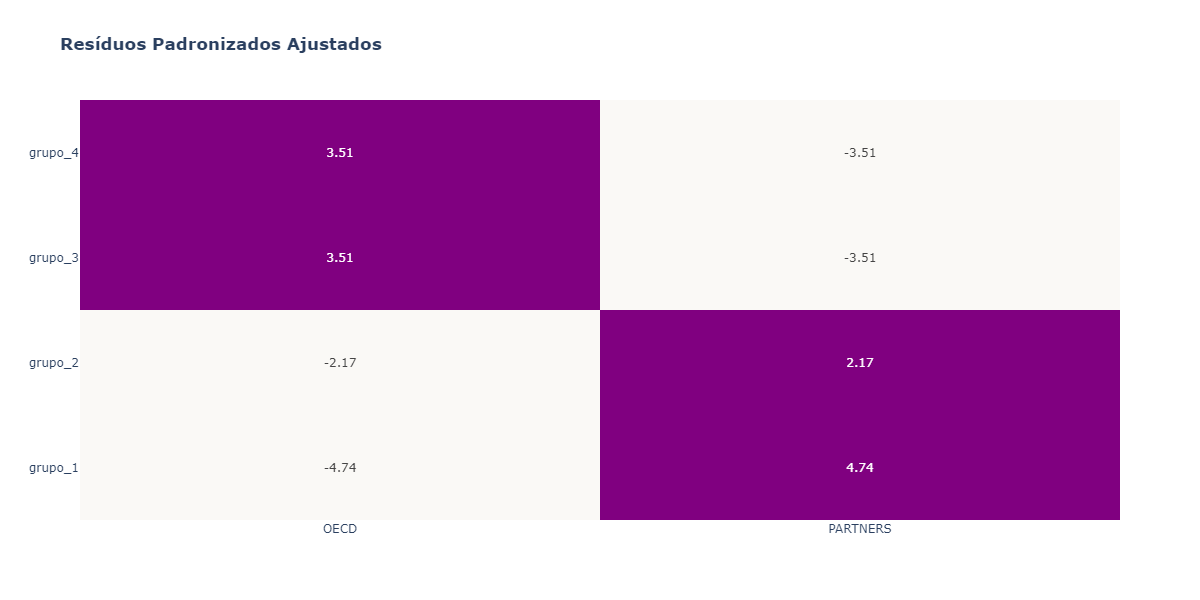

In [71]:
#%% Plotando o gráfico

fig = go.Figure()

maxz = np.max(tab_cont.standardized_resids)+0.1
minz = np.min(tab_cont.standardized_resids)-0.1

colorscale = ['purple' if i>1.96 else '#FAF9F6' for i in np.arange(minz,maxz,0.01)]

fig.add_trace(
    go.Heatmap(
        x = tab_cont.standardized_resids.columns,
        y = tab_cont.standardized_resids.index,
        z = np.array(tab_cont.standardized_resids),
        text=tab_cont.standardized_resids.values,
        texttemplate='%{text:.2f}',
        showscale=False,
        colorscale=colorscale))

fig.update_layout(
    title='<b>Resíduos Padronizados Ajustados</b>',
    height = 600,
    width = 600)

fig.show()

### 5.1.6 - Conclusão

Na Anacor são gerados 'm' autovalores: m = mín(I-1,J-1). Como a variável 'group' tem 2 categorias, não há mapa bidimensional. Assim, neste caso, encerramos a análise nos resíduos padronizados ajustados. Existindo outras variáveis, poderia ser realizada uma ACM

---